## Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU


from warnings import filterwarnings
filterwarnings("ignore")

## Importing the dataset

In [2]:
df = pd.read_csv("/kaggle/input/biomass-cleaned-dataset/biomass data.csv")

## Exploratory Data Analysis

In [3]:
df.describe()

sl no          MC          VM          FC         Ash           C  \
count  450.000000  450.000000  450.000000  450.000000  450.000000  450.000000   
mean   225.500000    8.527356   71.909667   15.288511    4.289467   49.434578   
std    130.048068    3.672753    7.987731    4.021544    5.753450    3.342011   
min      1.000000    4.560000   52.560000    3.120000    0.010000   43.300000   
25%    113.250000    6.110000   66.900000   12.570000    0.500000   46.920000   
50%    225.500000    8.000000   75.180000   15.610000    1.510000   50.200000   
75%    337.750000    9.800000   77.710000   16.940000    5.330000   50.820000   
max    450.000000   27.000000   86.740000   26.450000   19.520000   58.340000   

                H           O           N           S           oC  \
count  450.000000  450.000000  450.000000  450.000000   450.000000   
mean     6.090178   43.443067    0.699333    0.334000   802.198000   
std      1.229714    3.929314    0.935660    0.719897    87.353518   
min      0.080000   31.010000    0.010000    0.000000   599.000000   
25%      5.620000   41.340000    0.160000    0.030000   750.000000   
50%      6.210000   42.990000    0.530000    0.110000   800.000000   
75%      6.780000   46.420000    0.900000    0.400000   850.000000   
max      8.660000   51.830000    6.550000    4.200000  1108.000000   

               ER         S/B          CO         CO2          H2         CH4  \
count  450.000000  450.000000  414.000000  414.000000  414.000000  414.000000   
mean     0.175600    0.612667   30.953309   28.829203   32.212874    8.004638   
std      0.140539    0.747409    9.045725   10.765455   13.362743    3.340170   
min      0.000000    0.000000    7.370000    5.000000    6.360000    0.430000   
25%      0.000000    0.000000   23.865000   20.072500   22.610000    5.715000   
50%      0.210000    0.390000   31.475000   28.255000   30.065000    7.930000   
75%      0.280000    1.050000   38.052500   36.530000   40.875000   10.000000   
max      0.500000    4.700000   50.560000   59.040000   65.660000   22.000000   

       Gas (m3/kg)  Tar (g/m^3)  
count   268.000000   124.000000  
mean      1.569813    13.713065  
std       0.657992    18.370045  
min       0.260000     0.540000  
25%       1.100000     3.475000  
50%       1.520000     7.650000  
75%       2.100000    15.125000  
max       3.300000    91.430000

In [4]:
df.head()

sl no Biomass species    MC     VM     FC    Ash      C     H      O     N  \
0    1.0     Corn Stover  6.34  67.25  15.64  10.68  52.26  6.03  40.67  0.97   
1    2.0    Vermont Wood  4.56  81.51  13.55   0.38  54.51  6.21  39.15  0.11   
2    3.0     Wheat Straw  5.18  67.89  14.89  12.04  58.34  6.40  34.79  0.36   
3    4.0     Switchgrass  8.38  69.63  14.66   7.33  50.61  5.82  42.77  0.71   
4    5.0       Rice Husk  9.84  65.07  16.13   8.96  45.09  5.93  46.87  0.59   

      S     oC   ER  S/B     CO    CO2     H2    CH4  Gas (m3/kg)  Tar (g/m^3)  
0  0.07  650.0  0.0  1.0  27.26  26.16  29.69  16.89          NaN          NaN  
1  0.03  650.0  0.0  1.0  25.66  26.20  31.22  16.92          NaN          NaN  
2  0.11  650.0  0.0  1.0  30.15  24.12  27.85  17.87          NaN          NaN  
3  0.10  650.0  0.0  1.0  35.66  20.84  25.24  18.26          NaN          NaN  
4  1.52  850.0  0.0  0.3  37.28  15.11  37.78   9.82          0.4          NaN

In [5]:
df.columns

Index(['sl no', 'Biomass species', 'MC', 'VM', 'FC', 'Ash', 'C', 'H', 'O', 'N',
       'S', 'oC', 'ER', 'S/B', 'CO', 'CO2', 'H2', 'CH4', 'Gas (m3/kg)',
       'Tar (g/m^3)'],
      dtype='object')

In [6]:
df.drop(columns = ['sl no'], inplace = True)

In [7]:
df.columns

Index(['Biomass species', 'MC', 'VM', 'FC', 'Ash', 'C', 'H', 'O', 'N', 'S',
       'oC', 'ER', 'S/B', 'CO', 'CO2', 'H2', 'CH4', 'Gas (m3/kg)',
       'Tar (g/m^3)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Biomass species  450 non-null    object 
 1   MC               450 non-null    float64
 2   VM               450 non-null    float64
 3   FC               450 non-null    float64
 4   Ash              450 non-null    float64
 5   C                450 non-null    float64
 6   H                450 non-null    float64
 7   O                450 non-null    float64
 8   N                450 non-null    float64
 9   S                450 non-null    float64
 10  oC               450 non-null    float64
 11  ER               450 non-null    float64
 12  S/B              450 non-null    float64
 13  CO               414 non-null    float64
 14  CO2              414 non-null    float64
 15  H2               414 non-null    float64
 16  CH4              414 non-null    float64
 17  Gas (m3/kg)     

In [9]:
df['Biomass species'].value_counts()

Biomass species
Pine Sawdust                               70
Rice Husk                                  32
Wood Residue                               25
Sawdust                                    23
Pine wood                                  19
Empty Fruit Bunch                          19
Wood Pellets                               17
Rice husk                                  17
Rice Straw                                 15
Pine Chips                                 15
Artificial waste (including wood chips)    14
Groundnut Shell                            13
Sugarcane Bagasse                          13
Corn Straw                                 12
Ecualyptus Sawdust                         10
Peat                                        9
Palm Oil Wastes                             9
Legume Straw                                9
Wood Chips                                  9
Coconut Shell                               8
Rubber Woodchip                             7
Pine waste        

### Pair plot

In [10]:
# sns.pairplot(df, hue='Biomass species')
# plt.show()

In [11]:
categorical_col = ['Biomass species']
numerical_col = df.select_dtypes(include='float').columns.tolist()
target_col = numerical_col[12:18]
numerical_col = numerical_col[:12]

In [12]:
print(numerical_col)
print(target_col)
print(categorical_col)

['MC', 'VM', 'FC', 'Ash', 'C', 'H', 'O', 'N', 'S', 'oC', 'ER', 'S/B']
['CO', 'CO2', 'H2', 'CH4', 'Gas (m3/kg)', 'Tar (g/m^3)']
['Biomass species']


### Histplot

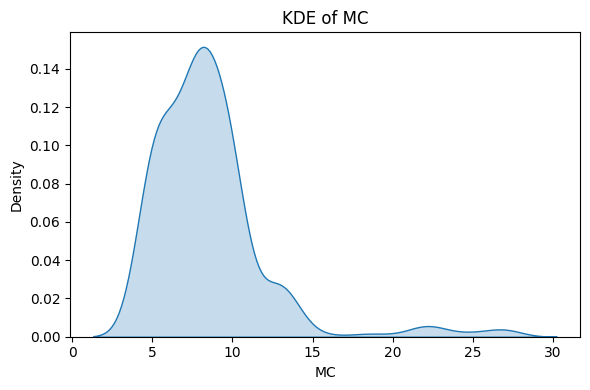

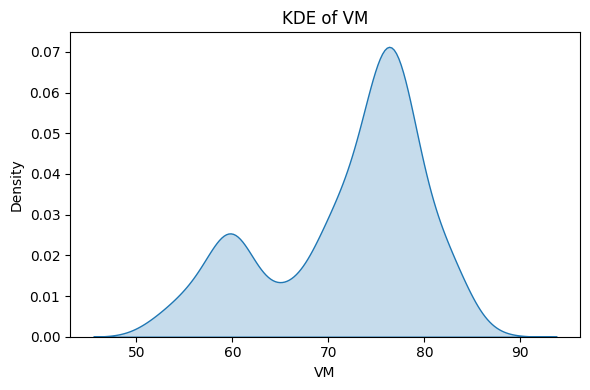

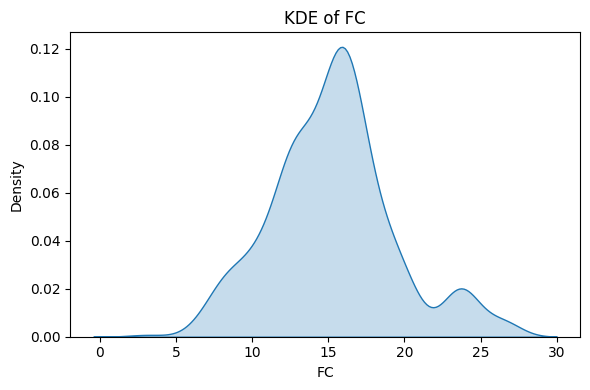

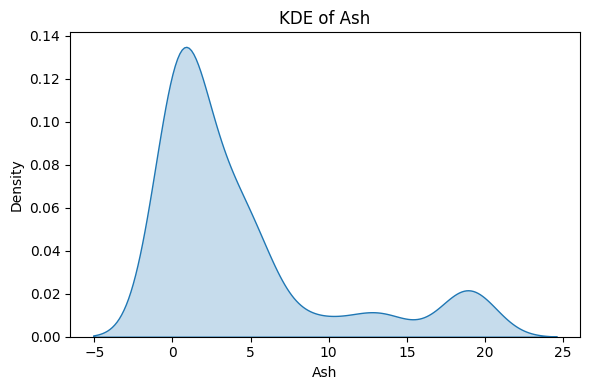

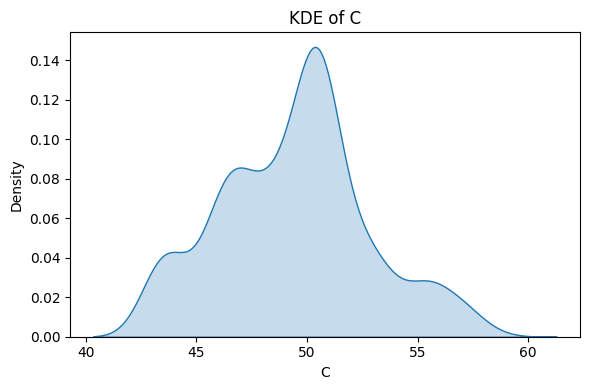

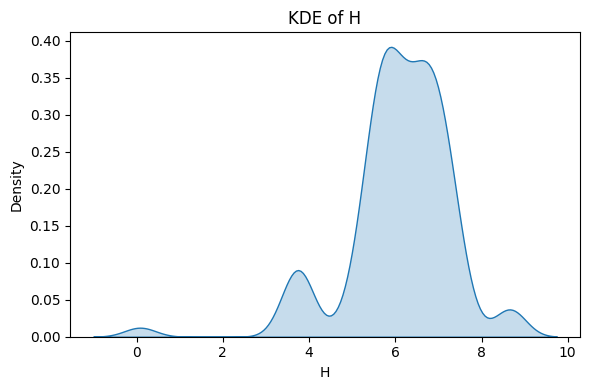

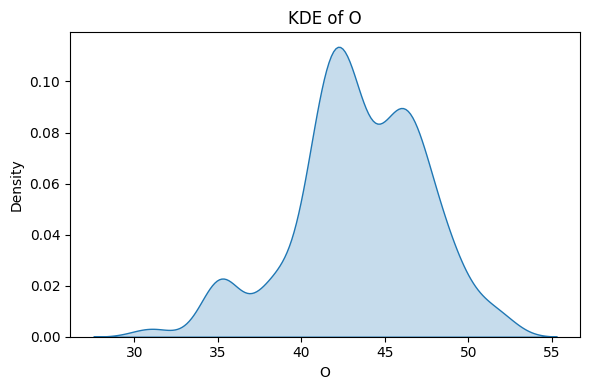

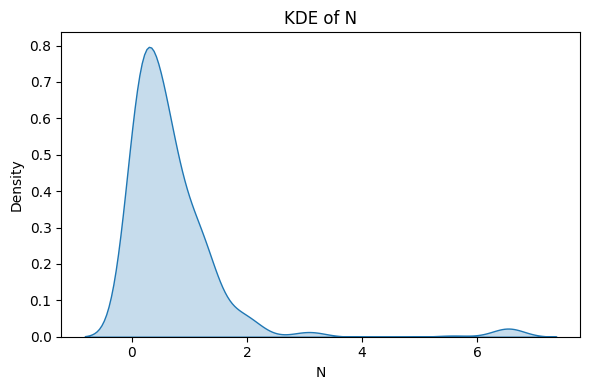

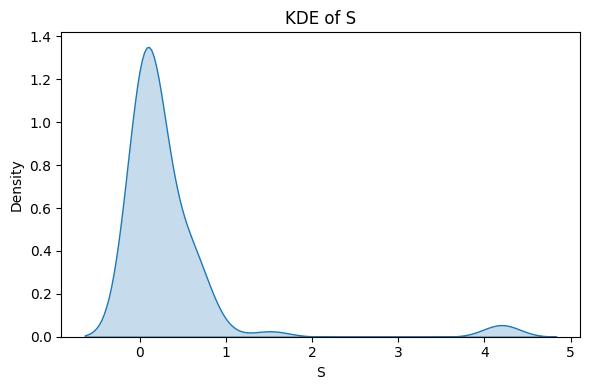

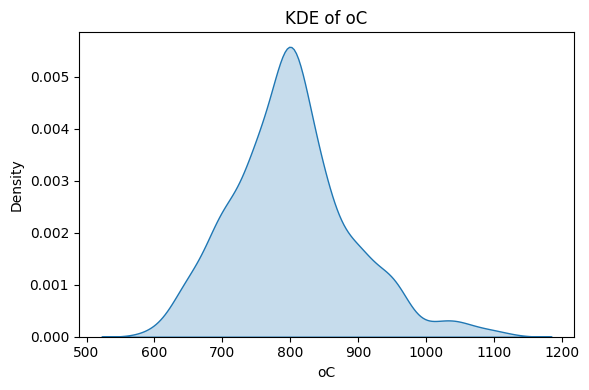

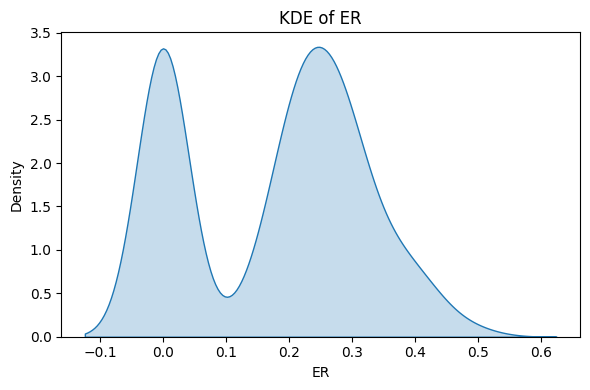

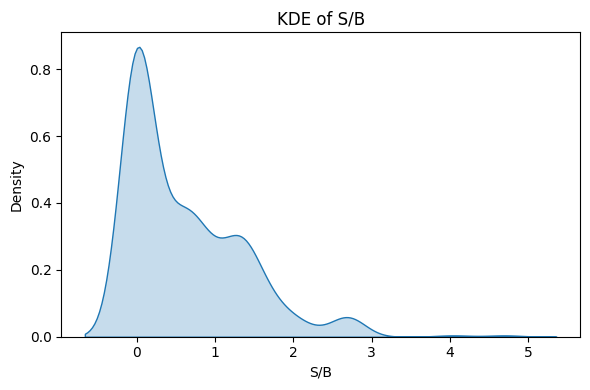

In [13]:
for col in numerical_col:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df[col], fill=True)
    plt.title(f'KDE of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

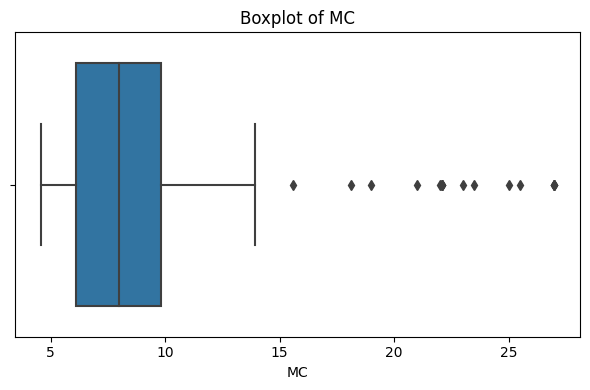

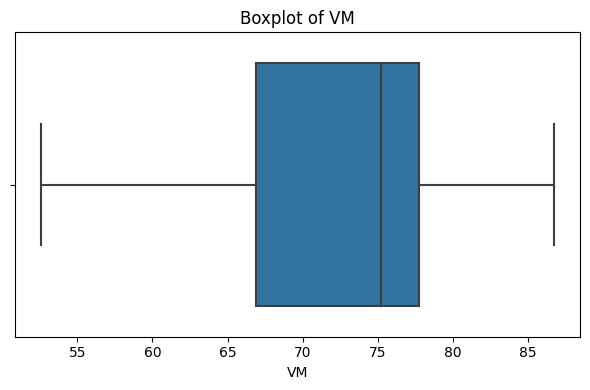

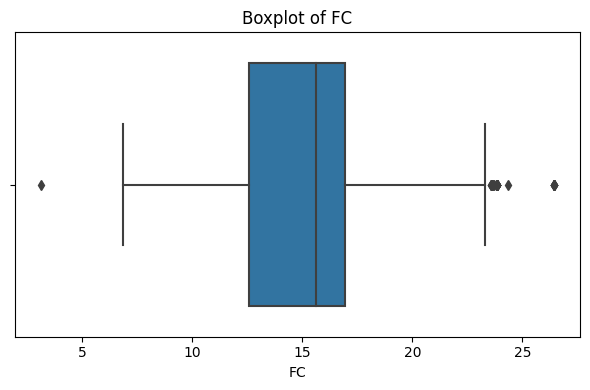

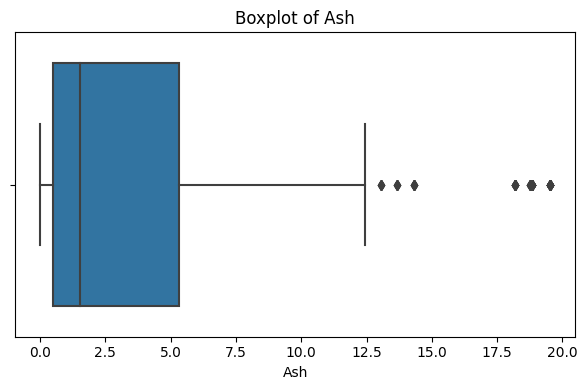

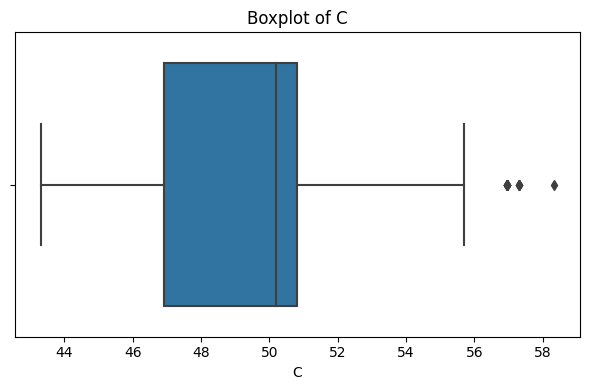

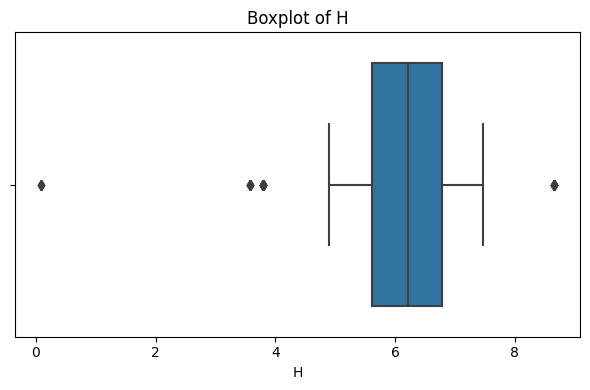

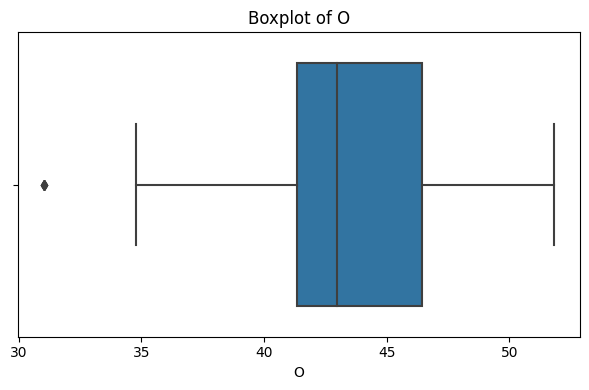

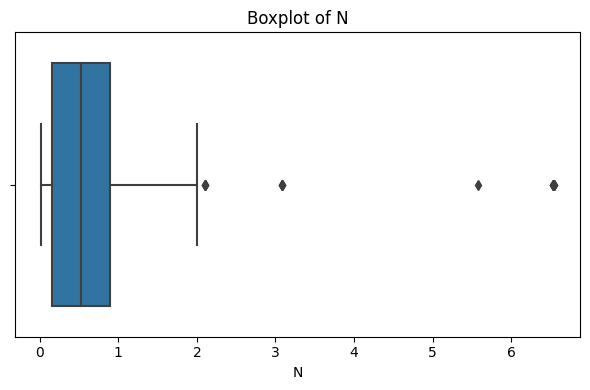

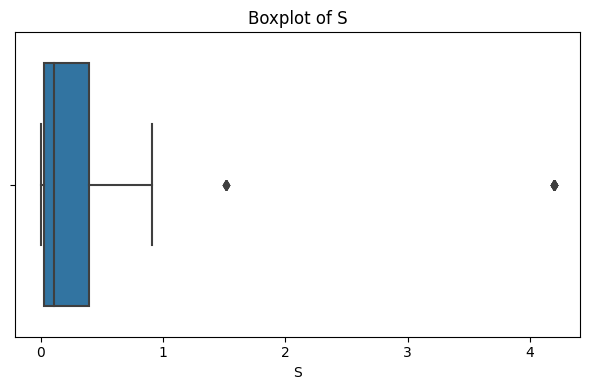

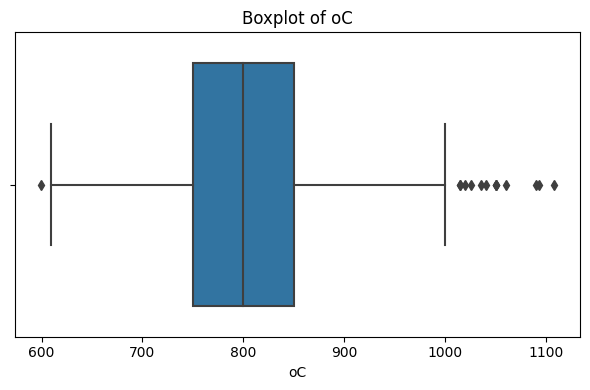

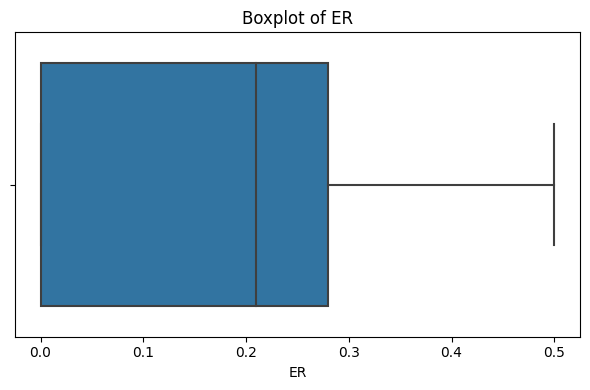

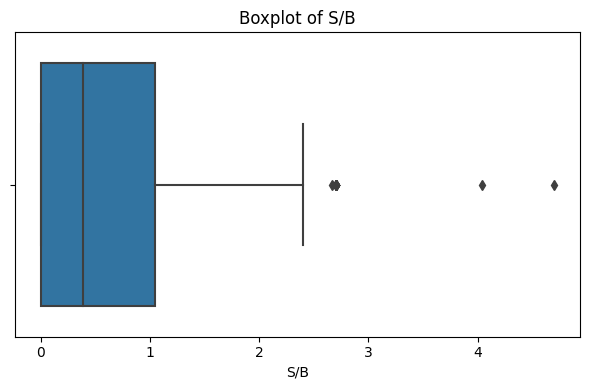

In [14]:
for col in numerical_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


There are a few outliers present in the dataset

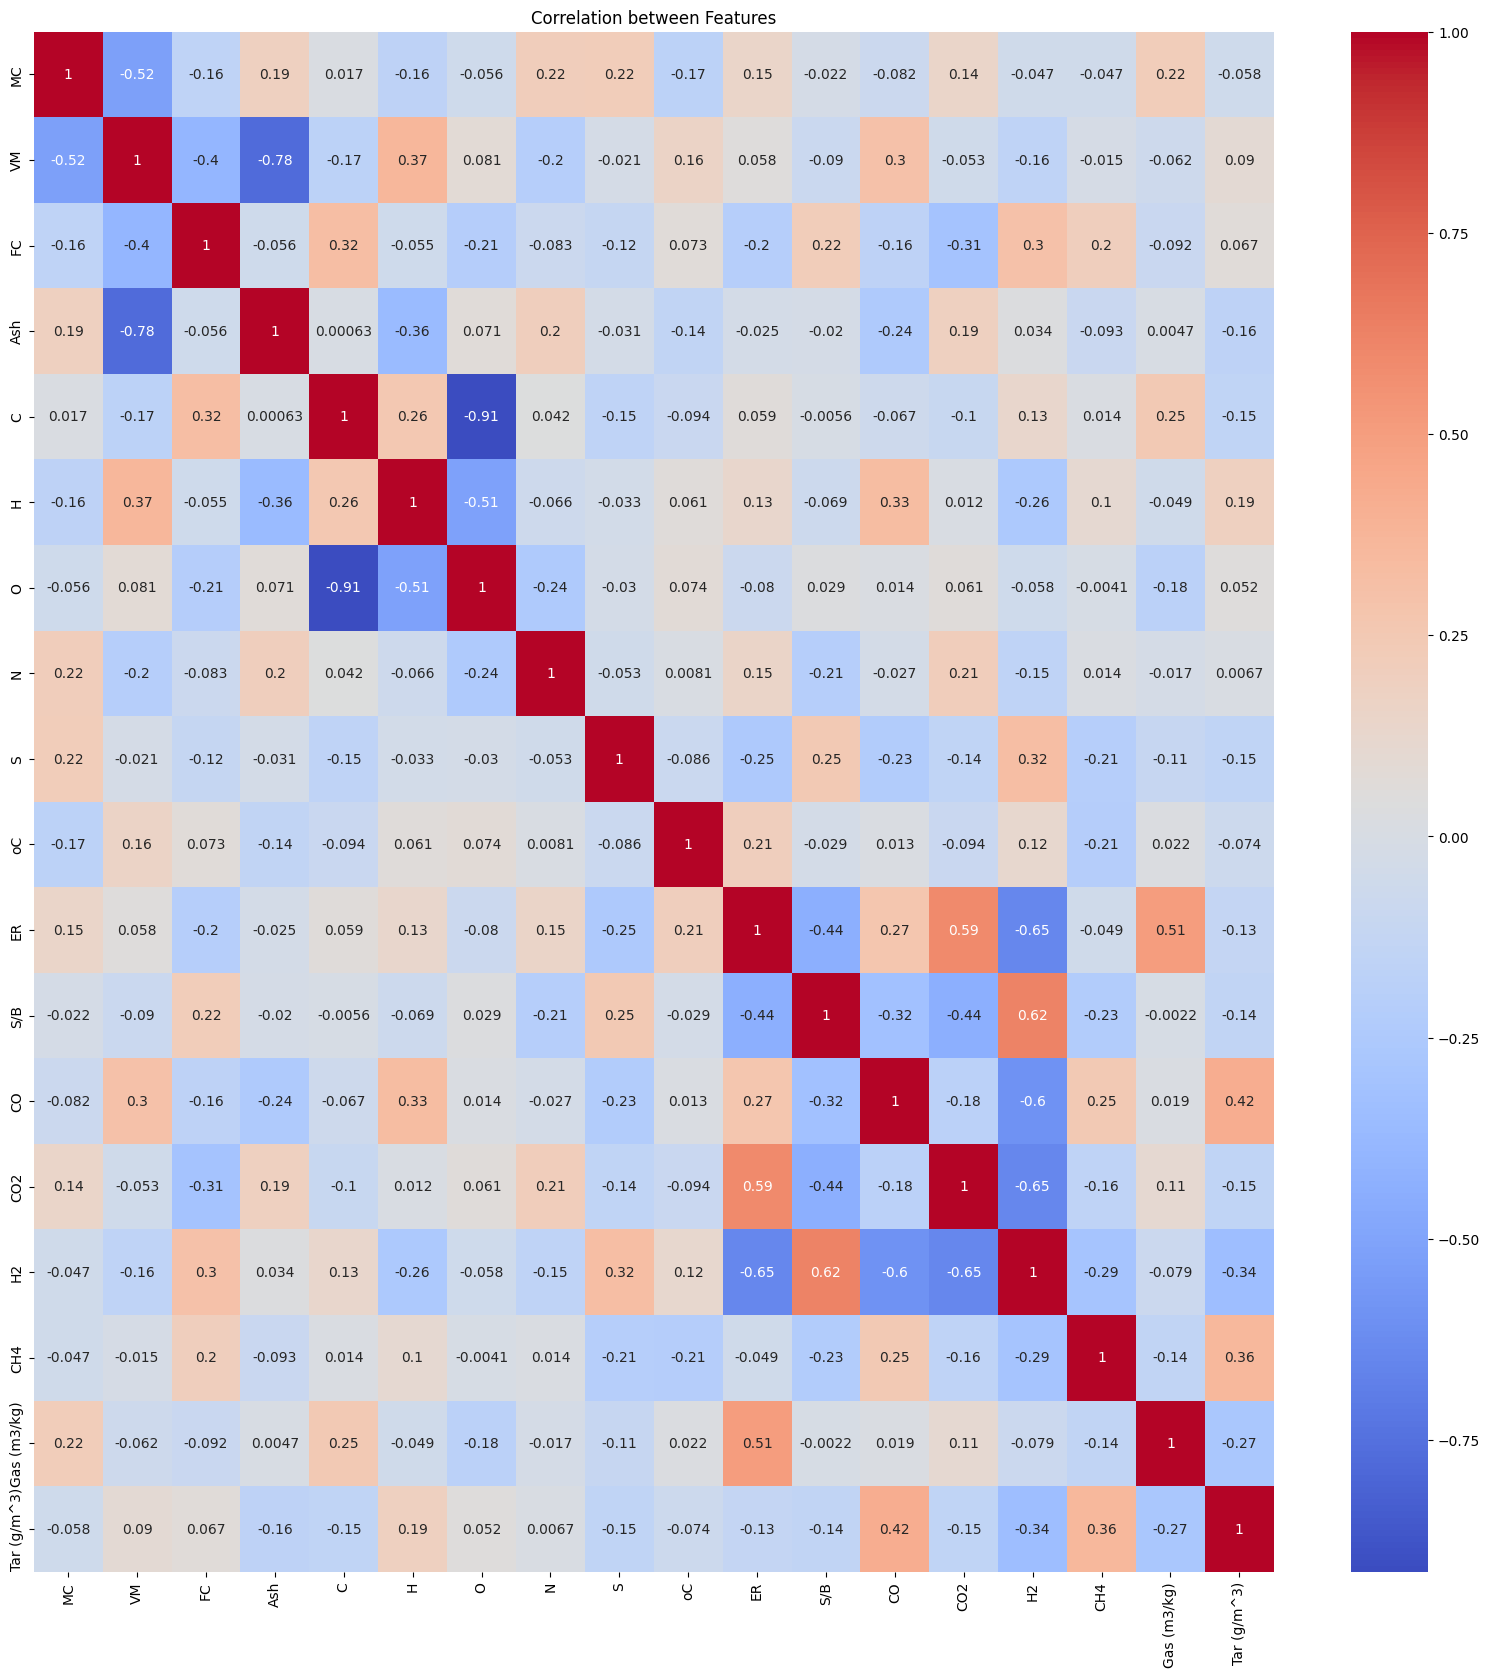

In [15]:
plt.figure(figsize= (20,20))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()

Ash and VM has 0.78 neg correlation and O and C have very high negative correlation

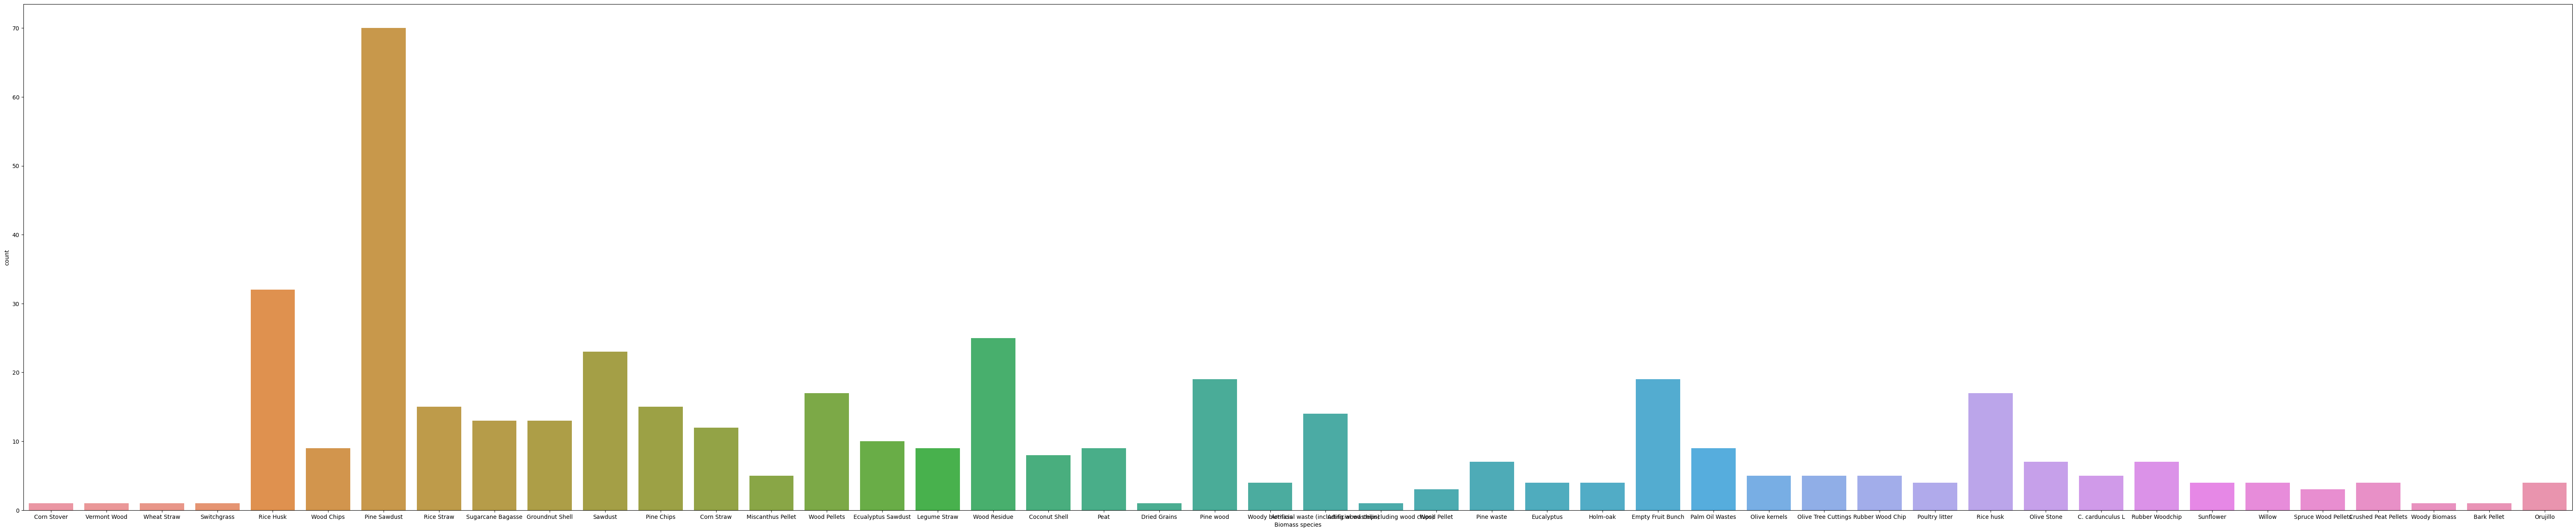

In [16]:
plt.figure(figsize=(80,16))
sns.countplot(x = 'Biomass species', data = df);

There is an uneven distribution in the count of categorical values

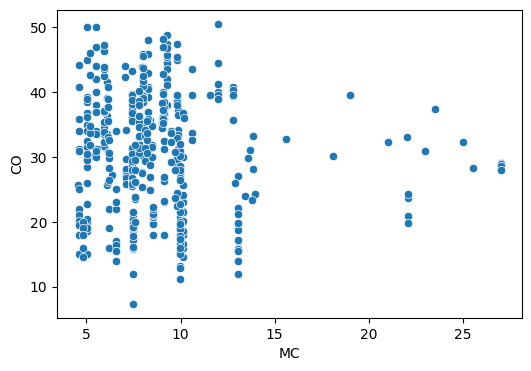

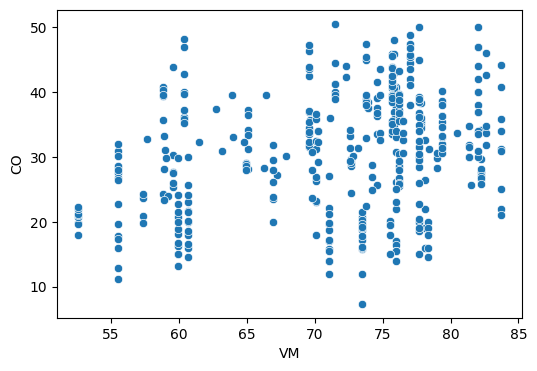

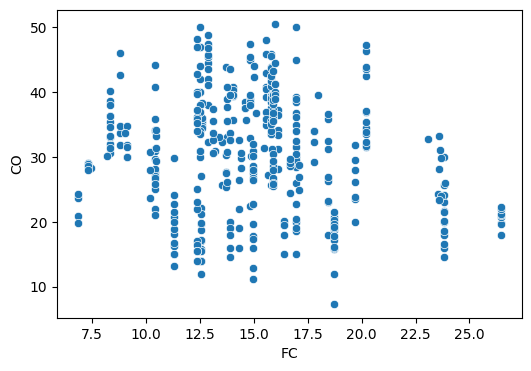

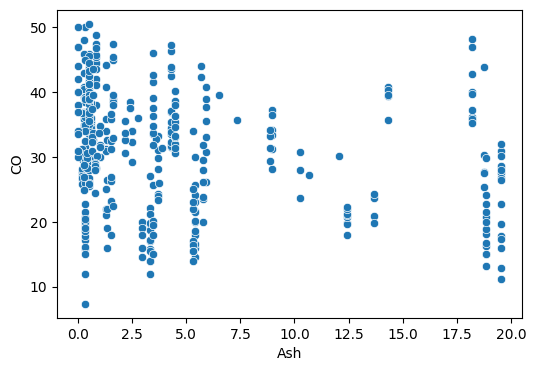

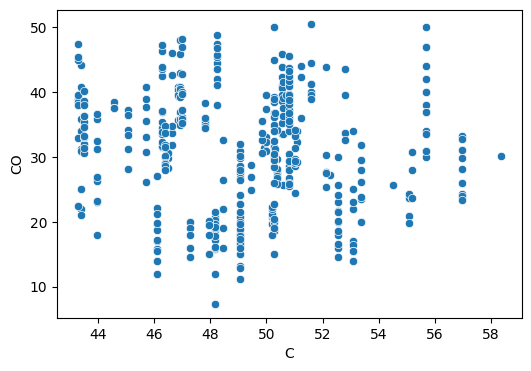

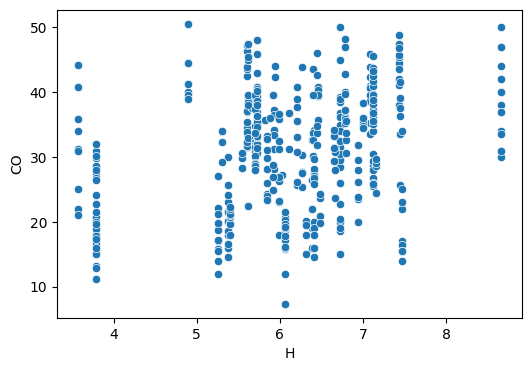

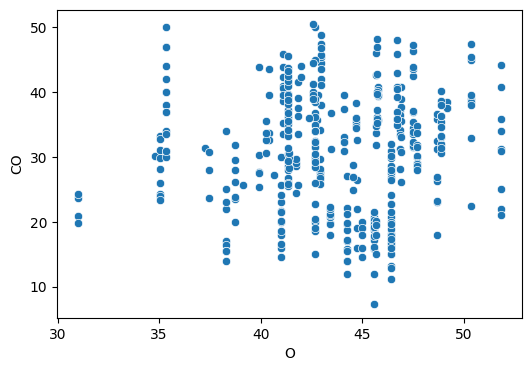

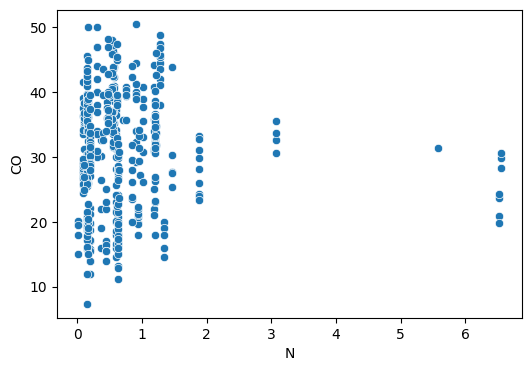

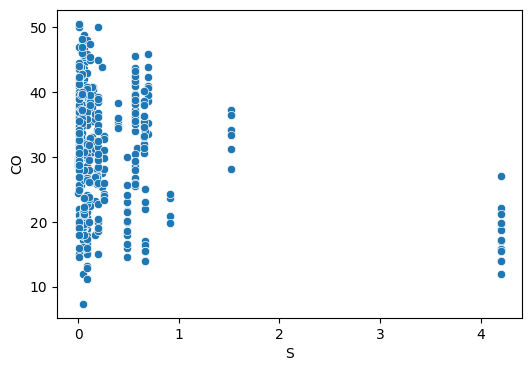

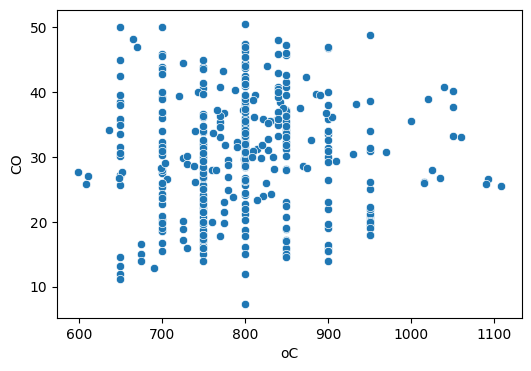

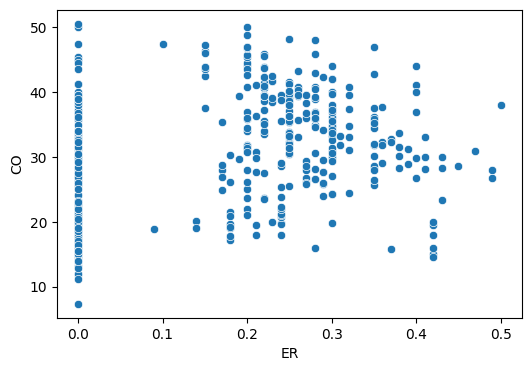

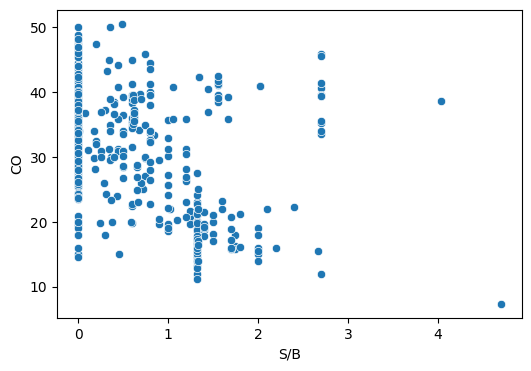

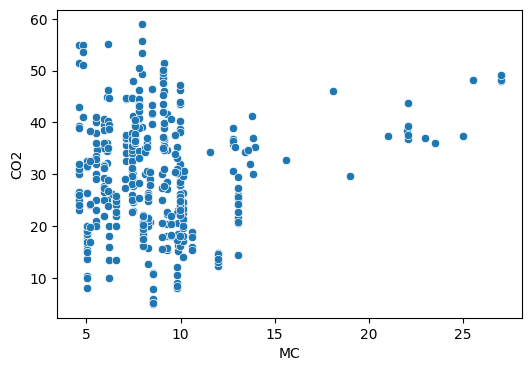

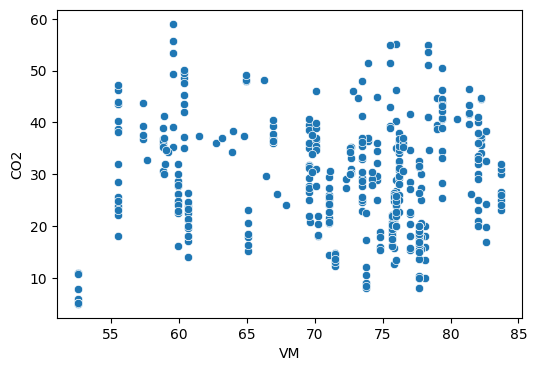

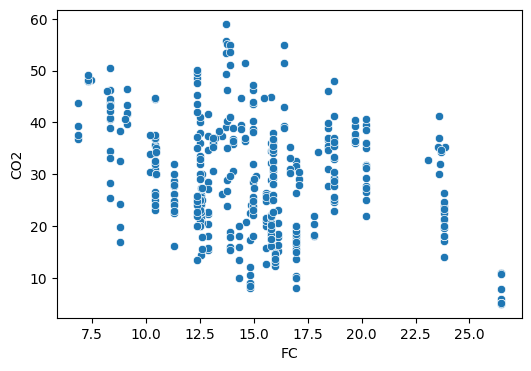

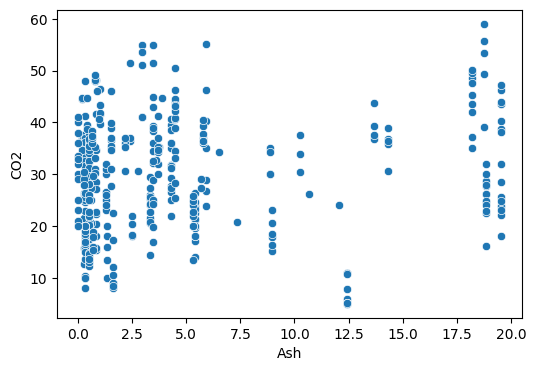

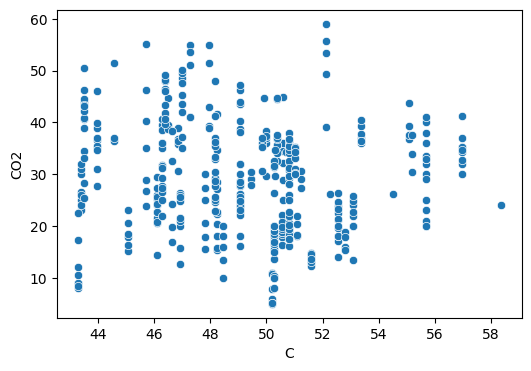

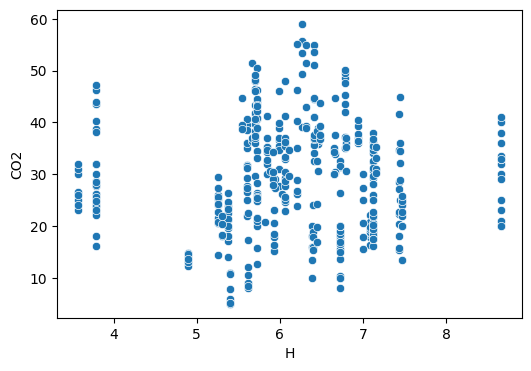

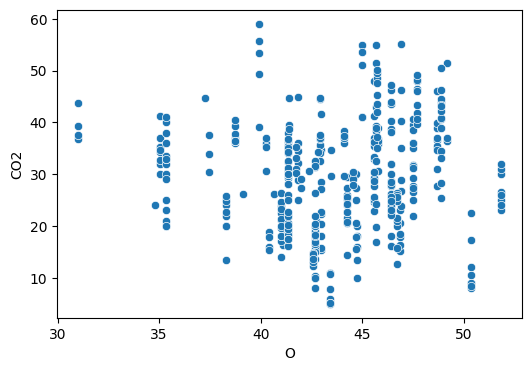

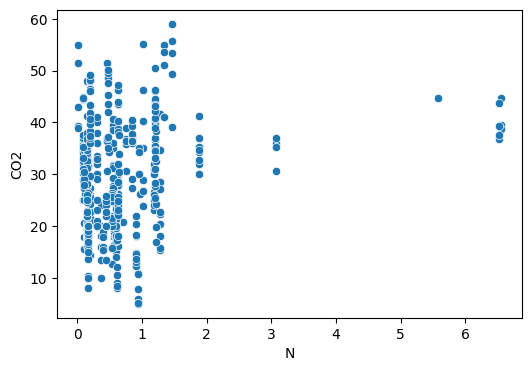

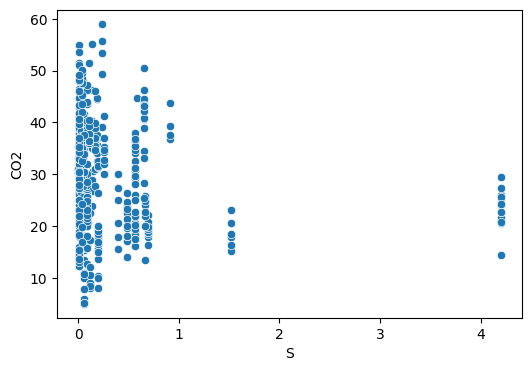

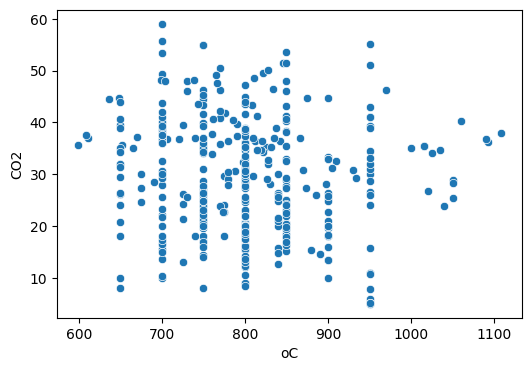

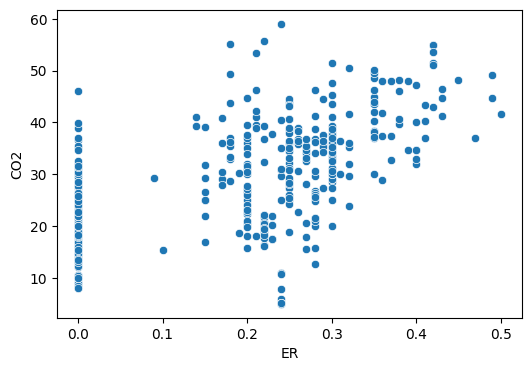

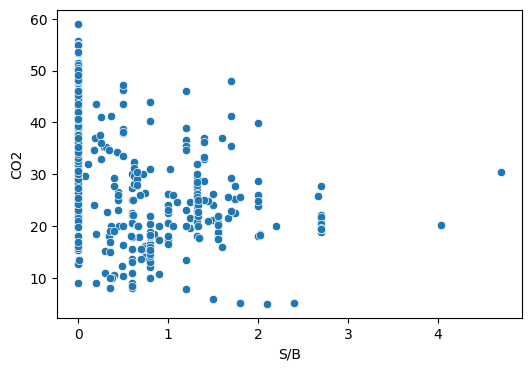

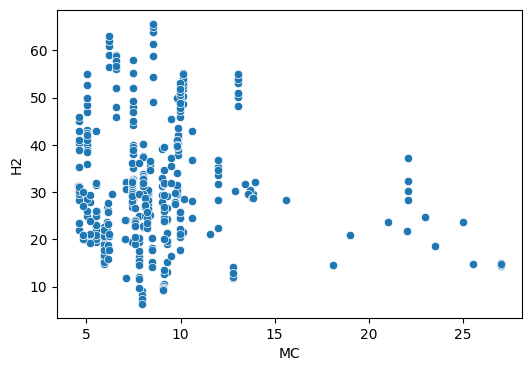

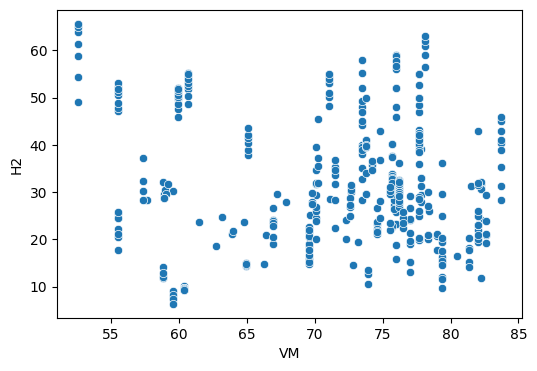

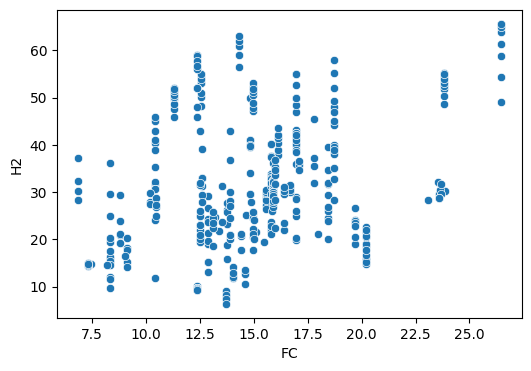

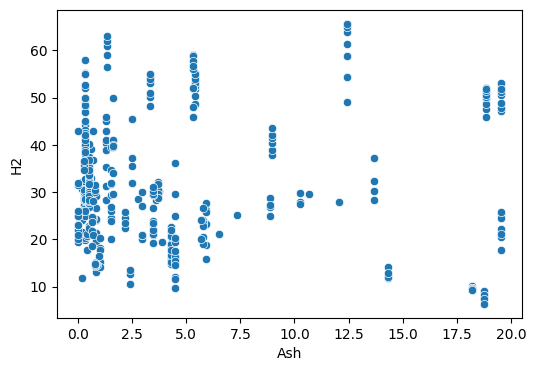

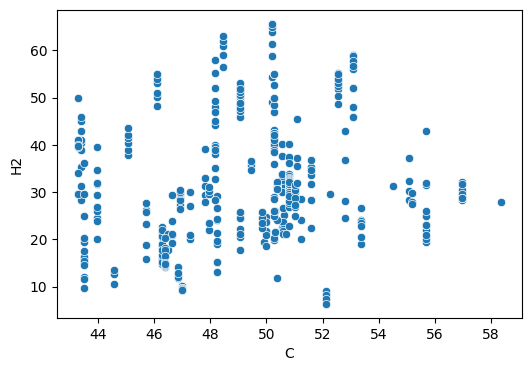

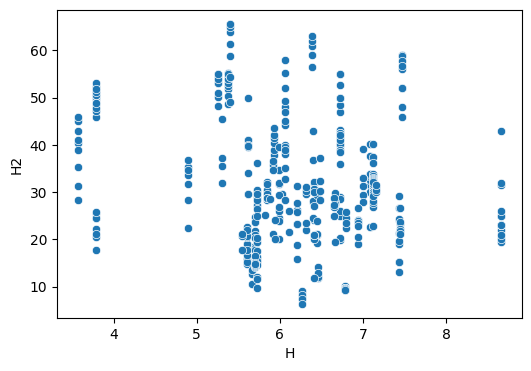

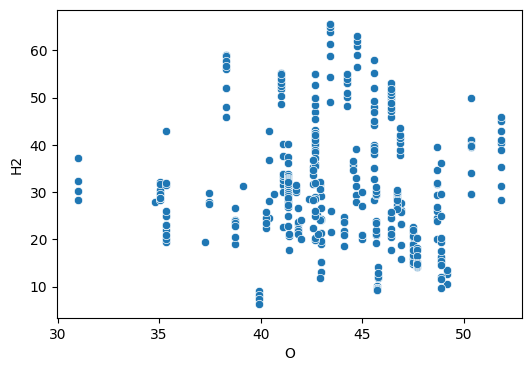

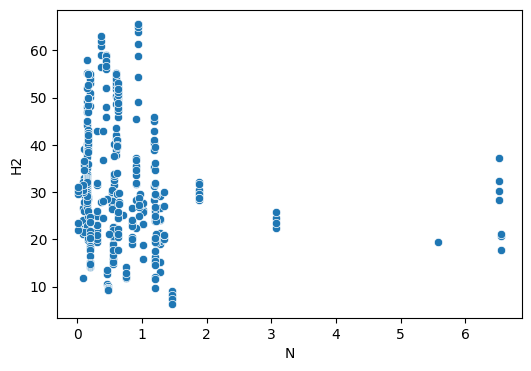

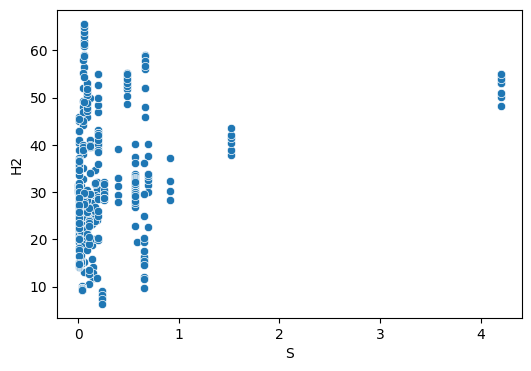

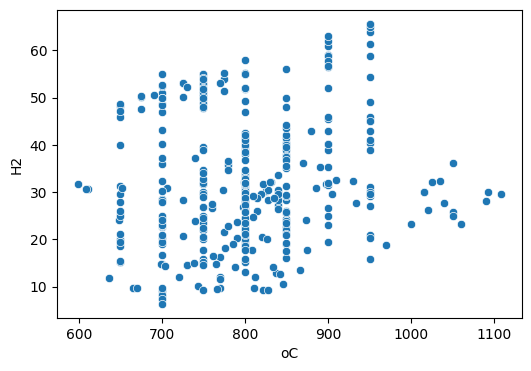

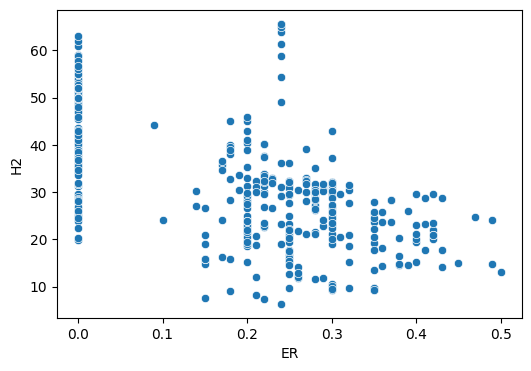

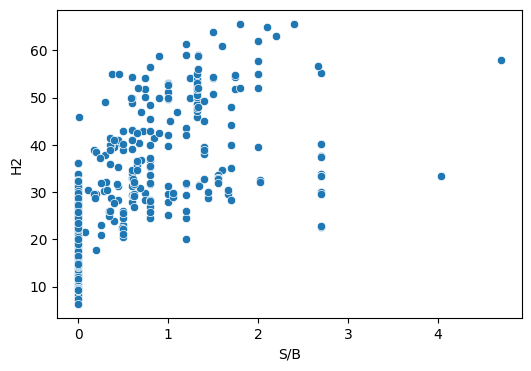

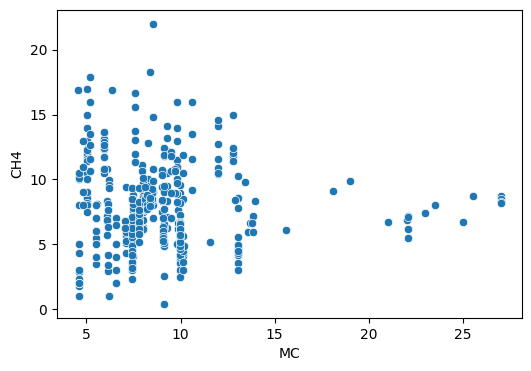

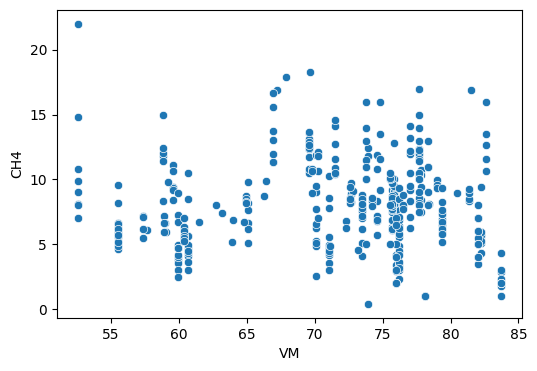

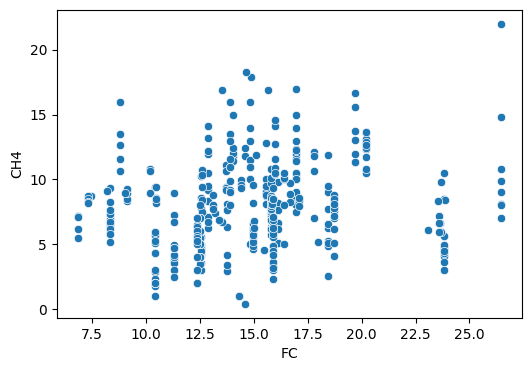

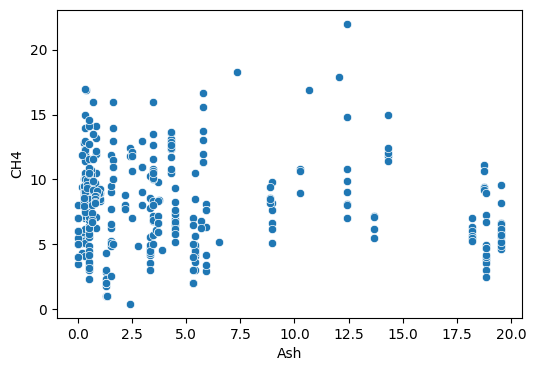

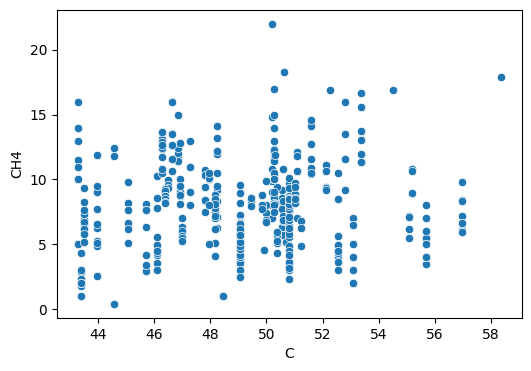

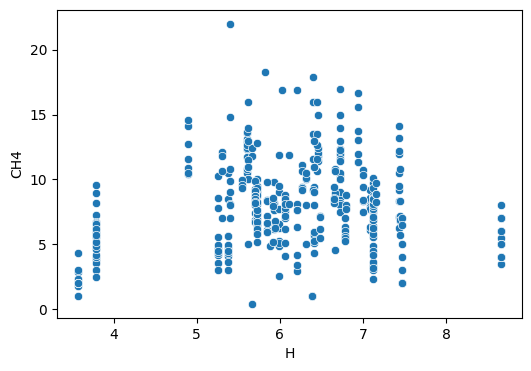

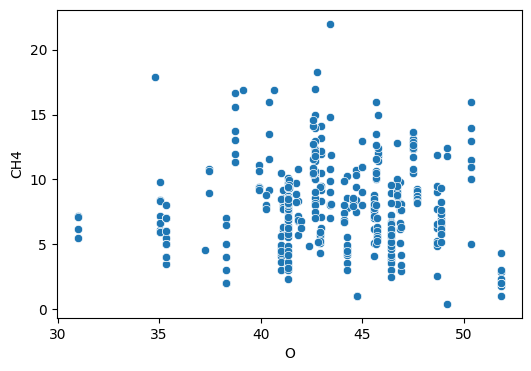

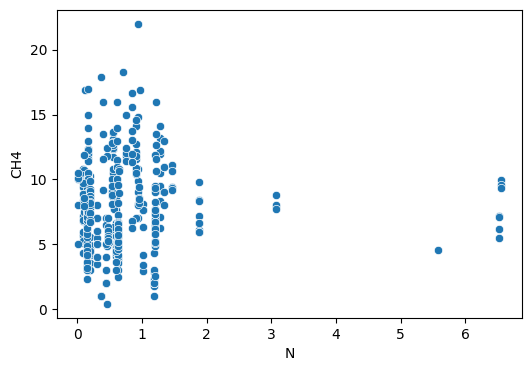

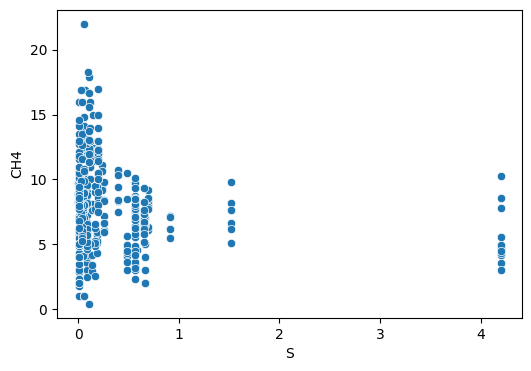

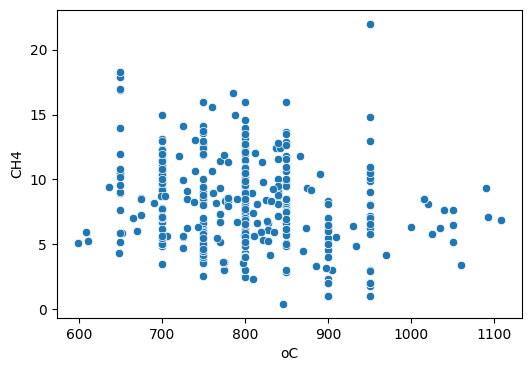

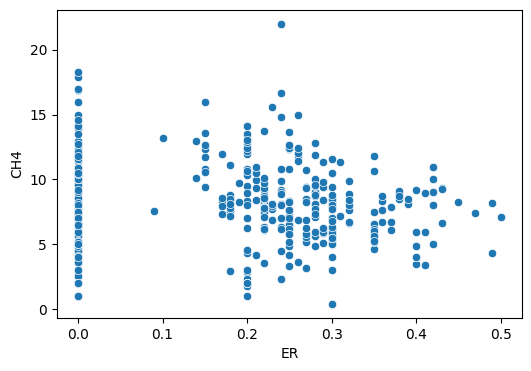

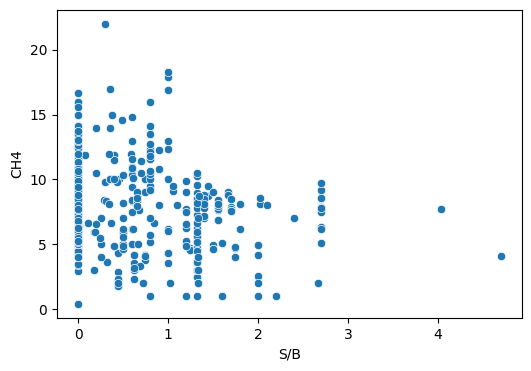

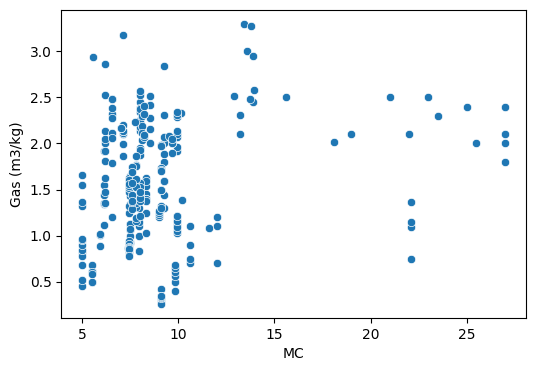

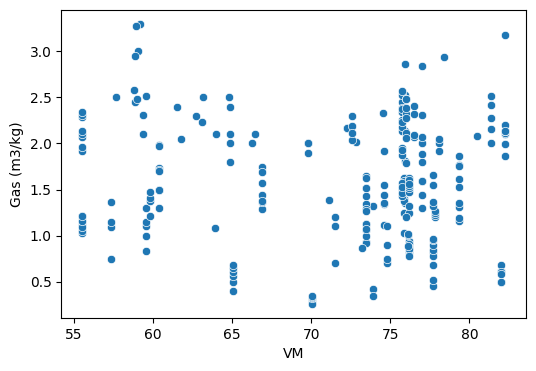

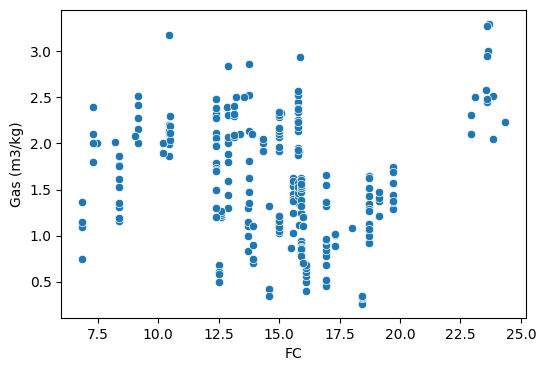

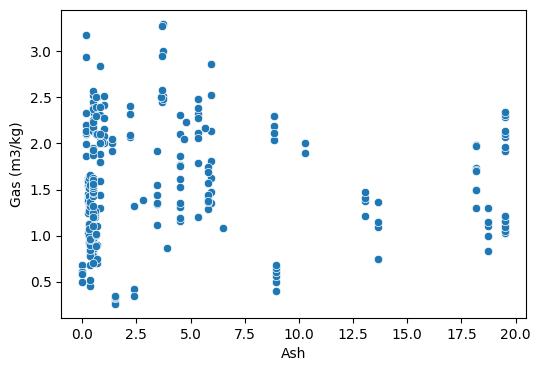

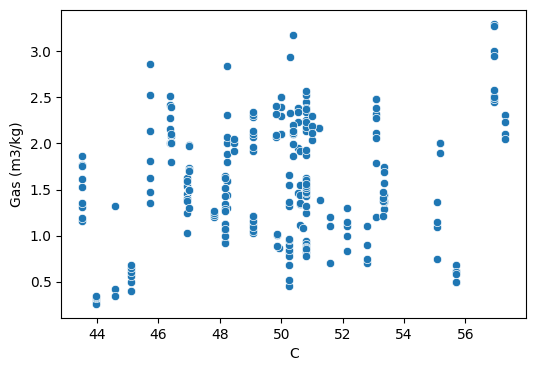

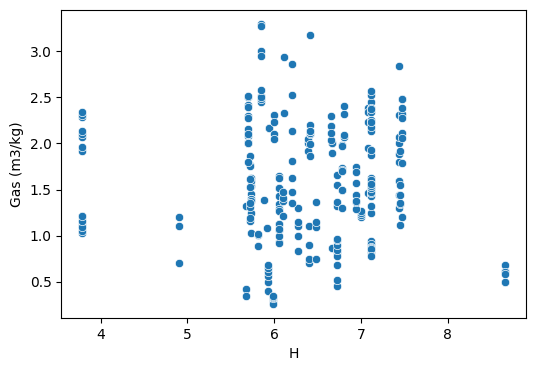

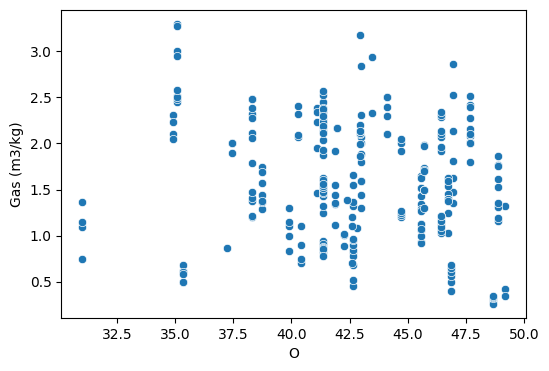

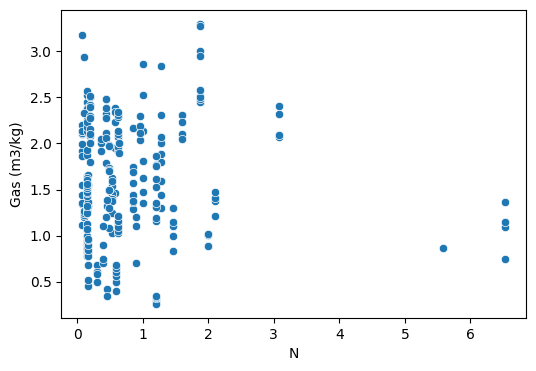

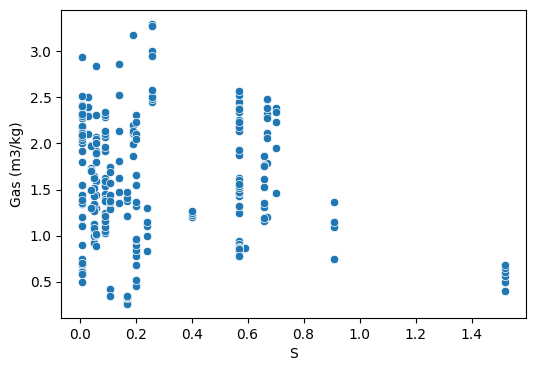

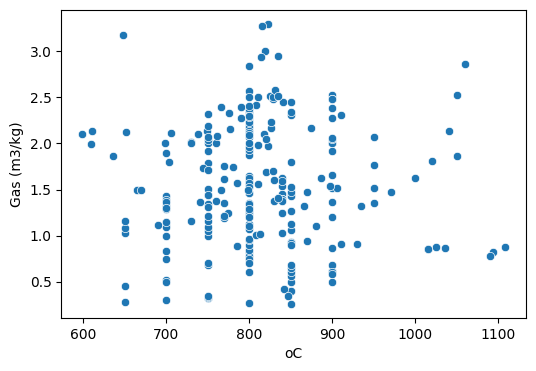

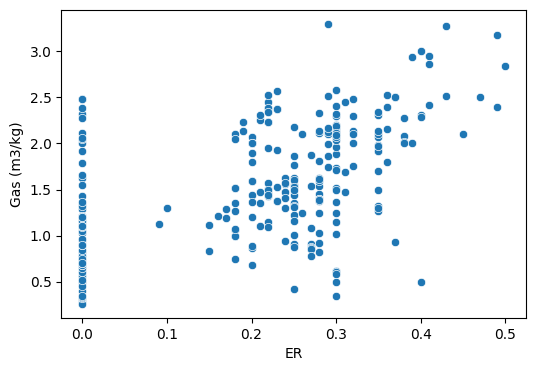

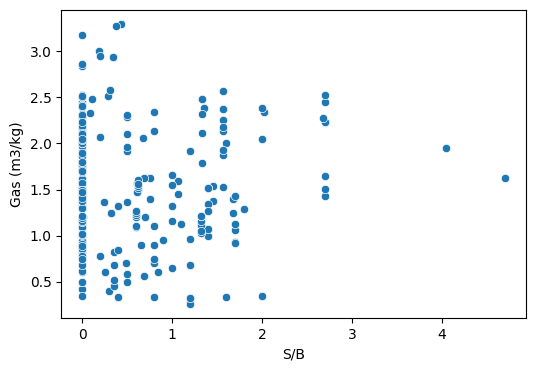

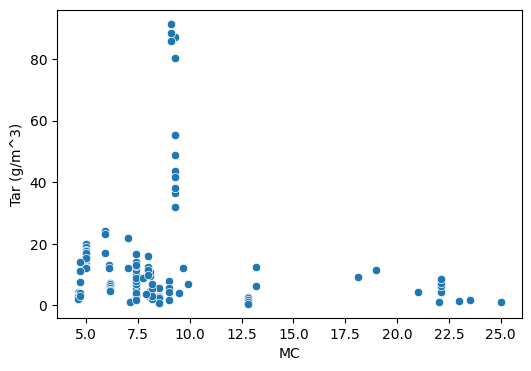

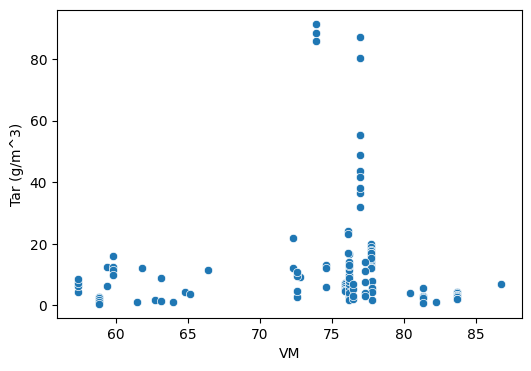

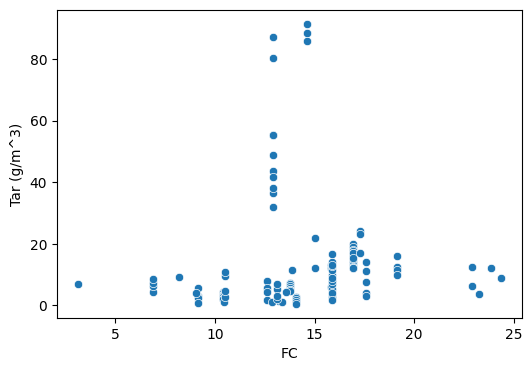

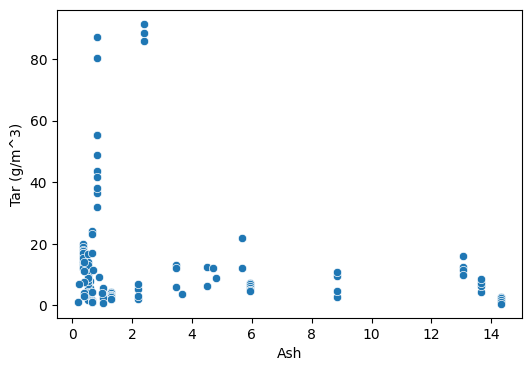

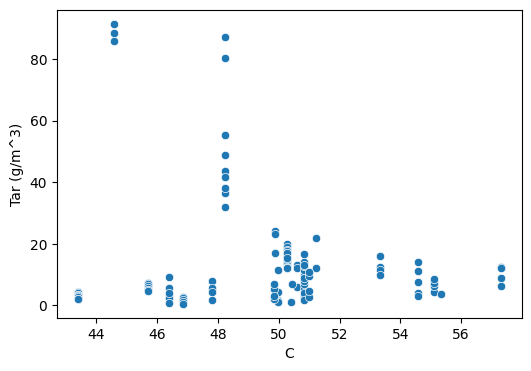

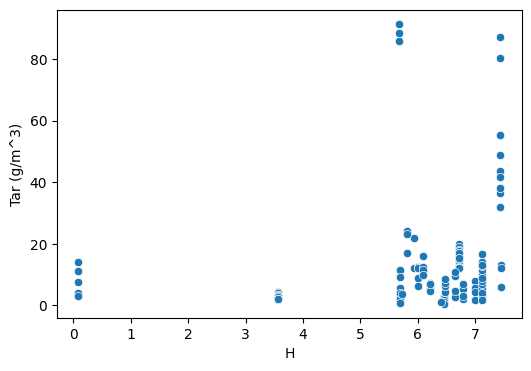

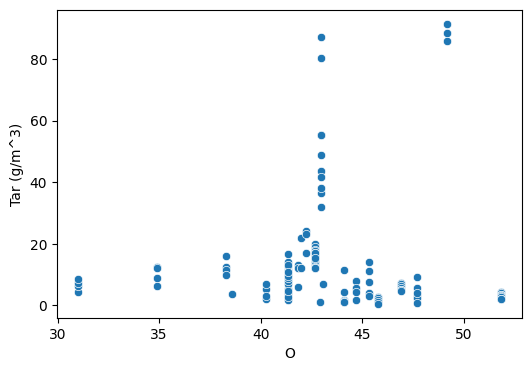

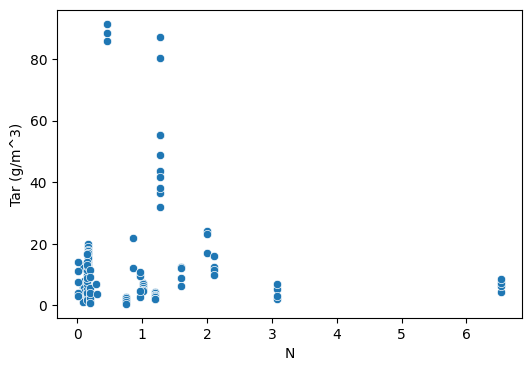

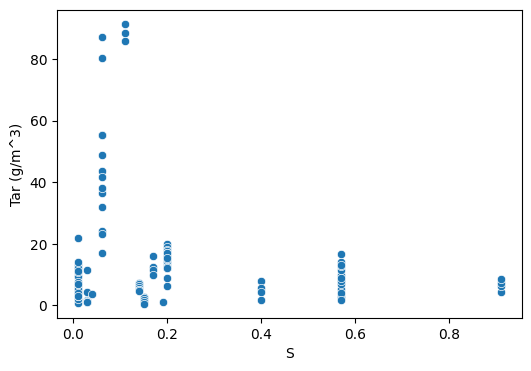

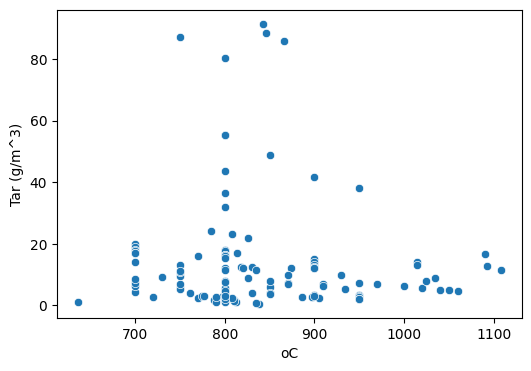

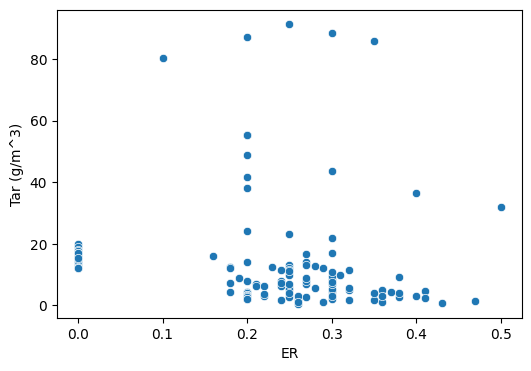

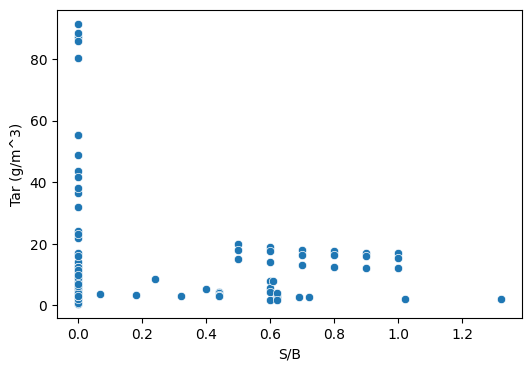

In [17]:
for tar_col in target_col:
    for num_col in numerical_col:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x = df[num_col], y = df[tar_col])
        plt.show()

## Preprocessing


In [18]:
df = df.iloc[:-3]
df.tail()

Biomass species    MC     VM     FC    Ash      C     H      O    N     S  \
445    Wood Pellets  5.92  76.13  17.29   0.66  49.87  5.81  42.26  2.0  0.06   
446        Orujillo  8.00  59.83  19.12  13.05  53.32  6.10  38.31  2.1  0.17   
447        Orujillo  8.00  59.83  19.12  13.05  53.32  6.10  38.31  2.1  0.17   
448        Orujillo  8.00  59.83  19.12  13.05  53.32  6.10  38.31  2.1  0.17   
449        Orujillo  8.00  59.83  19.12  13.05  53.32  6.10  38.31  2.1  0.17   

        oC    ER  S/B  CO  CO2  H2  CH4  Gas (m3/kg)  Tar (g/m^3)  
445  813.0  0.30  0.0 NaN  NaN NaN  NaN         1.02         16.9  
446  770.0  0.16  0.0 NaN  NaN NaN  NaN         1.21         16.1  
447  830.0  0.23  0.0 NaN  NaN NaN  NaN         1.37         12.3  
448  835.0  0.24  0.0 NaN  NaN NaN  NaN         1.41         11.6  
449  870.0  0.31  0.0 NaN  NaN NaN  NaN         1.47          9.9

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Biomass species'] = le.fit_transform(df['Biomass species'])

In [20]:
df['Biomass species'].unique().shape

(46,)

In [21]:
df.tail()

Biomass species    MC     VM     FC    Ash      C     H      O    N  \
445               42  5.92  76.13  17.29   0.66  49.87  5.81  42.26  2.0   
446               19  8.00  59.83  19.12  13.05  53.32  6.10  38.31  2.1   
447               19  8.00  59.83  19.12  13.05  53.32  6.10  38.31  2.1   
448               19  8.00  59.83  19.12  13.05  53.32  6.10  38.31  2.1   
449               19  8.00  59.83  19.12  13.05  53.32  6.10  38.31  2.1   

        S     oC    ER  S/B  CO  CO2  H2  CH4  Gas (m3/kg)  Tar (g/m^3)  
445  0.06  813.0  0.30  0.0 NaN  NaN NaN  NaN         1.02         16.9  
446  0.17  770.0  0.16  0.0 NaN  NaN NaN  NaN         1.21         16.1  
447  0.17  830.0  0.23  0.0 NaN  NaN NaN  NaN         1.37         12.3  
448  0.17  835.0  0.24  0.0 NaN  NaN NaN  NaN         1.41         11.6  
449  0.17  870.0  0.31  0.0 NaN  NaN NaN  NaN         1.47          9.9

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Biomass species  450 non-null    int64  
 1   MC               450 non-null    float64
 2   VM               450 non-null    float64
 3   FC               450 non-null    float64
 4   Ash              450 non-null    float64
 5   C                450 non-null    float64
 6   H                450 non-null    float64
 7   O                450 non-null    float64
 8   N                450 non-null    float64
 9   S                450 non-null    float64
 10  oC               450 non-null    float64
 11  ER               450 non-null    float64
 12  S/B              450 non-null    float64
 13  CO               414 non-null    float64
 14  CO2              414 non-null    float64
 15  H2               414 non-null    float64
 16  CH4              414 non-null    float64
 17  Gas (m3/kg)     

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
data = df[['Ash', 'VM']]

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Step 2: Perform PCA
# Since we have two features, we can set n_components to 2 (or less, if you want to reduce dimensions further)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Step 3: Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("Principal Components:")
print(pc_df)

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

Principal Components:
          PC1       PC2
0    1.199231 -0.373327
1   -1.331820 -0.369793
2    1.309845 -0.597378
3    0.576132 -0.172071
4    1.180803  0.031496
..        ...       ...
445 -0.820580  0.072546
446  2.148411 -0.007348
447  2.148411 -0.007348
448  2.148411 -0.007348
449  2.148411 -0.007348

[450 rows x 2 columns]

Explained Variance Ratio:
[0.88808869 0.11191131]


Between Ash and VM the PC1 has captured 88% variance as it is not more than 90 so I am not replacing them in the original dataframe

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
data = df[['O', 'C']]

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Step 2: Perform PCA
# Since we have two features, we can set n_components to 2 (or less, if you want to reduce dimensions further)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Step 3: Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("Principal Components:")
print(pc_df)

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

Principal Components:
          PC1       PC2
0    1.098059  0.098884
1    1.848486  0.301633
2    3.445228  0.327406
3    0.370232  0.127716
4   -1.537640 -0.302868
..        ...       ...
445  0.305368 -0.120908
446  1.747756 -0.101761
447  1.747756 -0.101761
448  1.747756 -0.101761
449  1.747756 -0.101761

[450 rows x 2 columns]

Explained Variance Ratio:
[0.95675092 0.04324908]


In [25]:
# Optionally, if you're sure, drop the original 'O' and 'C' columns
df_reduced = df.drop(['O', 'C'], axis=1)
df_reduced['PC1'] = principal_components[:, 0]

replaced the C and O column with PC1 and the variance captured by PC1 is more than 95%

In [26]:
df_reduced.head()

Biomass species    MC     VM     FC    Ash     H     N     S     oC   ER  \
0                5  6.34  67.25  15.64  10.68  6.03  0.97  0.07  650.0  0.0   
1               37  4.56  81.51  13.55   0.38  6.21  0.11  0.03  650.0  0.0   
2               38  5.18  67.89  14.89  12.04  6.40  0.36  0.11  650.0  0.0   
3               36  8.38  69.63  14.66   7.33  5.82  0.71  0.10  650.0  0.0   
4               27  9.84  65.07  16.13   8.96  5.93  0.59  1.52  850.0  0.0   

   S/B     CO    CO2     H2    CH4  Gas (m3/kg)  Tar (g/m^3)       PC1  
0  1.0  27.26  26.16  29.69  16.89          NaN          NaN  1.098059  
1  1.0  25.66  26.20  31.22  16.92          NaN          NaN  1.848486  
2  1.0  30.15  24.12  27.85  17.87          NaN          NaN  3.445228  
3  1.0  35.66  20.84  25.24  18.26          NaN          NaN  0.370232  
4  0.3  37.28  15.11  37.78   9.82          0.4          NaN -1.537640

In [27]:
df_reduced.describe()

Biomass species          MC          VM          FC         Ash  \
count       450.000000  450.000000  450.000000  450.000000  450.000000   
mean         23.642222    8.527356   71.909667   15.288511    4.289467   
std          11.366676    3.672753    7.987731    4.021544    5.753450   
min           0.000000    4.560000   52.560000    3.120000    0.010000   
25%          16.000000    6.110000   66.900000   12.570000    0.500000   
50%          23.000000    8.000000   75.180000   15.610000    1.510000   
75%          31.000000    9.800000   77.710000   16.940000    5.330000   
max          45.000000   27.000000   86.740000   26.450000   19.520000   

                H           N           S           oC          ER  \
count  450.000000  450.000000  450.000000   450.000000  450.000000   
mean     6.090178    0.699333    0.334000   802.198000    0.175600   
std      1.229714    0.935660    0.719897    87.353518    0.140539   
min      0.080000    0.010000    0.000000   599.000000    0.000000   
25%      5.620000    0.160000    0.030000   750.000000    0.000000   
50%      6.210000    0.530000    0.110000   800.000000    0.210000   
75%      6.780000    0.900000    0.400000   850.000000    0.280000   
max      8.660000    6.550000    4.200000  1108.000000    0.500000   

              S/B          CO         CO2          H2         CH4  \
count  450.000000  414.000000  414.000000  414.000000  414.000000   
mean     0.612667   30.953309   28.829203   32.212874    8.004638   
std      0.747409    9.045725   10.765455   13.362743    3.340170   
min      0.000000    7.370000    5.000000    6.360000    0.430000   
25%      0.000000   23.865000   20.072500   22.610000    5.715000   
50%      0.390000   31.475000   28.255000   30.065000    7.930000   
75%      1.050000   38.052500   36.530000   40.875000   10.000000   
max      4.700000   50.560000   59.040000   65.660000   22.000000   

       Gas (m3/kg)  Tar (g/m^3)           PC1  
count   268.000000   124.000000  4.500000e+02  
mean      1.569813    13.713065 -3.157968e-17  
std       0.657992    18.370045  1.384833e+00  
min       0.260000     0.540000 -2.789190e+00  
25%       1.100000     3.475000 -9.219701e-01  
50%       1.520000     7.650000  2.862740e-01  
75%       2.100000    15.125000  6.723379e-01  
max       3.300000    91.430000  3.445228e+00

### Train test split

In [28]:
df['Biomass species'].value_counts().sort_index()

Biomass species
0     14
1      1
2      1
3      5
4      8
5      1
6     12
7      4
8      1
9     10
10    19
11     4
12    13
13     4
14     9
15     5
16     7
17     5
18     5
19     4
20     9
21     9
22    15
23    70
24     7
25    19
26     4
27    32
28    15
29    17
30     5
31     7
32    23
33     3
34    13
35     4
36     1
37     1
38     1
39     4
40     9
41     3
42    17
43    25
44     1
45     4
Name: count, dtype: int64

In [29]:
null_counts = df.groupby('Biomass species')[['CO', 'CO2', 'H2', 'CH4']].apply(lambda x: x.isnull().sum())
print(null_counts)

                 CO  CO2  H2  CH4
Biomass species                  
0                 0    0   0    0
1                 0    0   0    0
2                 1    1   1    1
3                 0    0   0    0
4                 0    0   0    0
5                 0    0   0    0
6                 0    0   0    0
7                 4    4   4    4
8                 0    0   0    0
9                 0    0   0    0
10                0    0   0    0
11                0    0   0    0
12                0    0   0    0
13                0    0   0    0
14                0    0   0    0
15                0    0   0    0
16                0    0   0    0
17                0    0   0    0
18                0    0   0    0
19                4    4   4    4
20                0    0   0    0
21                0    0   0    0
22                0    0   0    0
23                0    0   0    0
24                0    0   0    0
25                0    0   0    0
26                0    0   0    0
27            

In [30]:
strings_to_remove = ['Gas (m3/kg)', 'Tar (g/m^3)']
target_col = [item for item in target_col if item not in strings_to_remove]

In [31]:
df.drop(['Gas (m3/kg)', 'Tar (g/m^3)'], axis =1, inplace = True)

In [32]:
x_test = df[df['CO'].isna()]

# Remove those rows from the original DataFrame
df_up = df[~df['CO'].isna()]

In [33]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 192 to 449
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Biomass species  36 non-null     int64  
 1   MC               36 non-null     float64
 2   VM               36 non-null     float64
 3   FC               36 non-null     float64
 4   Ash              36 non-null     float64
 5   C                36 non-null     float64
 6   H                36 non-null     float64
 7   O                36 non-null     float64
 8   N                36 non-null     float64
 9   S                36 non-null     float64
 10  oC               36 non-null     float64
 11  ER               36 non-null     float64
 12  S/B              36 non-null     float64
 13  CO               0 non-null      float64
 14  CO2              0 non-null      float64
 15  H2               0 non-null      float64
 16  CH4              0 non-null      float64
dtypes: float64(16), int6

In [34]:
df_up.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 431
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Biomass species  414 non-null    int64  
 1   MC               414 non-null    float64
 2   VM               414 non-null    float64
 3   FC               414 non-null    float64
 4   Ash              414 non-null    float64
 5   C                414 non-null    float64
 6   H                414 non-null    float64
 7   O                414 non-null    float64
 8   N                414 non-null    float64
 9   S                414 non-null    float64
 10  oC               414 non-null    float64
 11  ER               414 non-null    float64
 12  S/B              414 non-null    float64
 13  CO               414 non-null    float64
 14  CO2              414 non-null    float64
 15  H2               414 non-null    float64
 16  CH4              414 non-null    float64
dtypes: float64(16), int64

In [35]:
category_counts = df_up['Biomass species'].value_counts()

# Separate rare (count == 1) and common (count >= 2) categories
rare_categories = category_counts[category_counts <= 2].index
common_categories = category_counts[category_counts > 2].index

# 1. Put rare category rows directly into x_train and y_train
df_rare = df_up[df_up['Biomass species'].isin(rare_categories)]
x_train_rare = df_rare.drop(columns=target_col)
y_train_rare = df_rare[target_col]

# 2. Use stratified split on the rest (common categories)
df_common = df_up[df_up['Biomass species'].isin(common_categories)]

X_common = df_common.drop(columns=target_col)
y_common = df_common[target_col]

x_train_common, x_val, y_train_common, y_val = train_test_split(
    X_common, y_common, test_size=0.3, stratify=df_common['Biomass species'], random_state=42
)

# 3. Combine both parts into final x_train and y_train
x_train = pd.concat([x_train_common, x_train_rare]).reset_index(drop=True)
y_train = pd.concat([y_train_common, y_train_rare]).reset_index(drop=True)

In [36]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(291, 13) (291, 4) (123, 13) (123, 4)


In [37]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(x_train)
X_val_scaled = sc.transform(x_val)

## Models

### Linear Regression

In [38]:
y_val

CO    CO2     H2    CH4
373  32.08  43.56  17.80   6.56
166  16.16  25.51  52.13   6.20
277  29.40  32.45  32.58   5.57
61   16.24  27.77  51.93   4.06
230  19.80  10.89  54.46  14.85
..     ...    ...    ...    ...
351  16.00  55.00  20.00   9.00
219  39.57  20.56  32.97   6.90
84   23.12  18.05  55.17   3.65
428  33.70  35.20  23.40   7.70
22   39.57  18.76  33.76   7.91

[123 rows x 4 columns]

In [39]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_val_scaled)
r2 = r2_score(y_val, y_pred_lr)
print(r2)

0.4642857004670947


### SVR

In [40]:
from sklearn.multioutput import MultiOutputRegressor as MOR

In [41]:
svr = MOR(SVR(kernel='rbf', C = 100, gamma=0.1, epsilon =0.1))
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_val_scaled)
r2 = r2_score(y_val, y_pred_svr)
r2

0.8597656722127263

## Random Forest

In [42]:
rf = MOR(RandomForestRegressor(n_estimators = 100, random_state = 0))
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_val_scaled)
r2 = r2_score(y_val, y_pred_rf)
r2

0.8593649636831314

### XG Boost

In [43]:
xgbr = MOR(XGBRegressor())
xgbr.fit(X_train_scaled, y_train)
y_pred_xgbr = xgbr.predict(X_val_scaled)
r2 = r2_score(y_val, y_pred_xgbr)
r2

0.8437070181957863

### CatBoost

In [44]:
catr = MOR(CatBoostRegressor(verbose = 0, iterations = 100))
catr.fit(X_train_scaled, y_train)
y_pred_catr = catr.predict(X_val_scaled)
r2 = r2_score(y_val, y_pred_catr)
r2

0.8757567617515191

## Prediction for CO

In [45]:
ANN_model = Sequential([
    Dense(32, input_dim=13),                  # No activation here
    LeakyReLU(alpha=0.1),                    # LeakyReLU activation
    Dense(32, activation='tanh'),            # Tanh for richer non-linearity
    Dense(16, activation='relu'),            # ReLU for simplicity
    Dense(1, activation='linear')            # Linear for regression output
])

# Compile the model
ANN_model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


# Train the model
ANN_model.fit(X_train_scaled, y_train.CO, epochs=500, verbose=1)

# Evaluate the model
loss, mae = ANN_model.evaluate(X_train_scaled, y_train.CO, verbose=0)
print(f"\nModel evaluation:\nLoss (MSE): {loss:.2f}, MAE: {mae:.2f}")

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 1049.5668 - mae: 31.1556
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 990.8082 - mae: 30.2402  
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 997.6783 - mae: 30.2056 
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 946.1098 - mae: 29.4611 
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 875.7856 - mae: 28.1450 
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 812.5873 - mae: 27.0314 
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 784.5808 - mae: 26.4351 
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 629.8642 - mae: 23.3735 
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 604.7215 - mae: 22.6841 
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 474.7732 - mae: 19.9527 
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 386.4395 - mae: 17.4614 
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 305.8181 - m

In [46]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
     "Random Forest Regressor": RandomForestRegressor(),
     "Gradient Boosting": GradientBoostingRegressor(),
     "XGBRegressor": XGBRegressor(),
     "CatBoosting Regressor": CatBoostRegressor(verbose=0, iterations = 100),
     "AdaBoost Regressor": AdaBoostRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "Support Vector Regressor(RBF)": SVR(kernel="rbf"),
    "Support Vector Regressor(linear)": SVR(kernel="linear"),
    "Nu SVR(rbf)": NuSVR(kernel="rbf"),
    "ANN": ANN_model
}

In [47]:
def safe_flatten(y_pred):
    """
    Flattens the array if it's a 2D array with shape (n, 1).
    Useful for ANN predictions.
    """
    if isinstance(y_pred, (np.ndarray, list)) and len(np.shape(y_pred)) == 2 and y_pred.shape[1] == 1:
        return y_pred.flatten()
    return y_pred

In [48]:
r2_train_score = {}
r2_test_score = {}
def evaluate_model(models, X_train, y_train, X_val, y_val):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_val)

        y = y_val
        y_pred = safe_flatten(y_test_pred)

        plt.figure(figsize=(8, 6))
        r2 = r2_score(y, y_pred)
        
        sns.scatterplot(x=y, y=y_pred, label='Predicted vs Actual', color='blue')
        sns.regplot(x=y, y=y_pred, scatter=False, label='Regression Line', color='red', ci=None)
        
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'CO Actual vs Predicted Values (R² Score: {r2:.4f}) for {model_name} model')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f'CO Actual vs Predicted Values (R² Score: {r2:.4f}) for {model_name} model.png')
        plt.show()
        
        r2_train_score[model_name] = r2_score(y_train, y_train_pred)
        r2_test_score[model_name] = r2_score(y_val, y_test_pred)

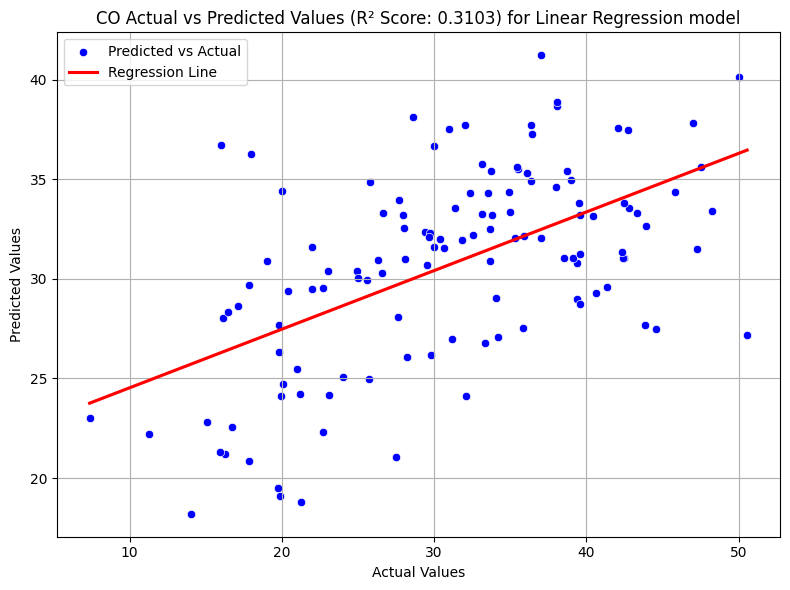

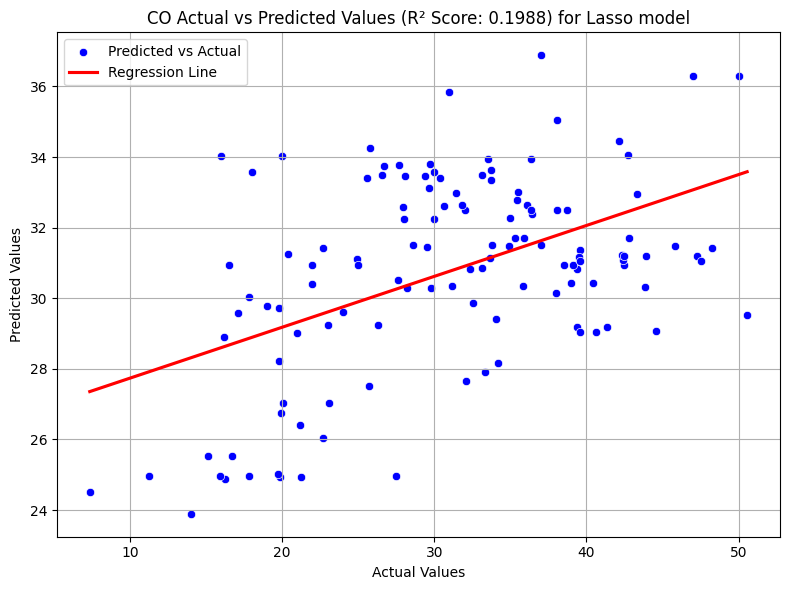

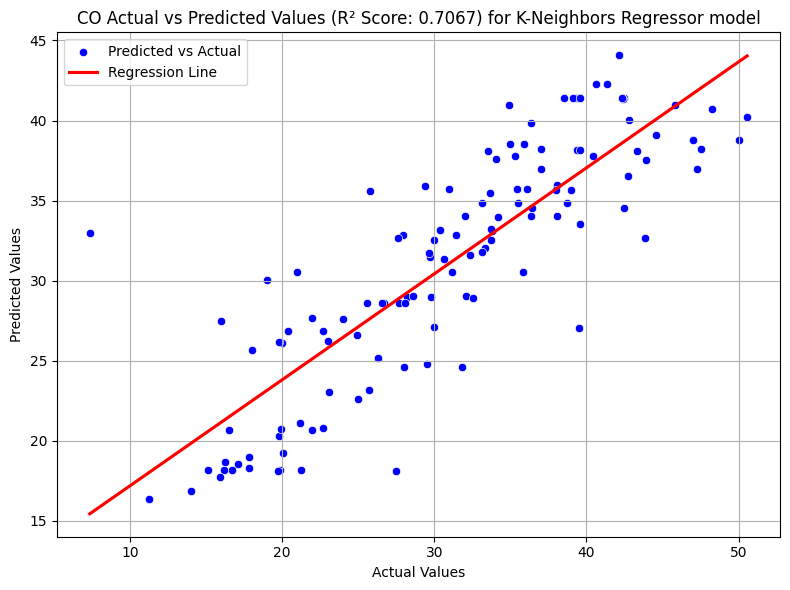

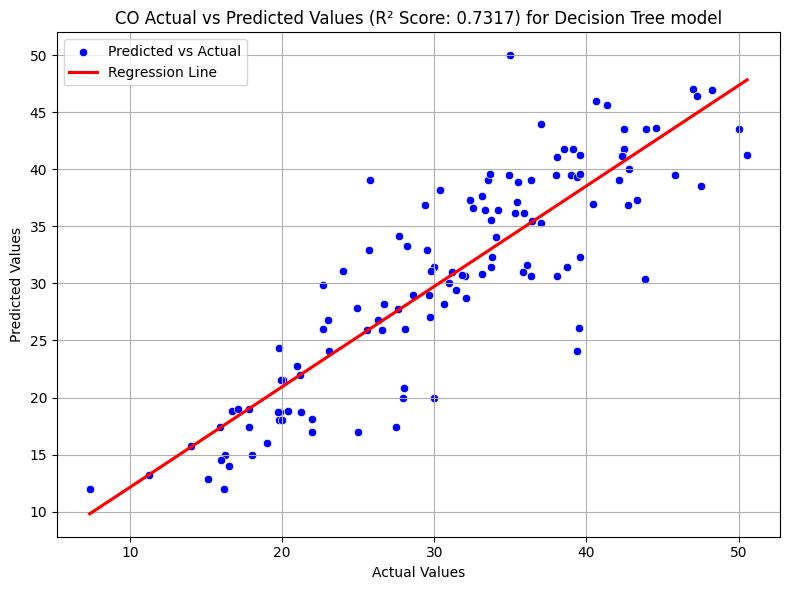

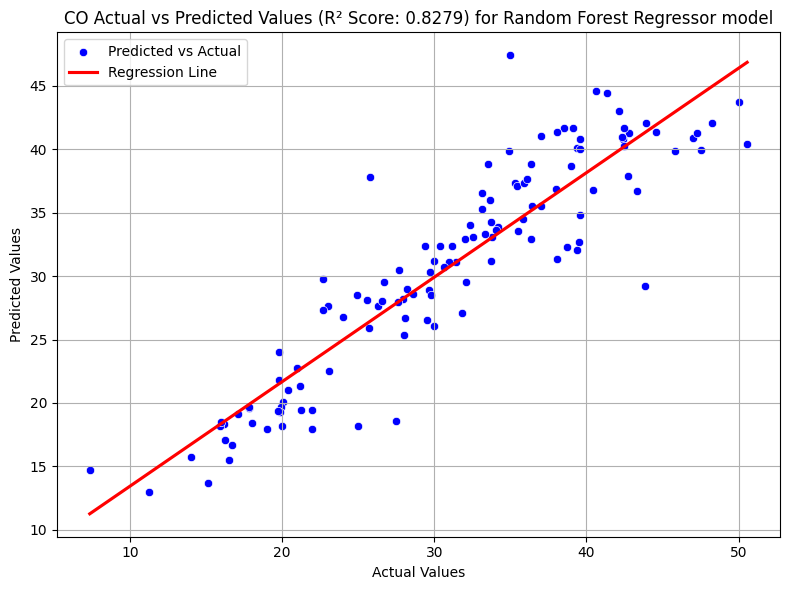

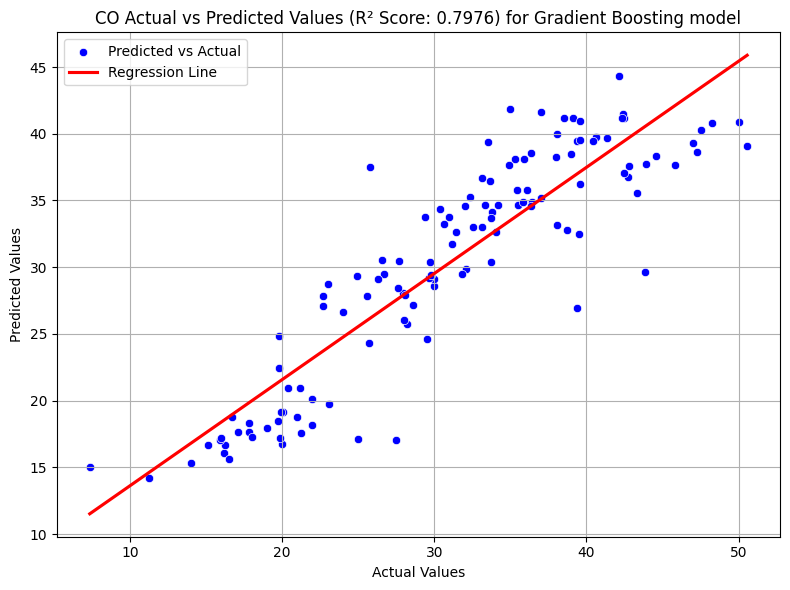

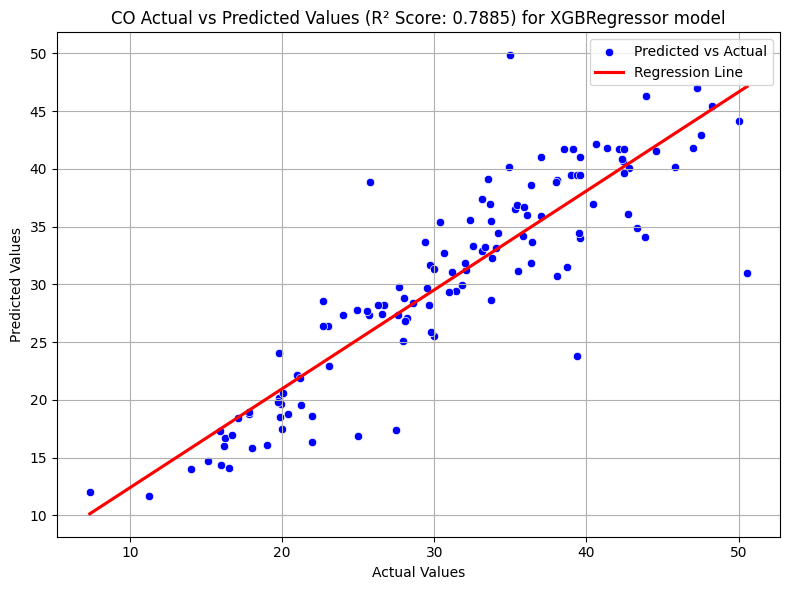

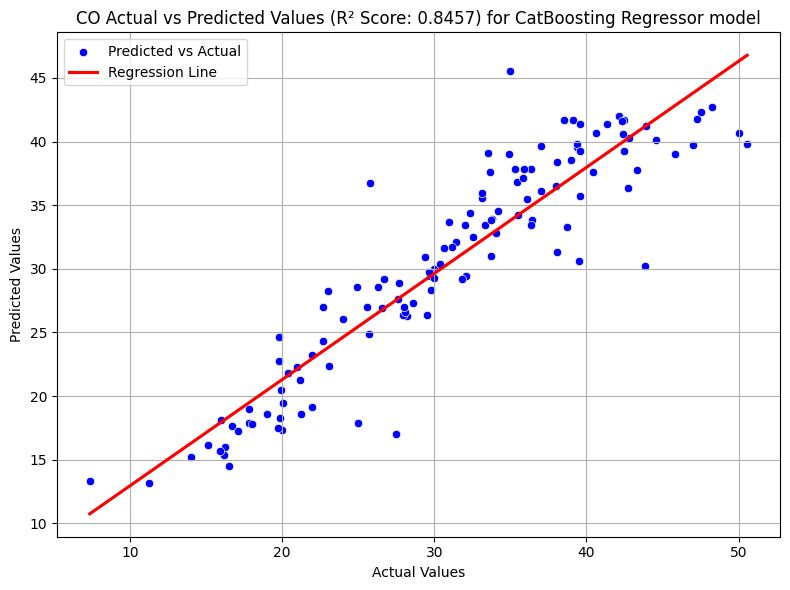

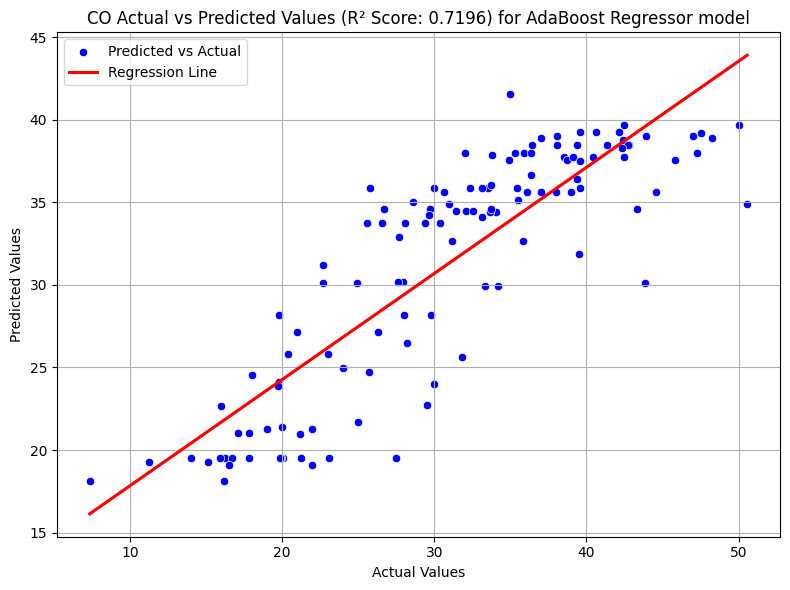

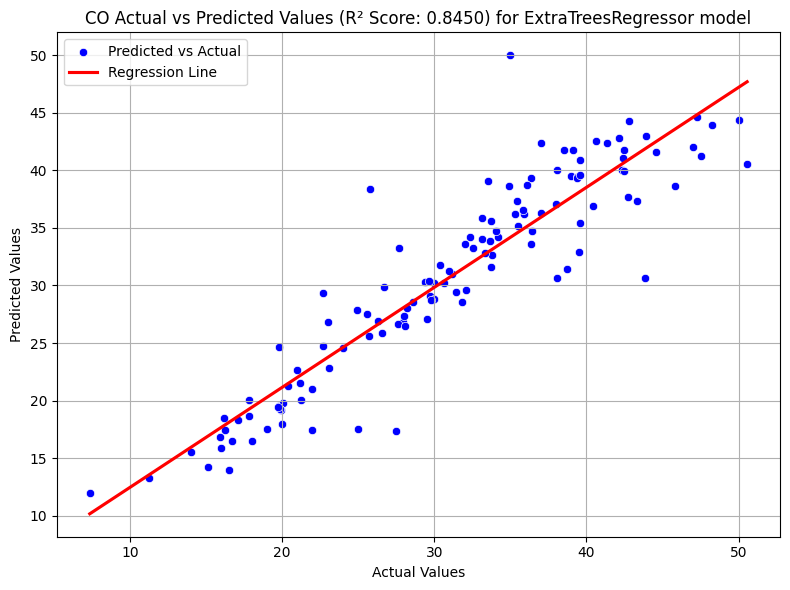

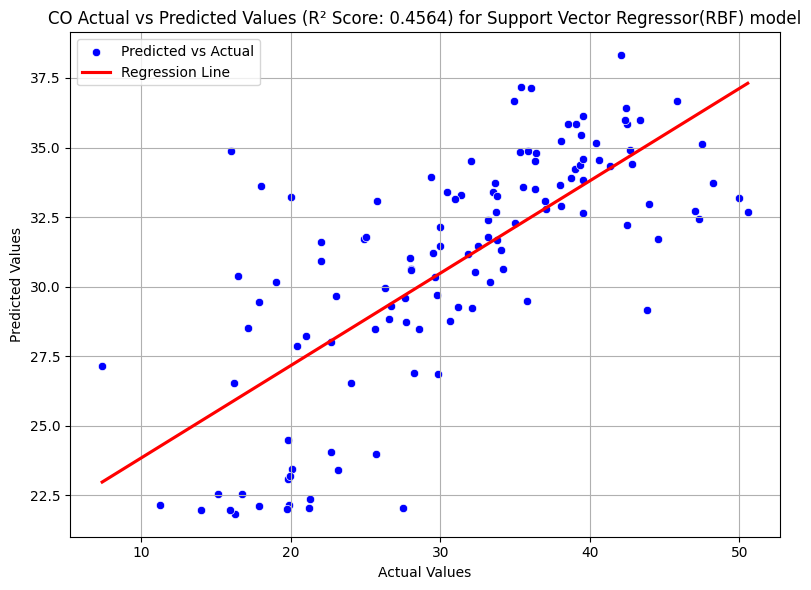

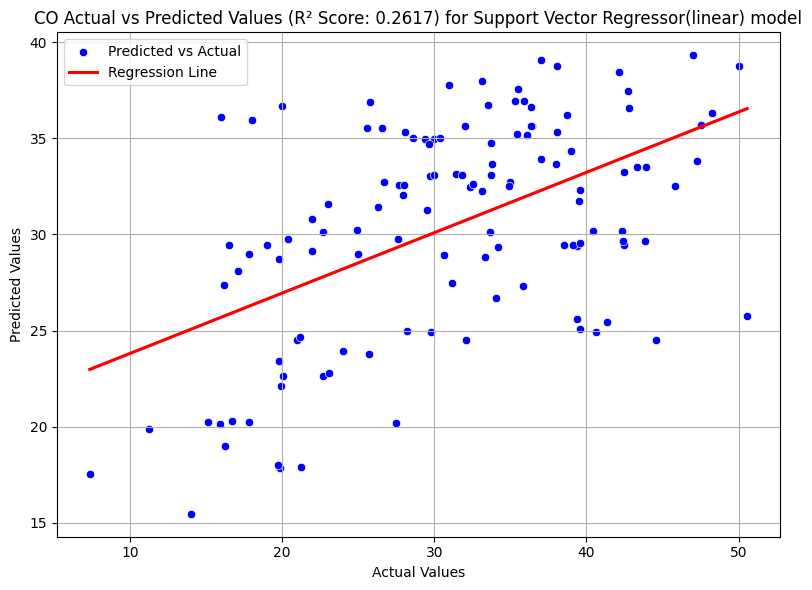

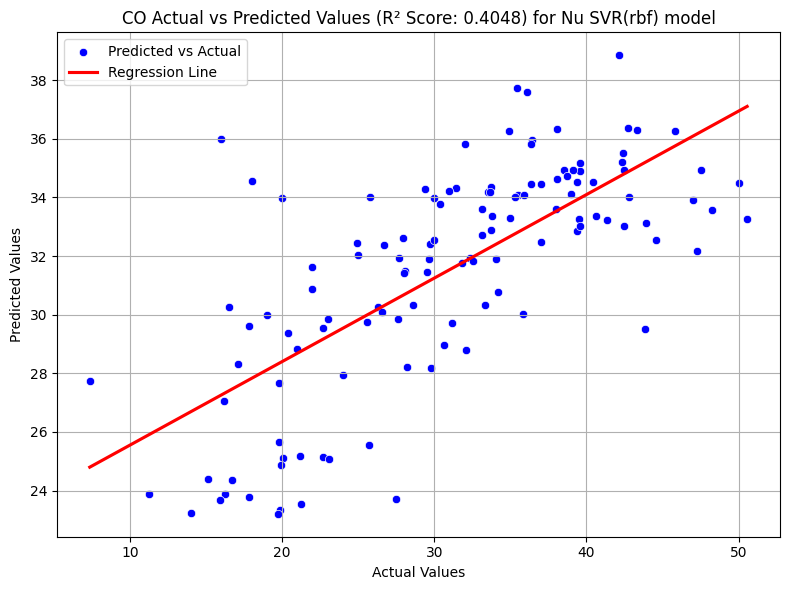

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2083 - mae: 1.4006 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


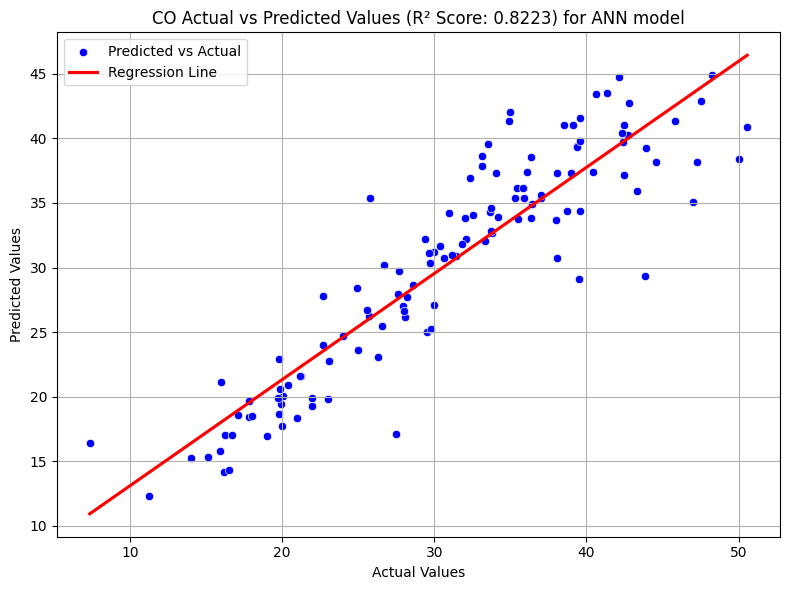

In [49]:
evaluate_model(models, X_train_scaled, y_train.CO, X_val_scaled, y_val.CO)

In [50]:
score = pd.DataFrame(list(zip(models.keys(), r2_train_score.values(), r2_test_score.values())), columns=["Model","r2_train_score", "r2_test_score"])
score

Model  r2_train_score  r2_test_score
0                  Linear Regression        0.298496       0.310329
1                              Lasso        0.205461       0.198758
2              K-Neighbors Regressor        0.794460       0.706655
3                      Decision Tree        0.997006       0.731715
4            Random Forest Regressor        0.970487       0.827927
5                  Gradient Boosting        0.919220       0.797646
6                       XGBRegressor        0.996926       0.788515
7              CatBoosting Regressor        0.968410       0.845676
8                 AdaBoost Regressor        0.746776       0.719574
9                ExtraTreesRegressor        0.997006       0.844978
10     Support Vector Regressor(RBF)        0.473190       0.456430
11  Support Vector Regressor(linear)        0.253874       0.261680
12                       Nu SVR(rbf)        0.433602       0.404798
13                               ANN        0.943367       0.822314

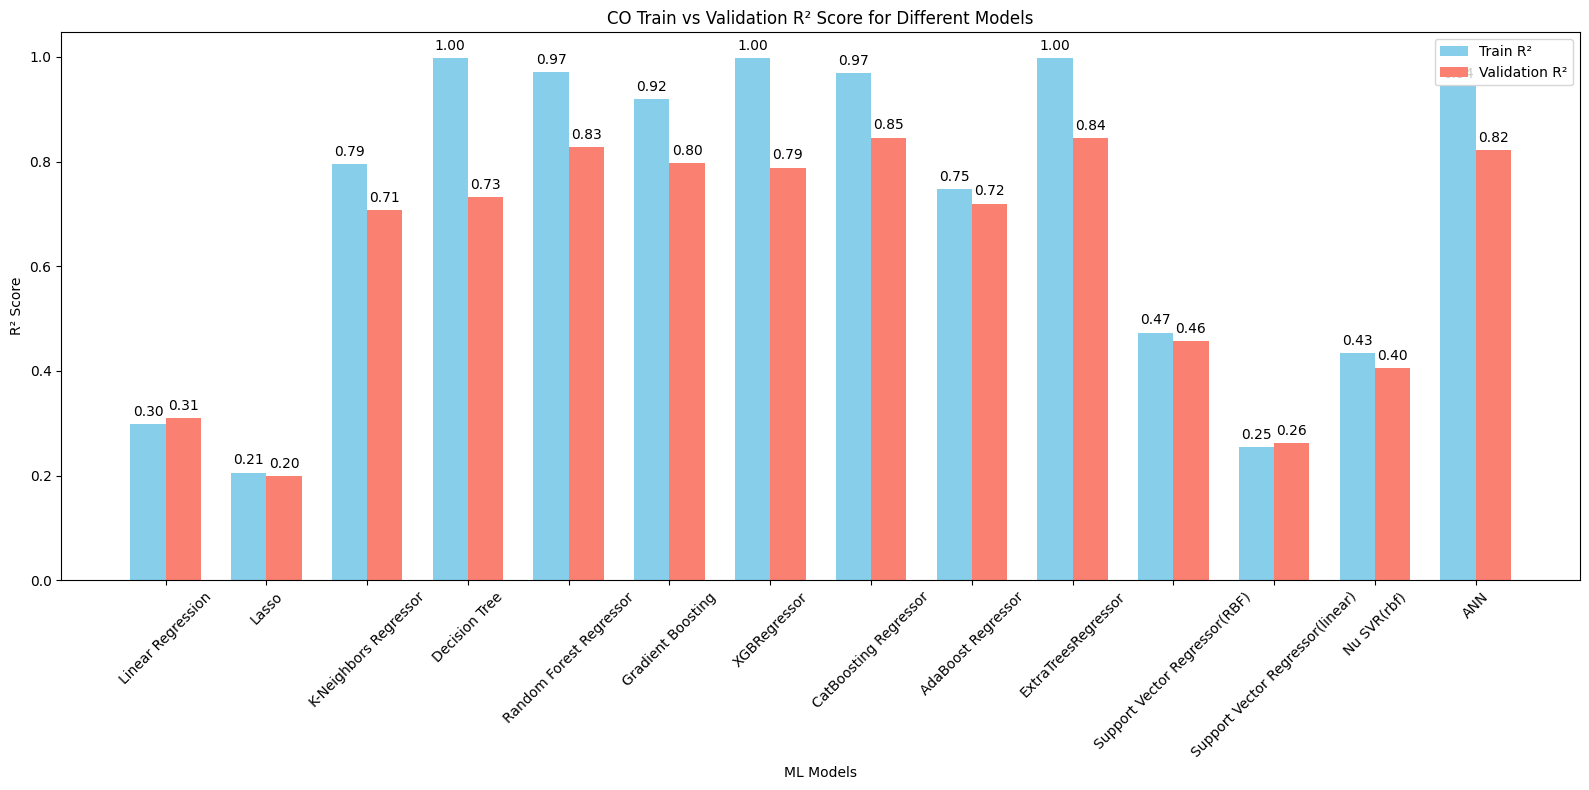

In [51]:
# Set positions
x = np.arange(len(score['Model']))
width = 0.35  # Width of the bars

# Create plot
fig, ax = plt.subplots(figsize=(16, 8))
bars1 = ax.bar(x - width/2, score['r2_train_score'], width, label='Train R²', color='skyblue')
bars2 = ax.bar(x + width/2, score['r2_test_score'], width, label='Validation R²', color='salmon')

# Add labels and title
ax.set_xlabel('ML Models')
ax.set_ylabel('R² Score')
ax.set_title('CO Train vs Validation R² Score for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(score['Model'], rotation=45)
ax.legend()

# Add R2 score text on top of bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig("CO Train vs Validation R² Score for Different Models")
plt.show()

## Predicting the value of CO2

In [52]:
ANN_model = Sequential([
    Dense(32, input_dim=13),                  # No activation here
    LeakyReLU(alpha=0.1),                    # LeakyReLU activation
    Dense(32, activation='tanh'),            # Tanh for richer non-linearity
    Dense(16, activation='relu'),            # ReLU for simplicity
    Dense(1, activation='linear')            # Linear for regression output
])

# Compile the model
ANN_model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


# Train the model
ANN_model.fit(X_train_scaled, y_train.CO2, epochs=500, verbose=1)

# Evaluate the model
loss, mae = ANN_model.evaluate(X_train_scaled, y_train.CO2, verbose=0)
print(f"\nModel evaluation:\nLoss (MSE): {loss:.2f}, MAE: {mae:.2f}")

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 971.2888 - mae: 29.2199
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 852.4738 - mae: 27.1535 
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 897.0617 - mae: 27.5853 
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 816.9807 - mae: 26.5347 
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 758.8616 - mae: 25.5917 
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 720.9613 - mae: 24.7938 
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 647.0811 - mae: 23.1684 
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 618.7953 - mae: 22.4222 
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 553.5217 - mae: 21.1887 
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 463.5688 - mae: 18.8825 
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 391.7823 - mae: 17.1454 
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 332.0067 - mae

In [53]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
     "Random Forest Regressor": RandomForestRegressor(),
     "Gradient Boosting": GradientBoostingRegressor(),
     "XGBRegressor": XGBRegressor(),
     "CatBoosting Regressor": CatBoostRegressor(verbose=0, iterations = 100),
     "AdaBoost Regressor": AdaBoostRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "Support Vector Regressor(RBF)": SVR(kernel="rbf"),
    "Support Vector Regressor(linear)": SVR(kernel="linear"),
    "Nu SVR(rbf)": NuSVR(kernel="rbf"),
    "ANN": ANN_model
}

In [54]:
def safe_flatten(y_pred):
    """
    Flattens the array if it's a 2D array with shape (n, 1).
    Useful for ANN predictions.
    """
    if isinstance(y_pred, (np.ndarray, list)) and len(np.shape(y_pred)) == 2 and y_pred.shape[1] == 1:
        return y_pred.flatten()
    return y_pred

In [55]:
r2_train_score = {}
r2_test_score = {}
def evaluate_model(models, X_train, y_train, X_val, y_val):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_val)

        y = y_val
        y_pred = safe_flatten(y_test_pred)

        plt.figure(figsize=(8, 6))
        r2 = r2_score(y, y_pred)
        
        sns.scatterplot(x=y, y=y_pred, label='Predicted vs Actual', color='blue')
        sns.regplot(x=y, y=y_pred, scatter=False, label='Regression Line', color='red', ci=None)
        
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'CO2 Actual vs Predicted Values (R² Score: {r2:.4f}) for {model_name} model')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f'CO2 Actual vs Predicted Values (R² Score: {r2:.4f}) for {model_name} model.png')
        plt.show()
        
        r2_train_score[model_name] = r2_score(y_train, y_train_pred)
        r2_test_score[model_name] = r2_score(y_val, y_test_pred)

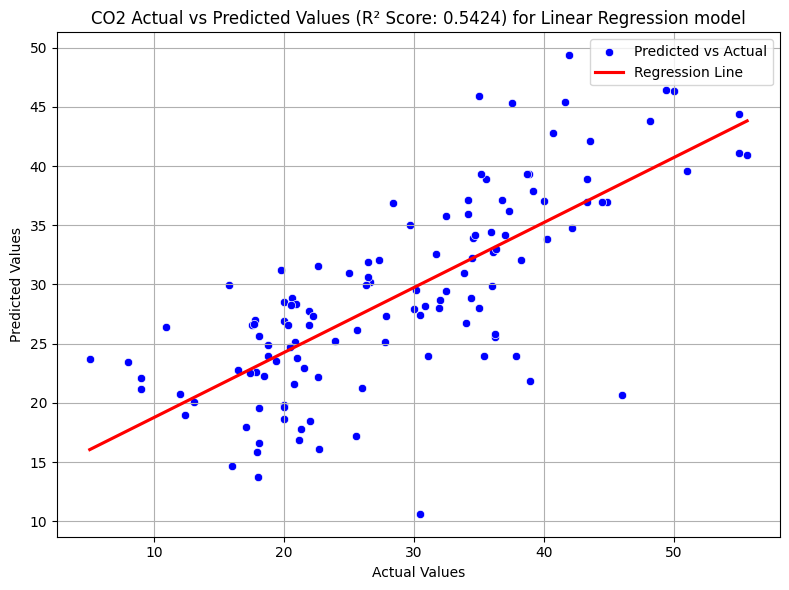

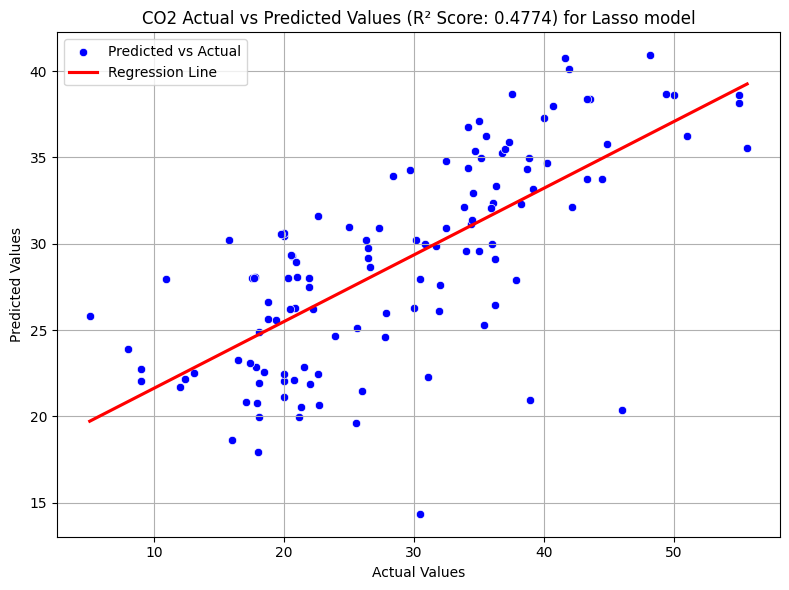

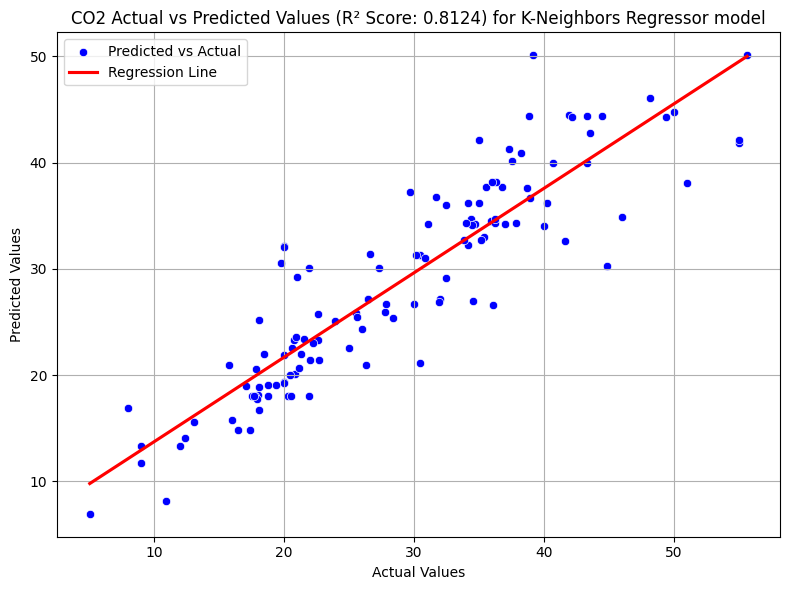

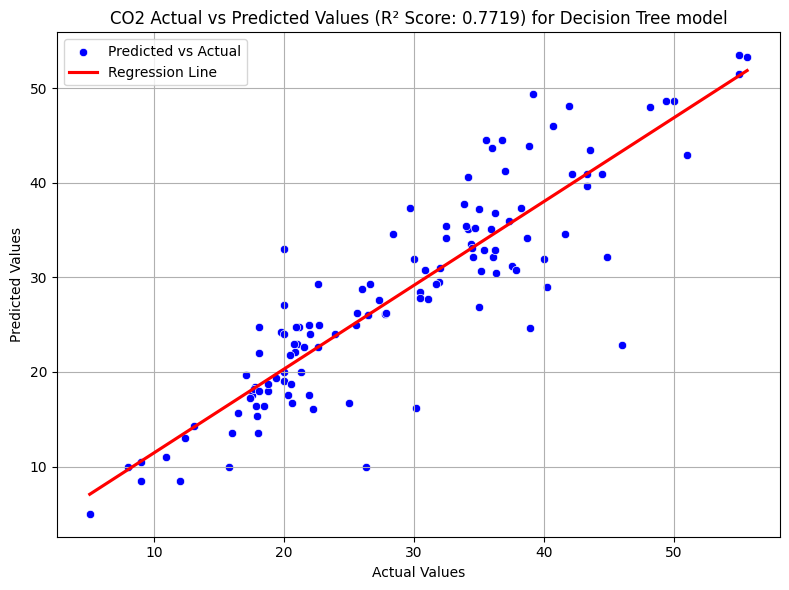

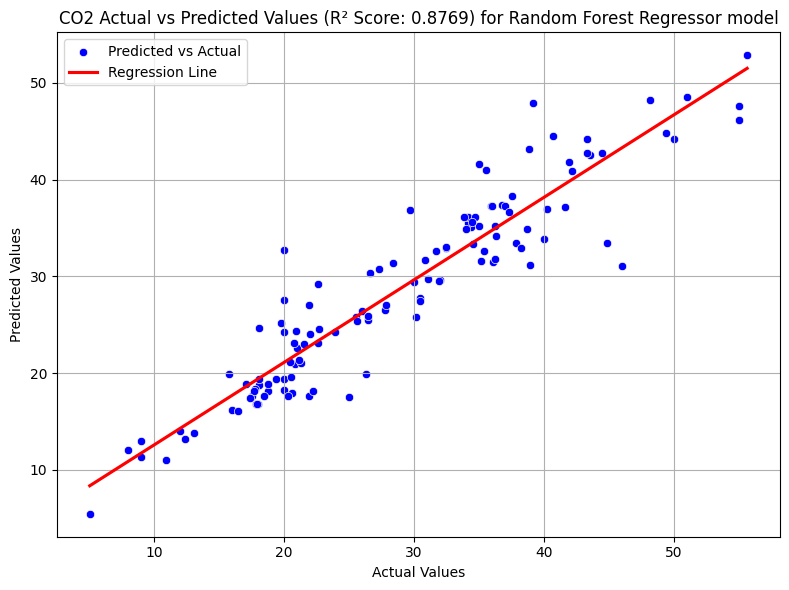

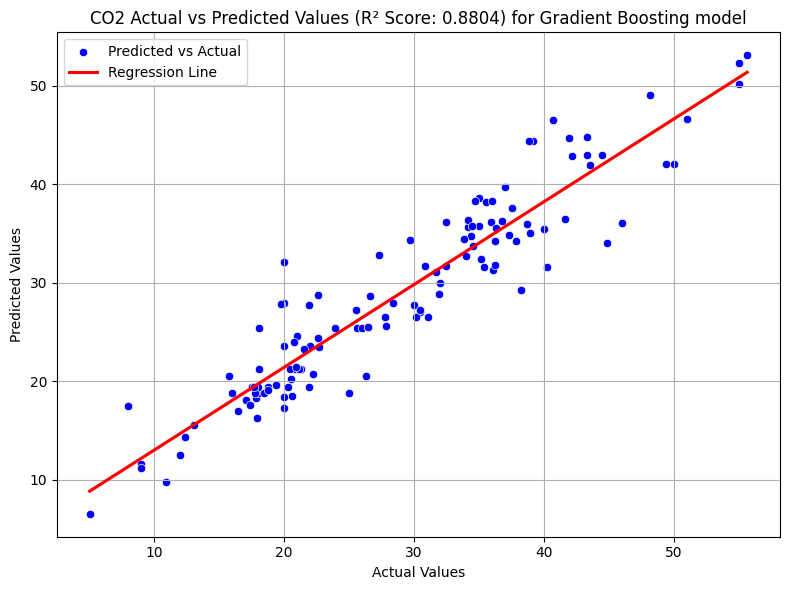

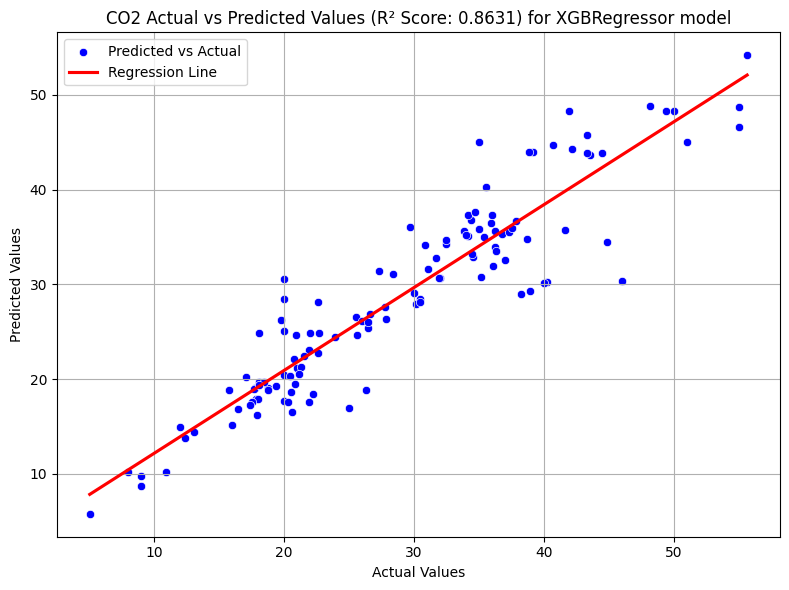

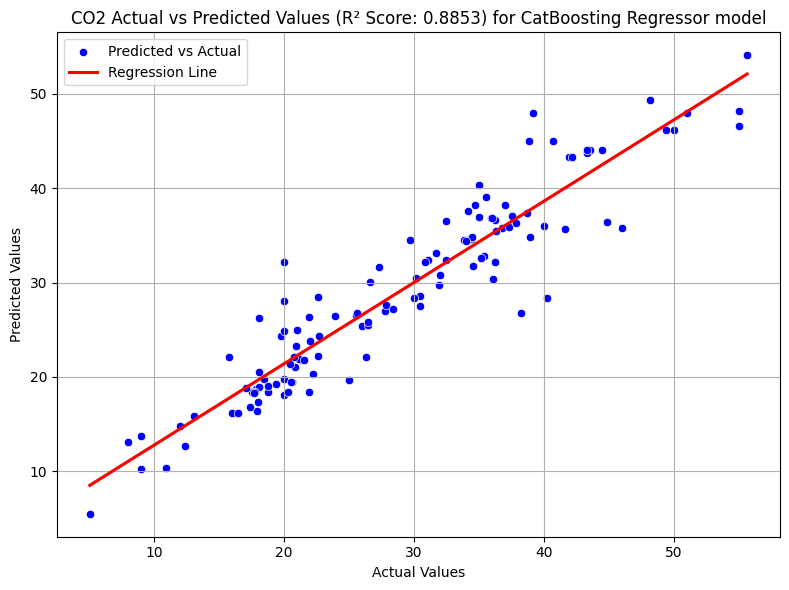

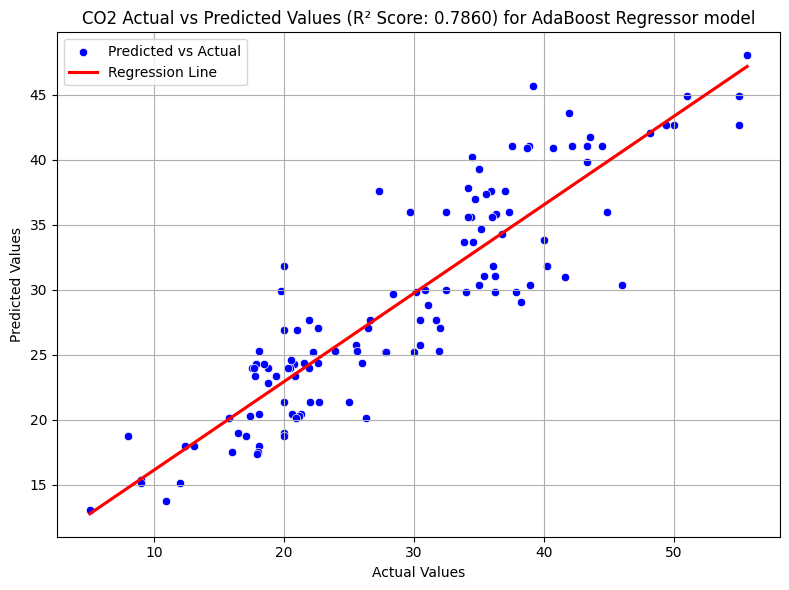

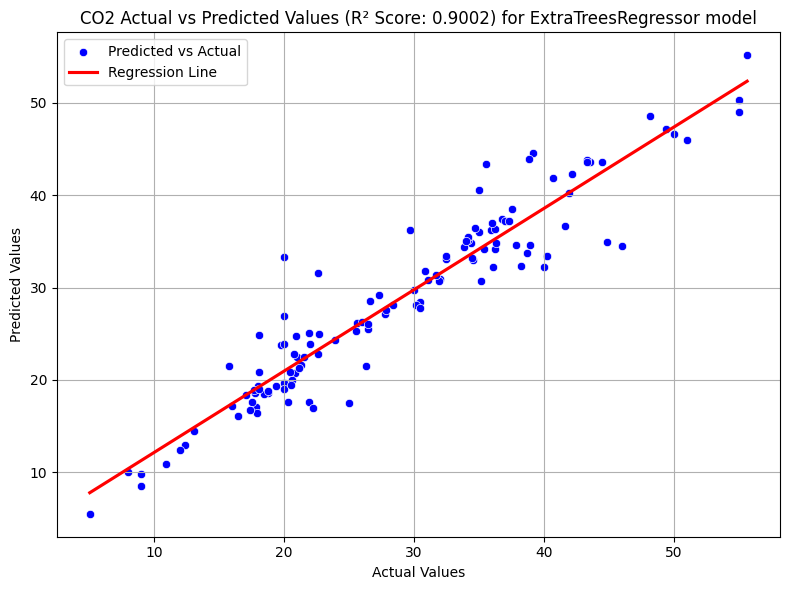

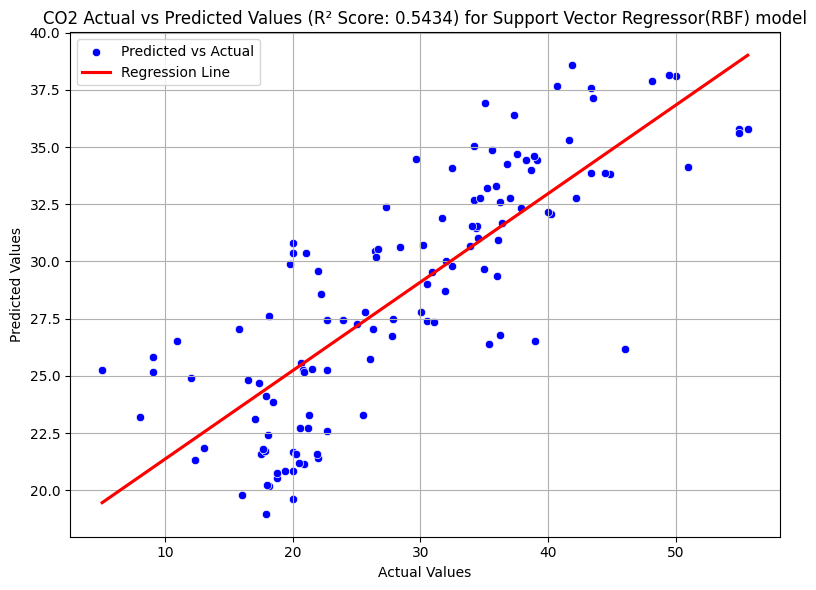

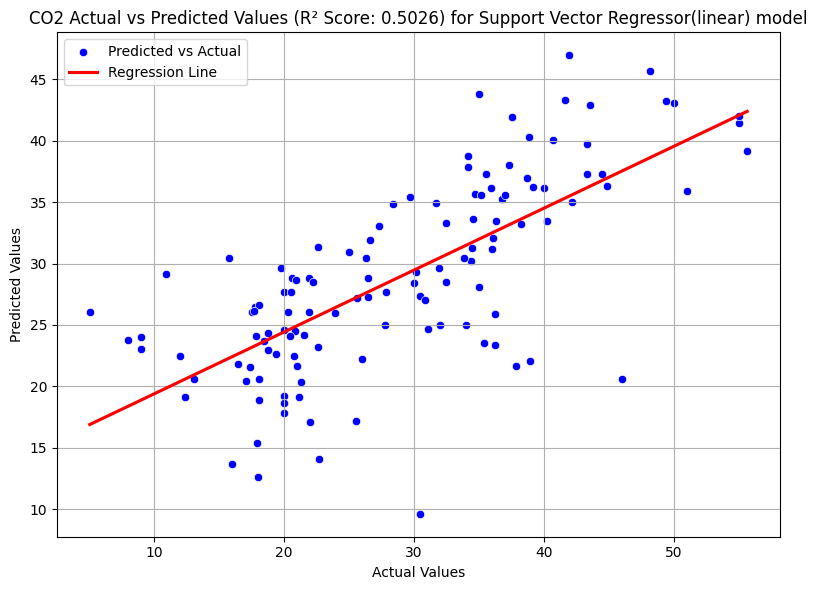

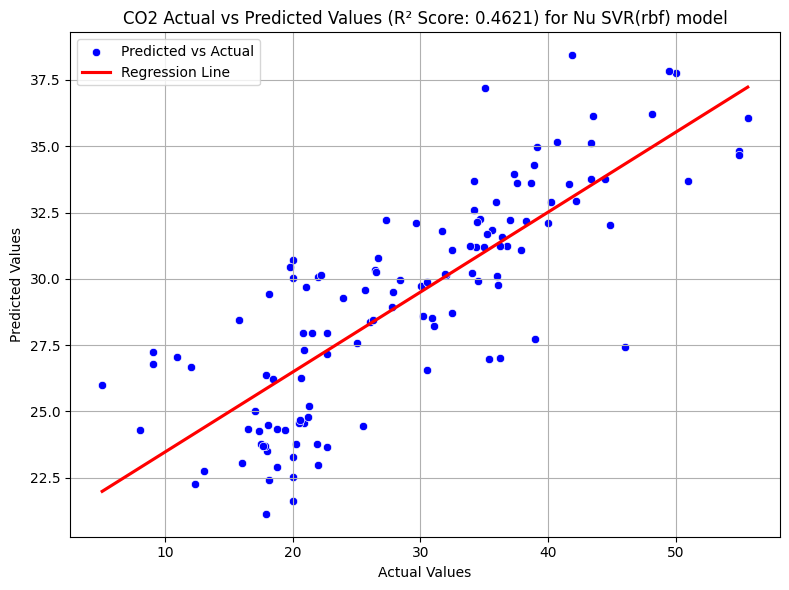

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3402 - mae: 1.0227 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


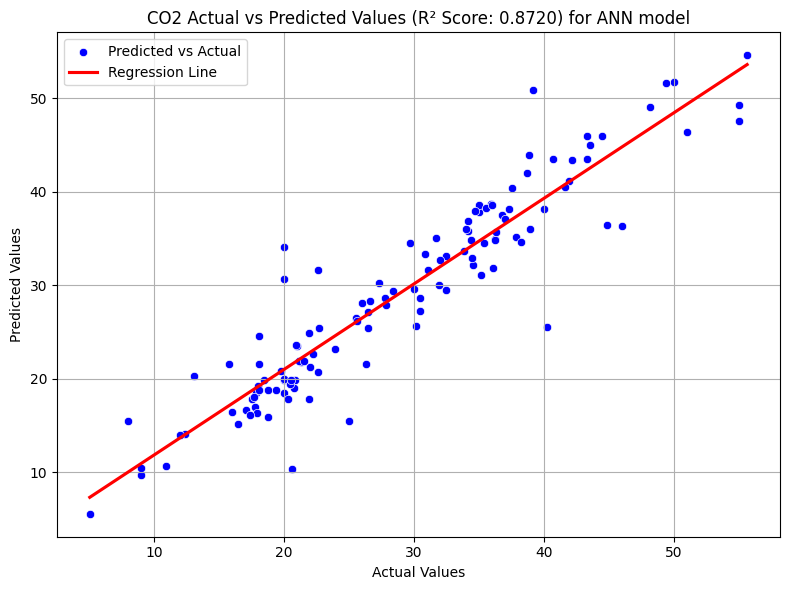

In [56]:
evaluate_model(models, X_train_scaled, y_train.CO2, X_val_scaled, y_val.CO2)

In [57]:
score = pd.DataFrame(list(zip(models.keys(), r2_train_score.values(), r2_test_score.values())), columns=["Model","r2_train_score", "r2_test_score"])
score

Model  r2_train_score  r2_test_score
0                  Linear Regression        0.509402       0.542437
1                              Lasso        0.452207       0.477392
2              K-Neighbors Regressor        0.838501       0.812381
3                      Decision Tree        0.997671       0.771861
4            Random Forest Regressor        0.976996       0.876897
5                  Gradient Boosting        0.941975       0.880438
6                       XGBRegressor        0.997604       0.863107
7              CatBoosting Regressor        0.981642       0.885309
8                 AdaBoost Regressor        0.833152       0.786018
9                ExtraTreesRegressor        0.997670       0.900201
10     Support Vector Regressor(RBF)        0.514539       0.543360
11  Support Vector Regressor(linear)        0.485929       0.502646
12                       Nu SVR(rbf)        0.448582       0.462060
13                               ANN        0.977113       0.871994

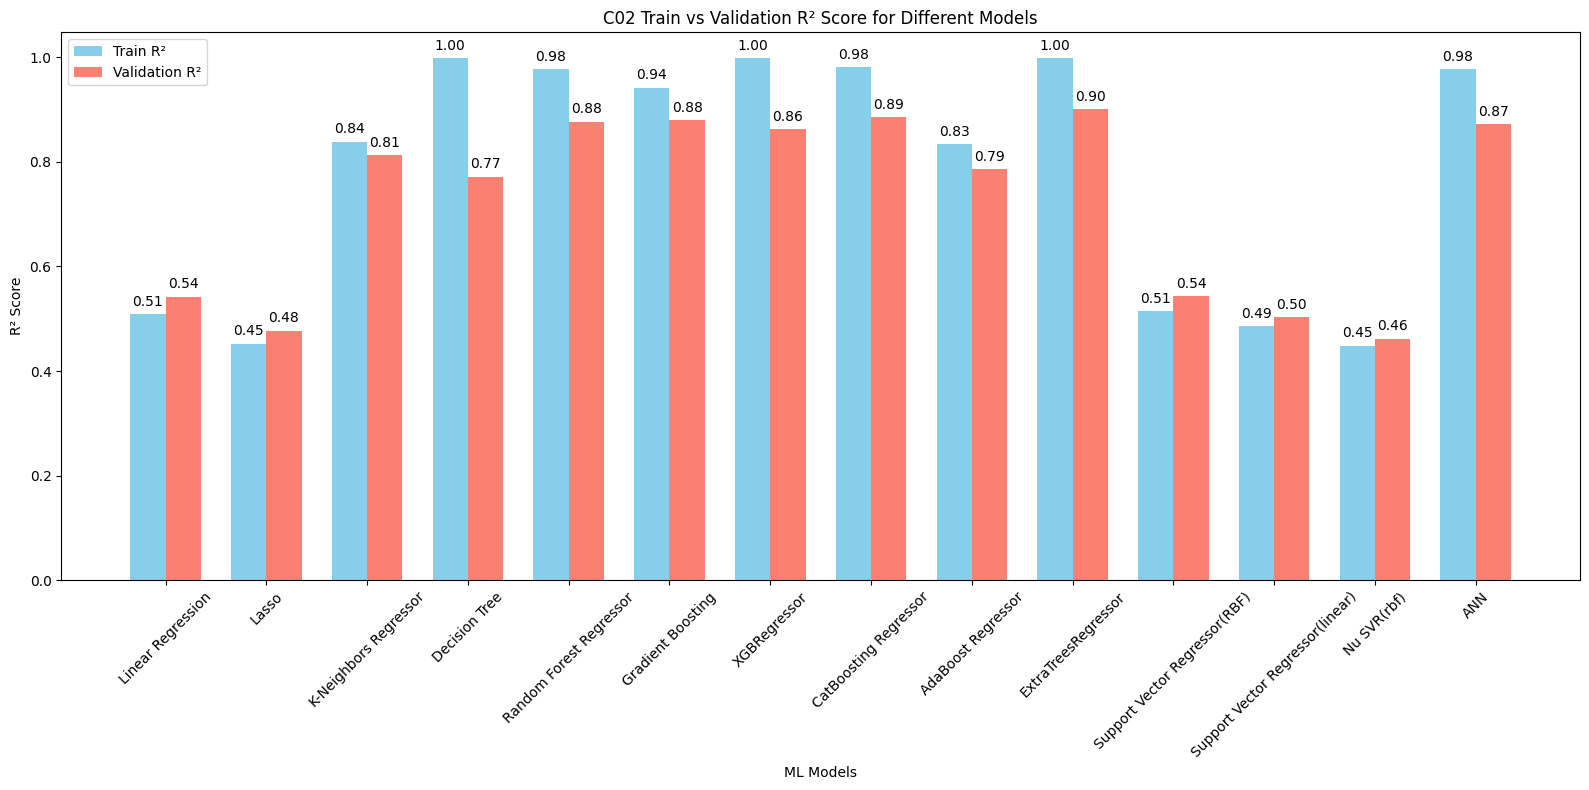

In [58]:
# Set positions
x = np.arange(len(score['Model']))
width = 0.35  # Width of the bars

# Create plot
fig, ax = plt.subplots(figsize=(16, 8))
bars1 = ax.bar(x - width/2, score['r2_train_score'], width, label='Train R²', color='skyblue')
bars2 = ax.bar(x + width/2, score['r2_test_score'], width, label='Validation R²', color='salmon')

# Add labels and title
ax.set_xlabel('ML Models')
ax.set_ylabel('R² Score')
ax.set_title('C02 Train vs Validation R² Score for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(score['Model'], rotation=45)
ax.legend()

# Add R2 score text on top of bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig("CO2 Train vs Validation R² Score for Different Models")
plt.show()

## Prediction for H2

In [59]:
ANN_model = Sequential([
    Dense(32, input_dim=13),                  # No activation here
    LeakyReLU(alpha=0.1),                    # LeakyReLU activation
    Dense(32, activation='tanh'),            # Tanh for richer non-linearity
    Dense(16, activation='relu'),            # ReLU for simplicity
    Dense(1, activation='linear')            # Linear for regression output
])

# Compile the model
ANN_model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


# Train the model
ANN_model.fit(X_train_scaled, y_train.H2, epochs=500, verbose=1)

# Evaluate the model
loss, mae = ANN_model.evaluate(X_train_scaled, y_train.H2, verbose=0)
print(f"\nModel evaluation:\nLoss (MSE): {loss:.2f}, MAE: {mae:.2f}")

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1114.5948 - mae: 30.6551
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1092.6293 - mae: 30.3200
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1016.1355 - mae: 29.1121
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 950.2632 - mae: 27.9327 
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 925.0381 - mae: 27.6578  
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 782.8148 - mae: 25.2815 
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 713.4860 - mae: 23.5926 
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 617.4475 - mae: 21.3423 
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 466.7102 - mae: 17.8205 
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 379.0529 - mae: 15.9844 
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 279.0497 - mae: 13.2619 
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 233.6953 - m

In [60]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
     "Random Forest Regressor": RandomForestRegressor(),
     "Gradient Boosting": GradientBoostingRegressor(),
     "XGBRegressor": XGBRegressor(),
     "CatBoosting Regressor": CatBoostRegressor(verbose=0, iterations = 100),
     "AdaBoost Regressor": AdaBoostRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "Support Vector Regressor(RBF)": SVR(kernel="rbf"),
    "Support Vector Regressor(linear)": SVR(kernel="linear"),
    "Nu SVR(rbf)": NuSVR(kernel="rbf"),
    "ANN": ANN_model
}

In [61]:
def safe_flatten(y_pred):
    """
    Flattens the array if it's a 2D array with shape (n, 1).
    Useful for ANN predictions.
    """
    if isinstance(y_pred, (np.ndarray, list)) and len(np.shape(y_pred)) == 2 and y_pred.shape[1] == 1:
        return y_pred.flatten()
    return y_pred

In [62]:
r2_train_score = {}
r2_test_score = {}
def evaluate_model(models, X_train, y_train, X_val, y_val):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_val)

        y = y_val
        y_pred = safe_flatten(y_test_pred)

        plt.figure(figsize=(8, 6))
        r2 = r2_score(y, y_pred)
        
        sns.scatterplot(x=y, y=y_pred, label='Predicted vs Actual', color='blue')
        sns.regplot(x=y, y=y_pred, scatter=False, label='Regression Line', color='red', ci=None)
        
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'H2 Actual vs Predicted Values (R² Score: {r2:.4f}) for {model_name} model')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f'H2 Actual vs Predicted Values (R² Score: {r2:.4f}) for {model_name} model.png')
        plt.show()
        
        r2_train_score[model_name] = r2_score(y_train, y_train_pred)
        r2_test_score[model_name] = r2_score(y_val, y_test_pred)

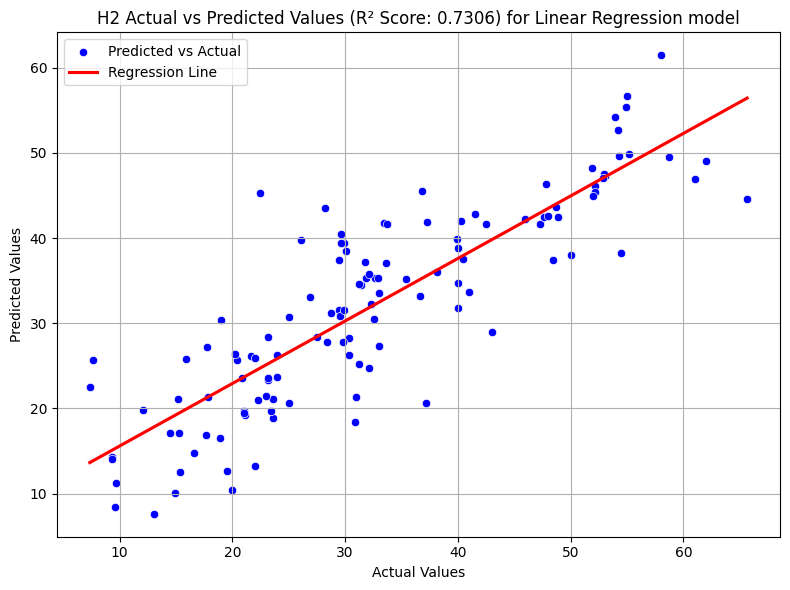

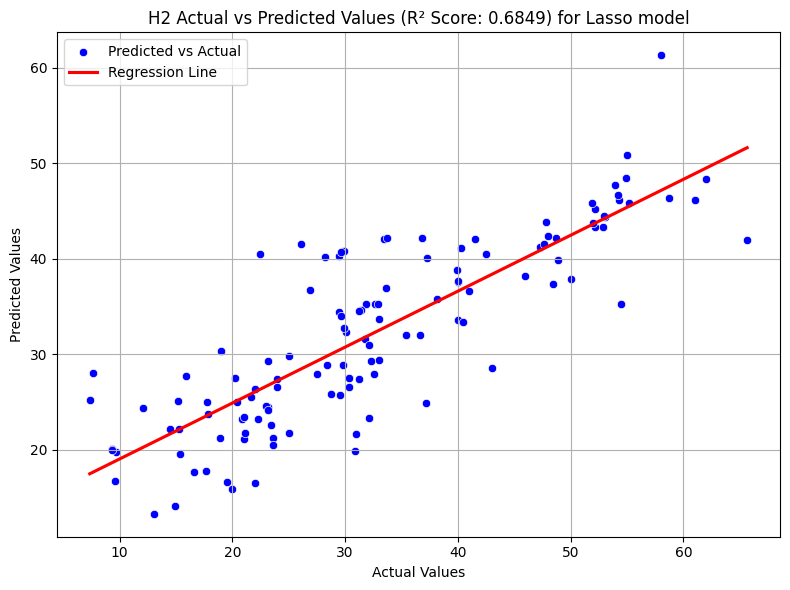

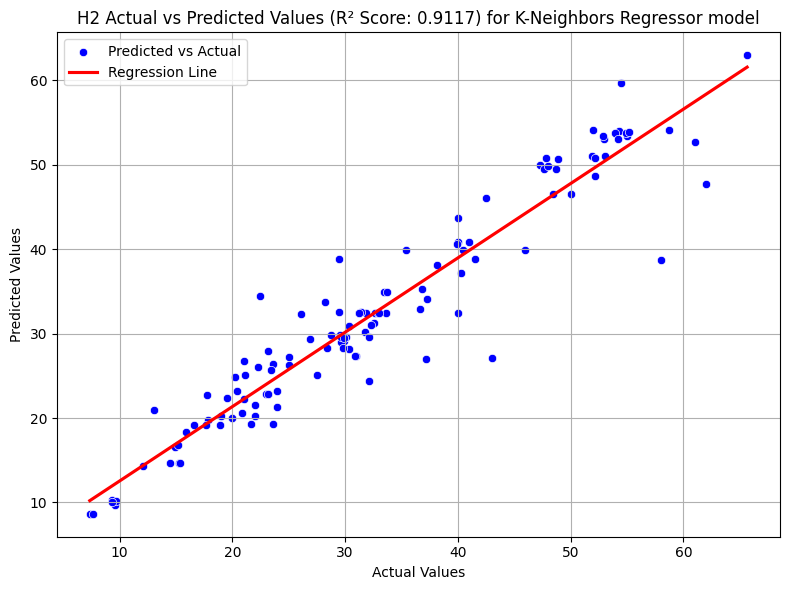

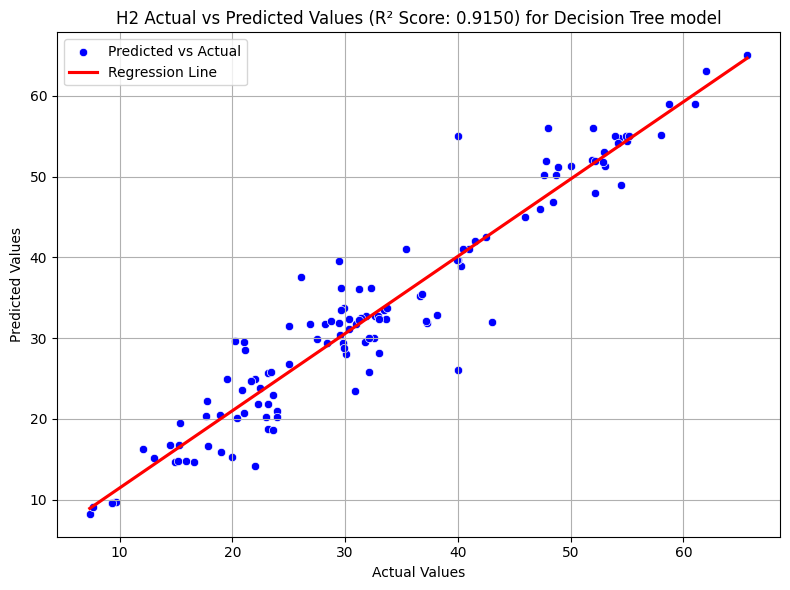

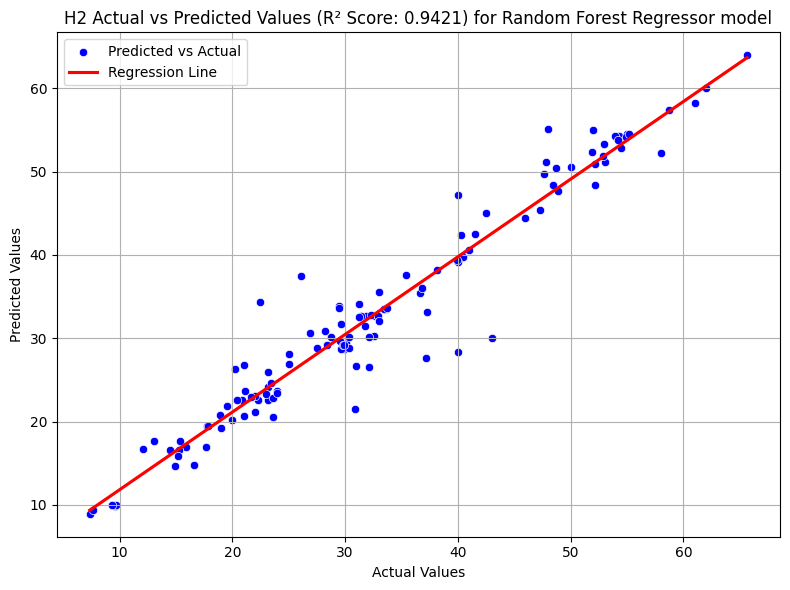

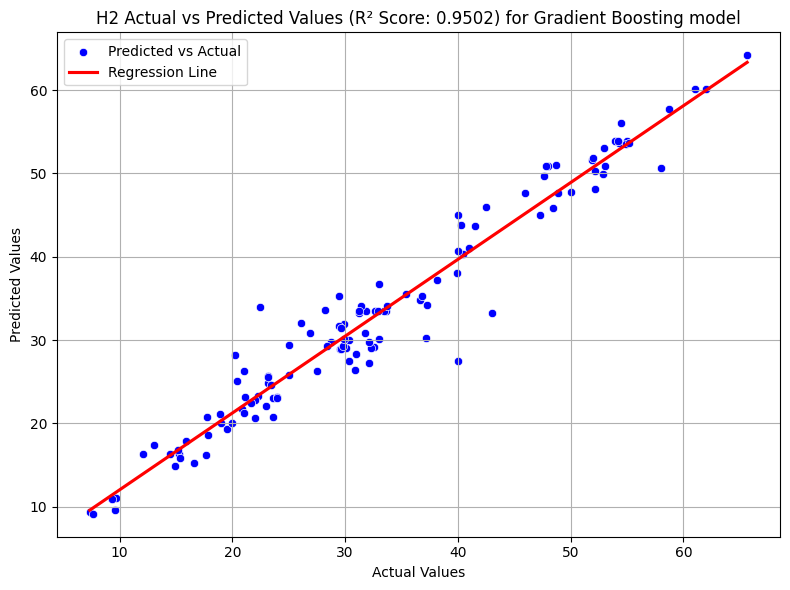

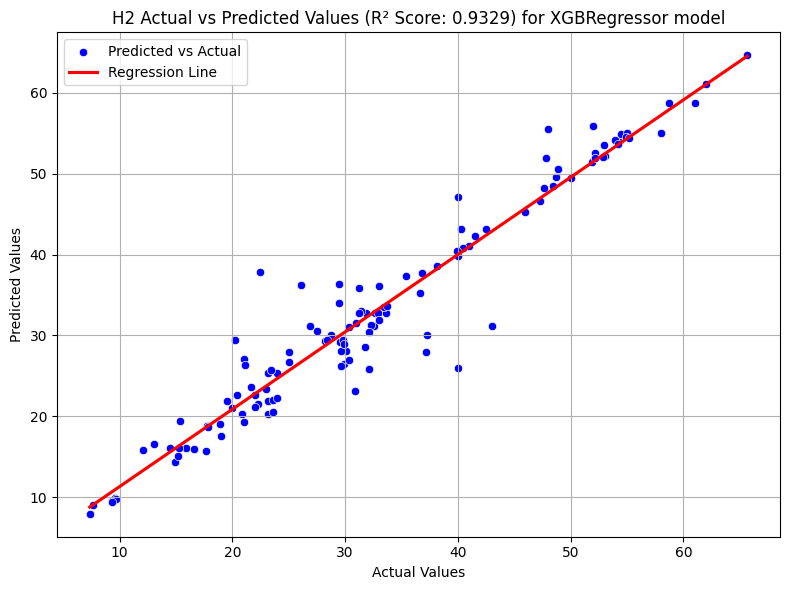

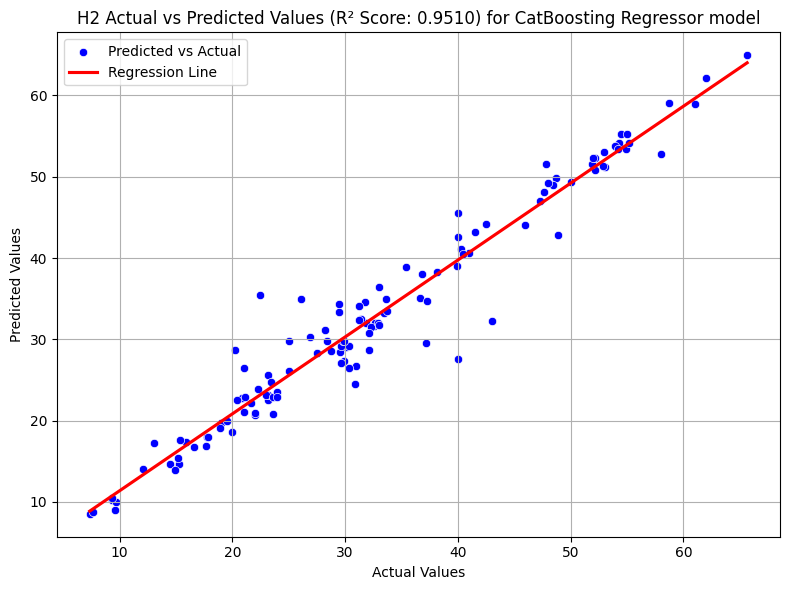

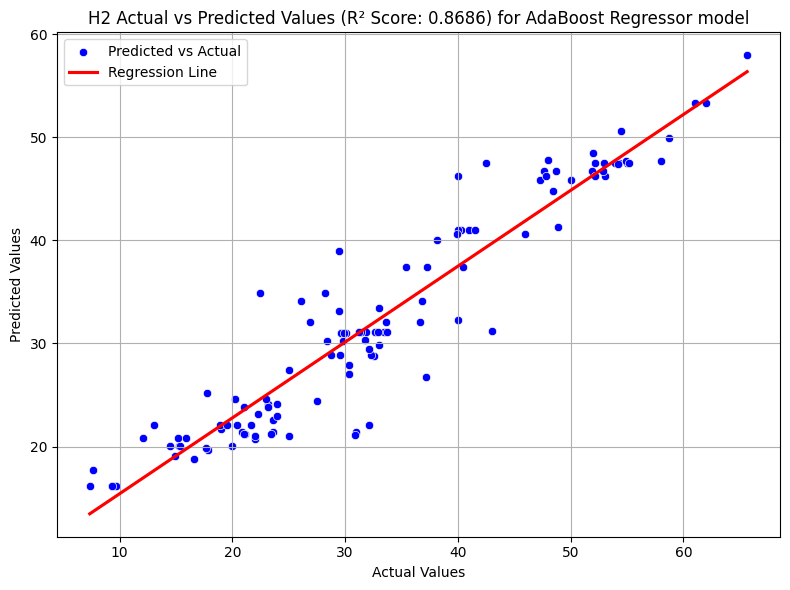

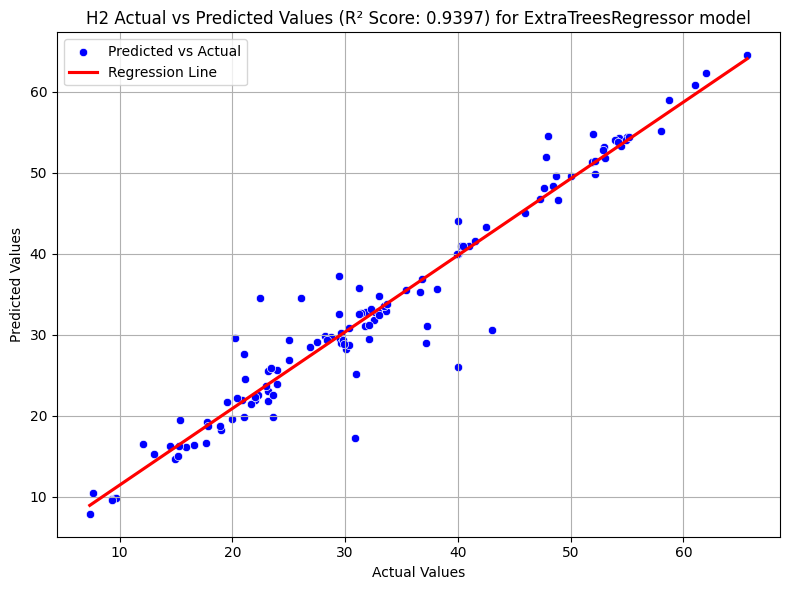

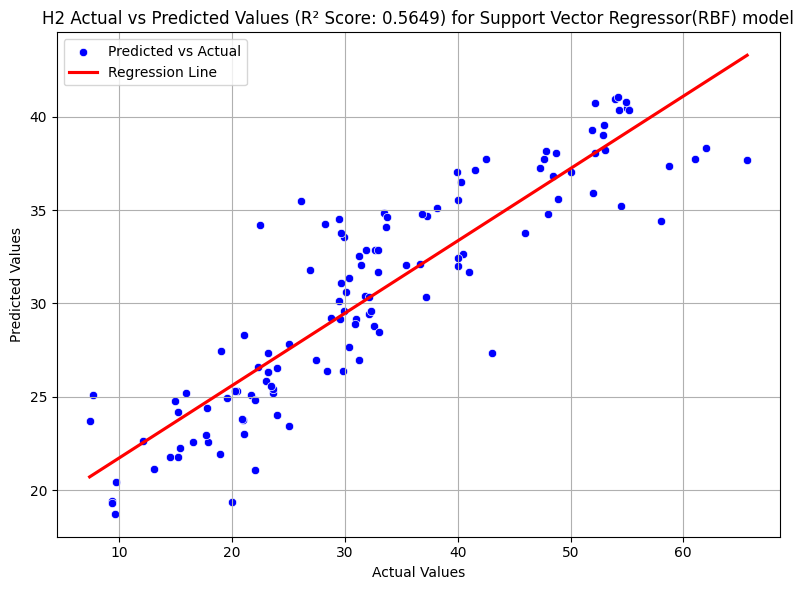

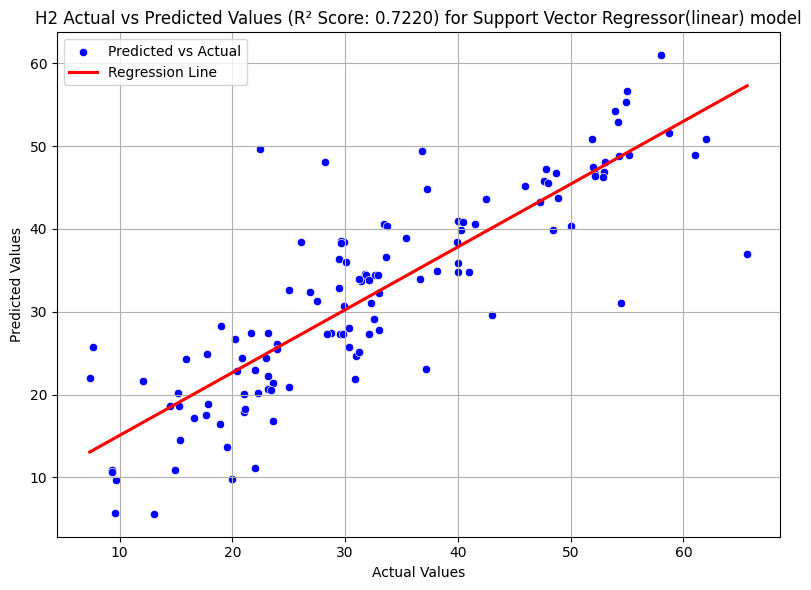

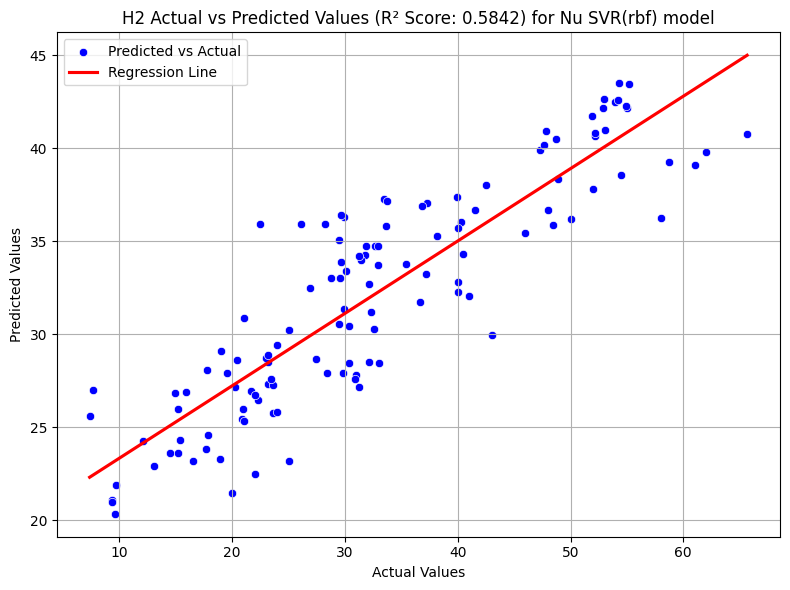

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4085 - mae: 1.2107 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


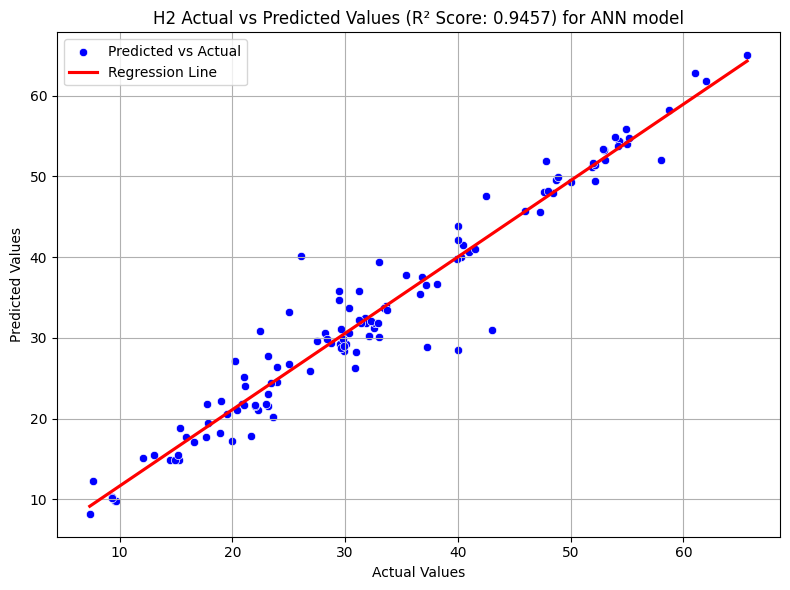

In [63]:
evaluate_model(models, X_train_scaled, y_train.H2, X_val_scaled, y_val.H2)

In [64]:
score = pd.DataFrame(list(zip(models.keys(), r2_train_score.values(), r2_test_score.values())), columns=["Model","r2_train_score", "r2_test_score"])
score

Model  r2_train_score  r2_test_score
0                  Linear Regression        0.701773       0.730645
1                              Lasso        0.650434       0.684888
2              K-Neighbors Regressor        0.896657       0.911715
3                      Decision Tree        0.998124       0.914972
4            Random Forest Regressor        0.983950       0.942061
5                  Gradient Boosting        0.966199       0.950161
6                       XGBRegressor        0.998037       0.932889
7              CatBoosting Regressor        0.986135       0.951031
8                 AdaBoost Regressor        0.856201       0.868602
9                ExtraTreesRegressor        0.998123       0.939666
10     Support Vector Regressor(RBF)        0.568170       0.564914
11  Support Vector Regressor(linear)        0.670485       0.721979
12                       Nu SVR(rbf)        0.580037       0.584159
13                               ANN        0.975372       0.945724

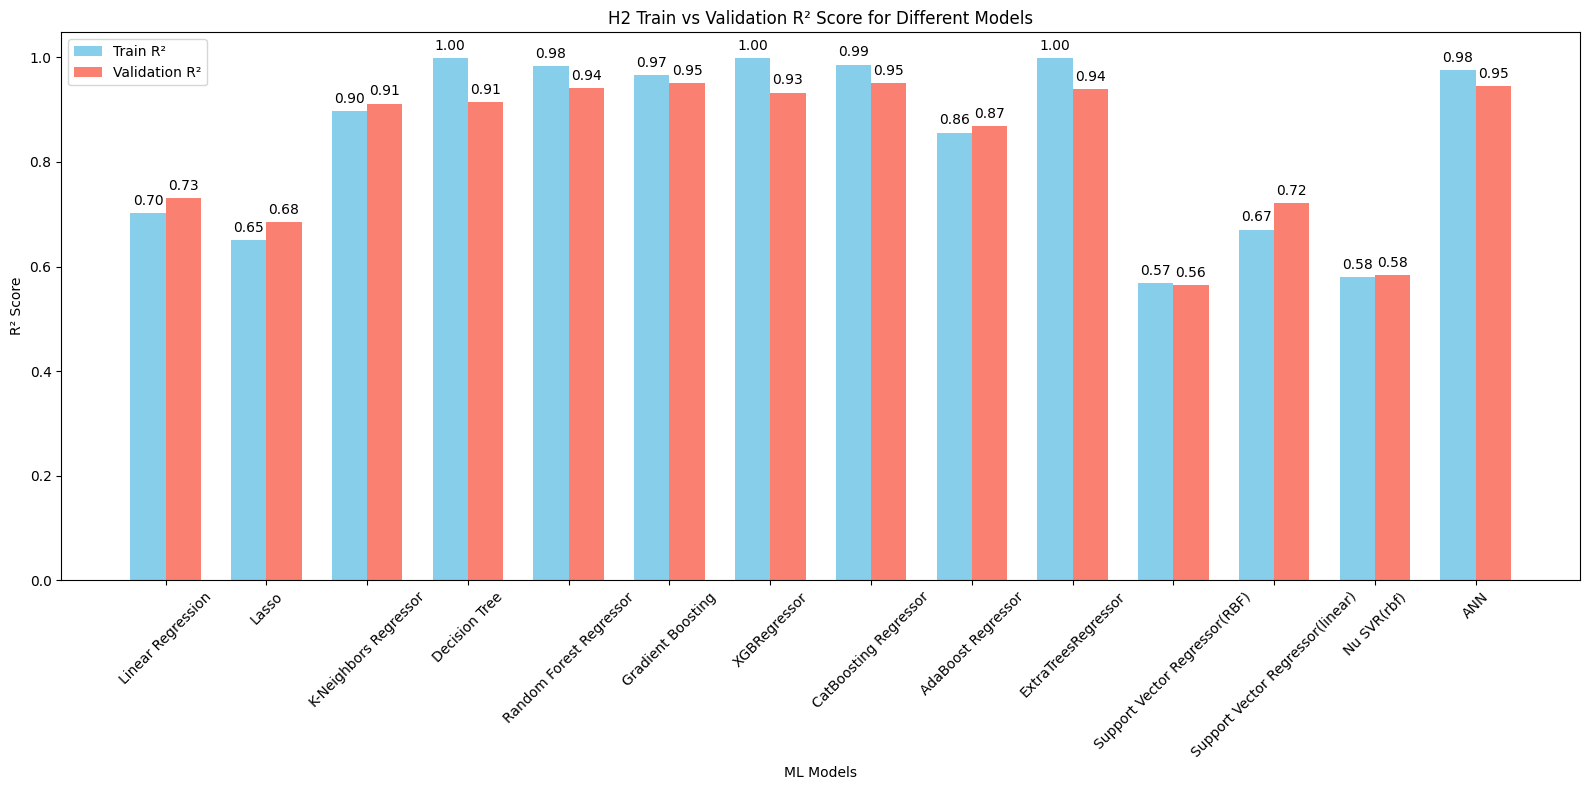

In [65]:
# Set positions
x = np.arange(len(score['Model']))
width = 0.35  # Width of the bars

# Create plot
fig, ax = plt.subplots(figsize=(16, 8))
bars1 = ax.bar(x - width/2, score['r2_train_score'], width, label='Train R²', color='skyblue')
bars2 = ax.bar(x + width/2, score['r2_test_score'], width, label='Validation R²', color='salmon')

# Add labels and title
ax.set_xlabel('ML Models')
ax.set_ylabel('R² Score')
ax.set_title('H2 Train vs Validation R² Score for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(score['Model'], rotation=45)
ax.legend()

# Add R2 score text on top of bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig("H2 Train vs Validation R² Score for Different Models")
plt.show()

## Predicting CH4 values

In [66]:
ANN_model = Sequential([
    Dense(32, input_dim=13),                  # No activation here
    LeakyReLU(alpha=0.1),                    # LeakyReLU activation
    Dense(32, activation='tanh'),            # Tanh for richer non-linearity
    Dense(16, activation='relu'),            # ReLU for simplicity
    Dense(1, activation='linear')            # Linear for regression output
])

# Compile the model
ANN_model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


# Train the model
ANN_model.fit(X_train_scaled, y_train.CH4, epochs=500, verbose=1)

# Evaluate the model
loss, mae = ANN_model.evaluate(X_train_scaled, y_train.CH4, verbose=0)
print(f"\nModel evaluation:\nLoss (MSE): {loss:.2f}, MAE: {mae:.2f}")

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 70.6160 - mae: 7.6613
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67.3477 - mae: 7.4664 
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.4833 - mae: 7.1564 
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.4934 - mae: 6.4522 
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42.2167 - mae: 5.4767 
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.6310 - mae: 4.5404 
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.5081 - mae: 3.8119 
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.0438 - mae: 3.1950 
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.8049 - mae: 2.8408
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.6834 - mae: 2.8292 
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.3268 - mae: 2.7783 
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.5295 - mae: 2.5724
Epoch 13/500
10

In [67]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
     "Random Forest Regressor": RandomForestRegressor(),
     "Gradient Boosting": GradientBoostingRegressor(),
     "XGBRegressor": XGBRegressor(),
     "CatBoosting Regressor": CatBoostRegressor(verbose=0, iterations = 100),
     "AdaBoost Regressor": AdaBoostRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "Support Vector Regressor(RBF)": SVR(kernel="rbf"),
    "Support Vector Regressor(linear)": SVR(kernel="linear"),
    "Nu SVR(rbf)": NuSVR(kernel="rbf"),
    "ANN": ANN_model
}

In [68]:
def safe_flatten(y_pred):
    """
    Flattens the array if it's a 2D array with shape (n, 1).
    Useful for ANN predictions.
    """
    if isinstance(y_pred, (np.ndarray, list)) and len(np.shape(y_pred)) == 2 and y_pred.shape[1] == 1:
        return y_pred.flatten()
    return y_pred

In [69]:
r2_train_score = {}
r2_test_score = {}
def evaluate_model(models, X_train, y_train, X_val, y_val):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_val)

        y = y_val
        y_pred = safe_flatten(y_test_pred)

        plt.figure(figsize=(8, 6))
        r2 = r2_score(y, y_pred)
        
        sns.scatterplot(x=y, y=y_pred, label='Predicted vs Actual', color='blue')
        sns.regplot(x=y, y=y_pred, scatter=False, label='Regression Line', color='red', ci=None)
        
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'CH4 Actual vs Predicted Values (R² Score: {r2:.4f}) for {model_name} model')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f'CH4 Actual vs Predicted Values (R² Score: {r2:.4f}) for {model_name} model.png')
        plt.show()
        
        r2_train_score[model_name] = r2_score(y_train, y_train_pred)
        r2_test_score[model_name] = r2_score(y_val, y_test_pred)

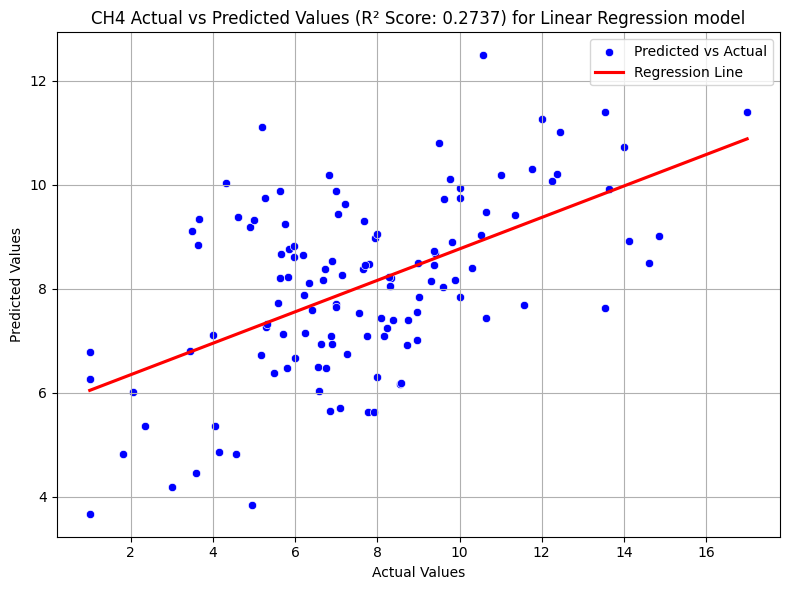

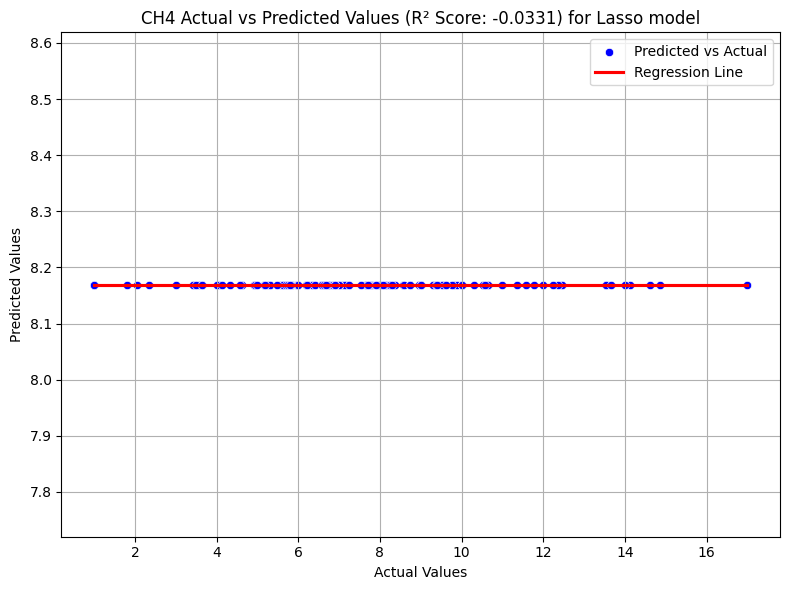

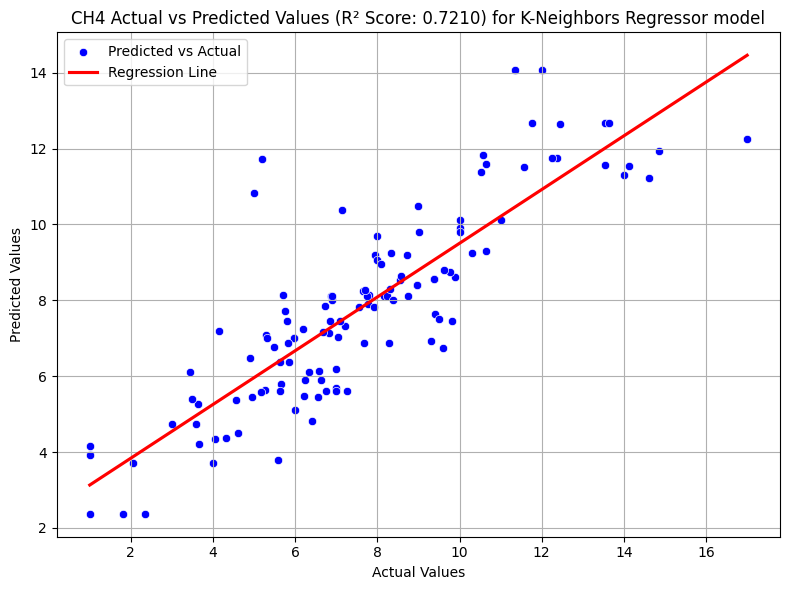

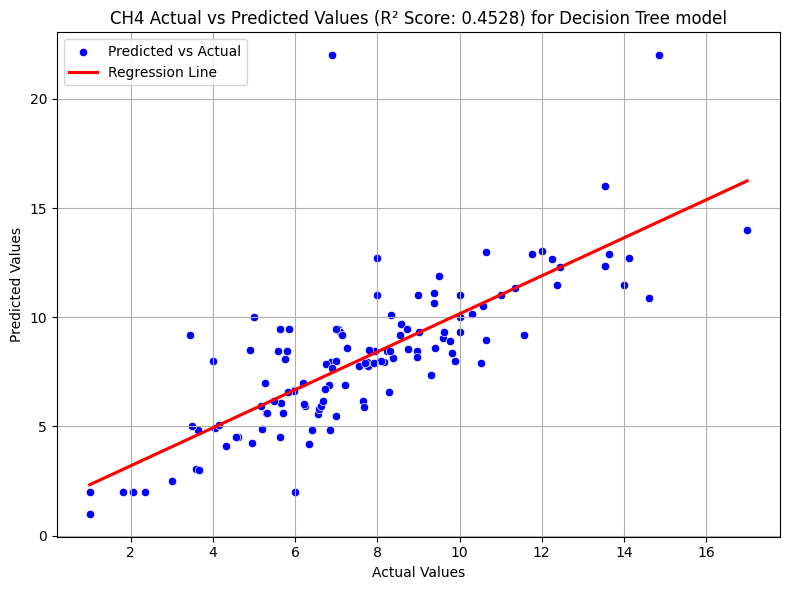

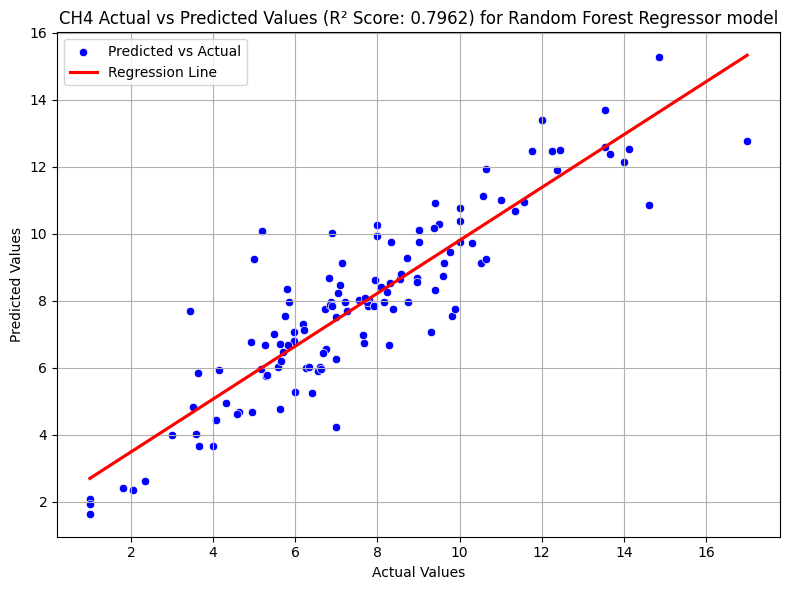

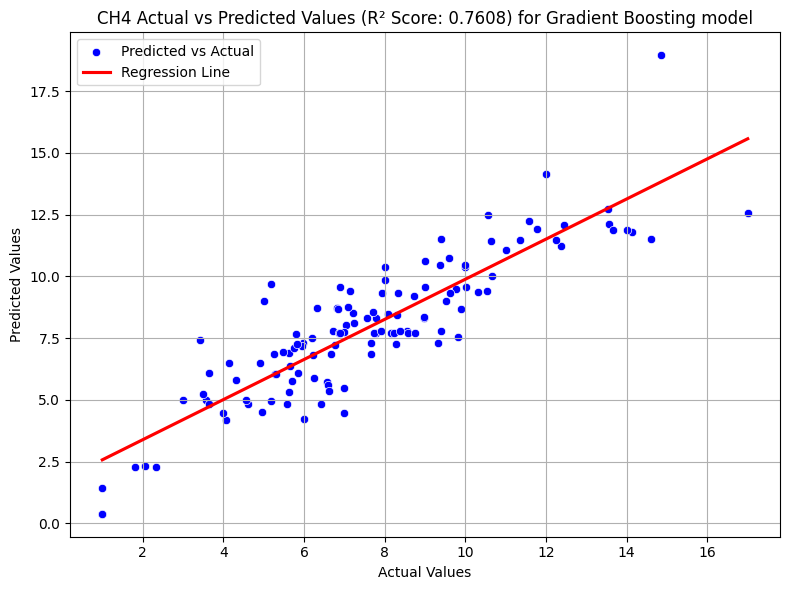

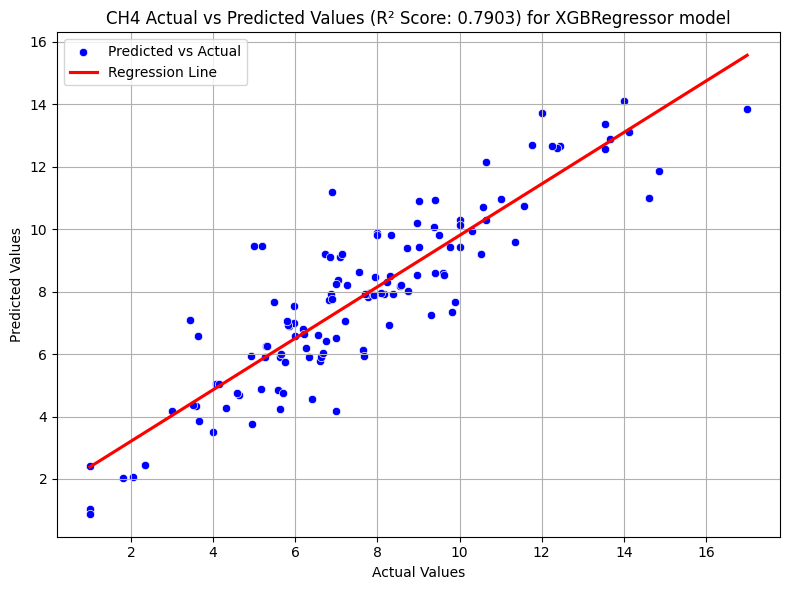

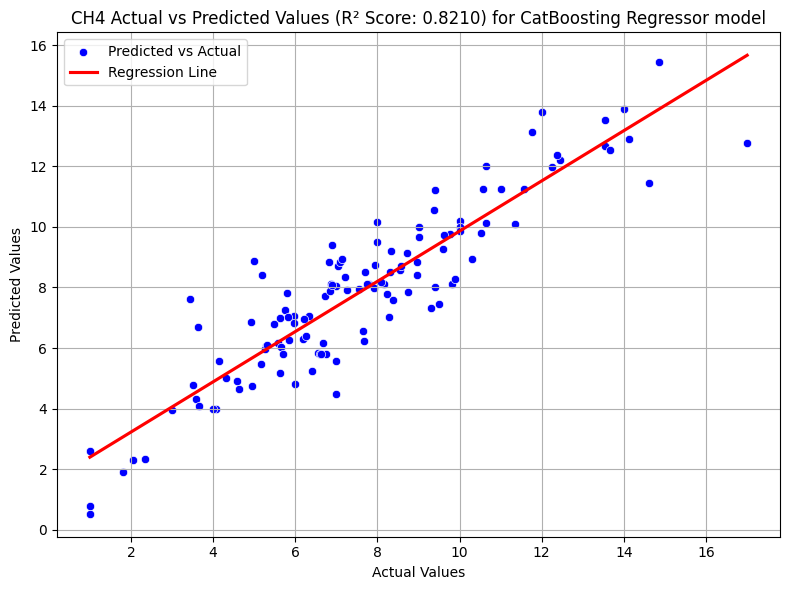

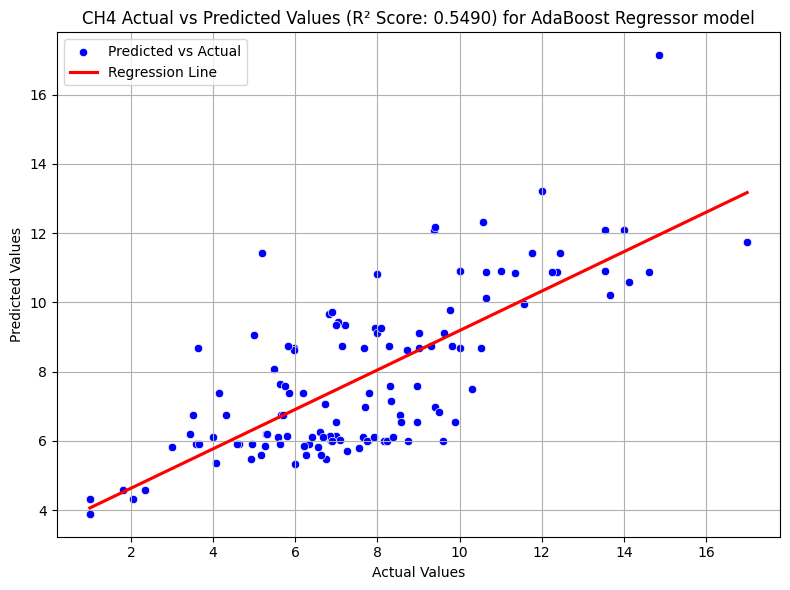

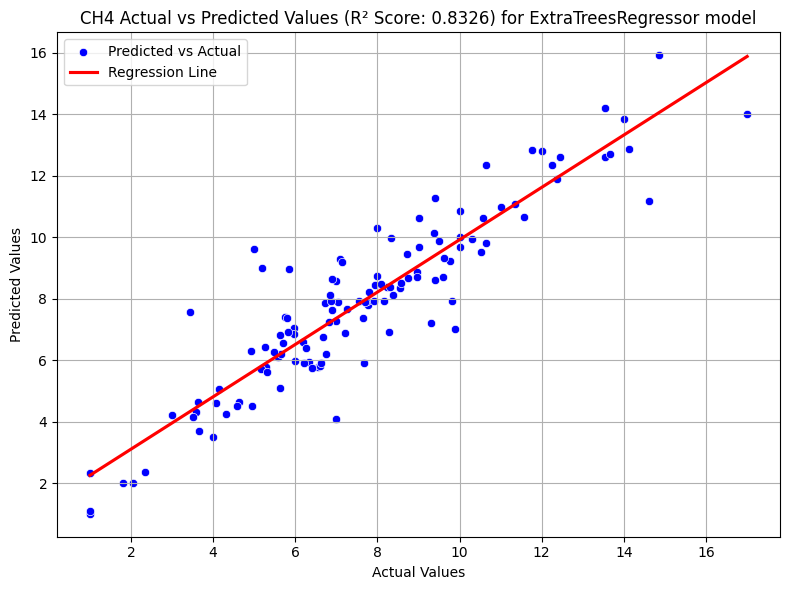

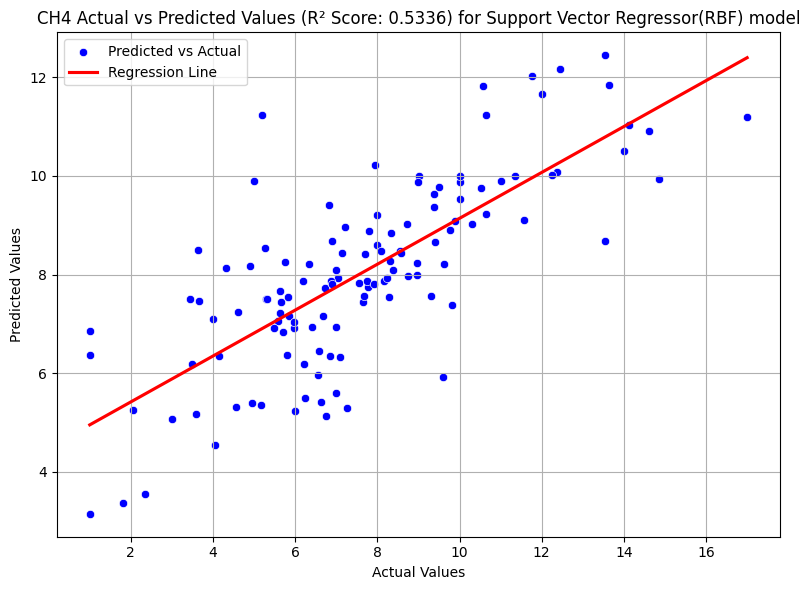

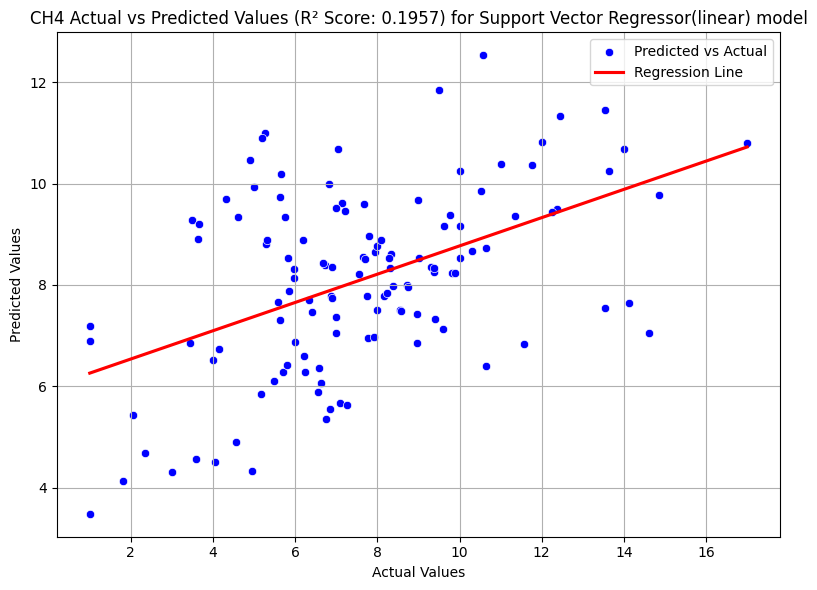

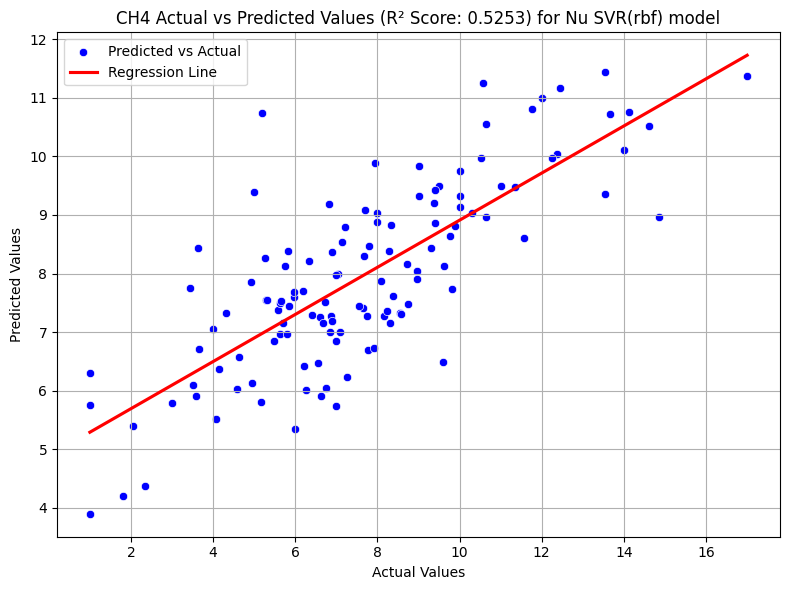

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7597 - mae: 0.5493 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


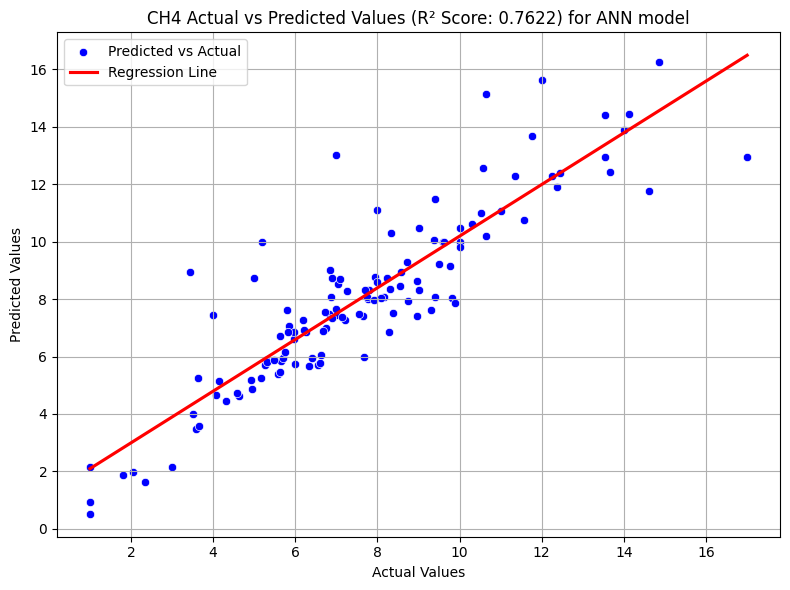

In [70]:
evaluate_model(models, X_train_scaled, y_train.CH4, X_val_scaled, y_val.CH4)

In [71]:
score = pd.DataFrame(list(zip(models.keys(), r2_train_score.values(), r2_test_score.values())), columns=["Model","r2_train_score", "r2_test_score"])
score

Model  r2_train_score  r2_test_score
0                  Linear Regression        0.257236       0.273732
1                              Lasso        0.000000      -0.033079
2              K-Neighbors Regressor        0.746015       0.721042
3                      Decision Tree        0.995971       0.452798
4            Random Forest Regressor        0.950031       0.796166
5                  Gradient Boosting        0.915502       0.760806
6                       XGBRegressor        0.995611       0.790316
7              CatBoosting Regressor        0.959128       0.821011
8                 AdaBoost Regressor        0.708777       0.549022
9                ExtraTreesRegressor        0.995971       0.832564
10     Support Vector Regressor(RBF)        0.518792       0.533648
11  Support Vector Regressor(linear)        0.213773       0.195725
12                       Nu SVR(rbf)        0.491429       0.525306
13                               ANN        0.938276       0.762182

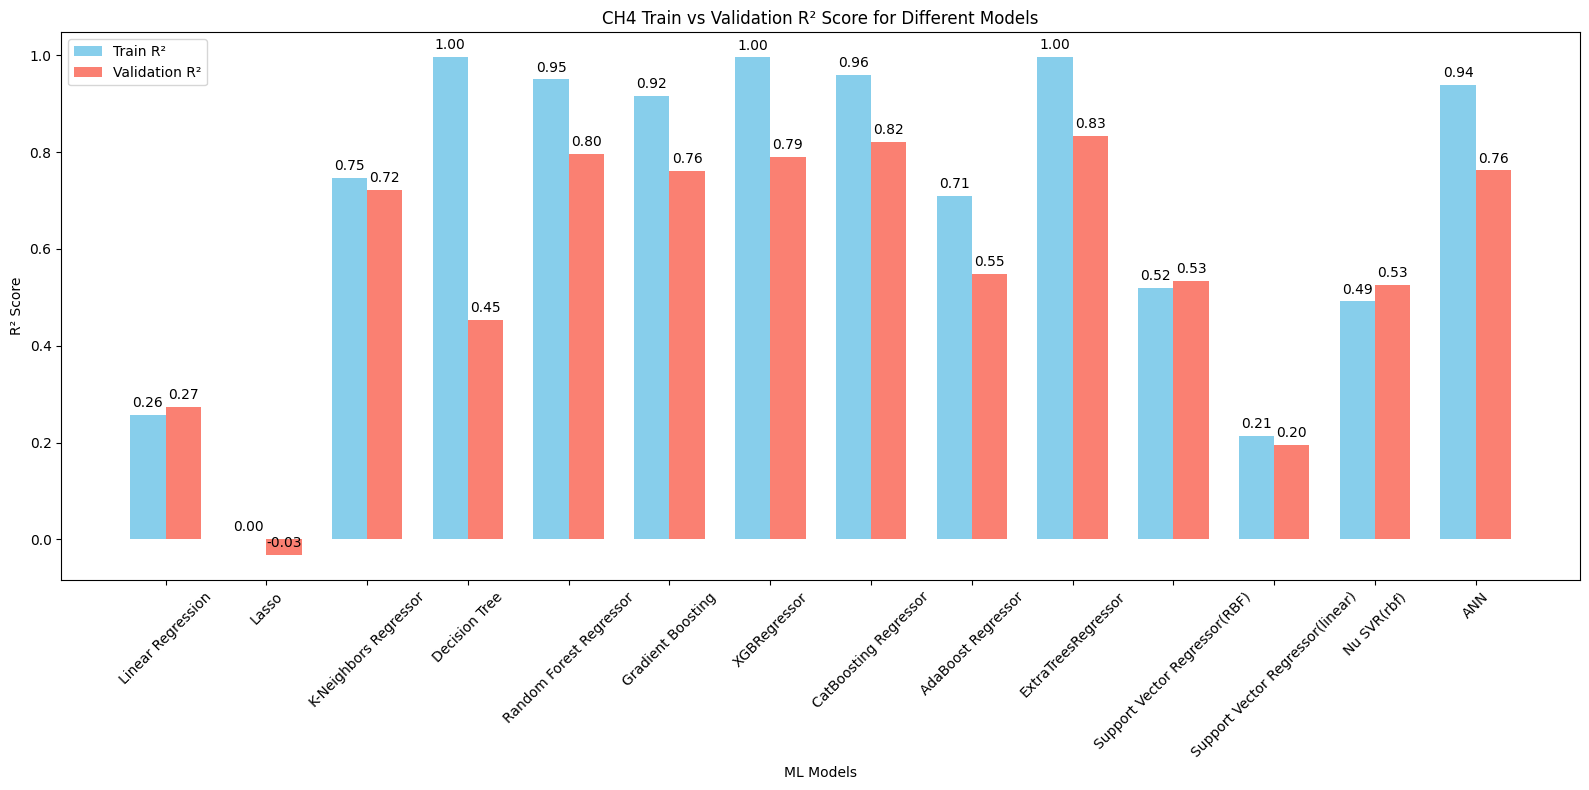

In [72]:
# Set positions
x = np.arange(len(score['Model']))
width = 0.35  # Width of the bars

# Create plot
fig, ax = plt.subplots(figsize=(16, 8))
bars1 = ax.bar(x - width/2, score['r2_train_score'], width, label='Train R²', color='skyblue')
bars2 = ax.bar(x + width/2, score['r2_test_score'], width, label='Validation R²', color='salmon')

# Add labels and title
ax.set_xlabel('ML Models')
ax.set_ylabel('R² Score')
ax.set_title('CH4 Train vs Validation R² Score for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(score['Model'], rotation=45)
ax.legend()

# Add R2 score text on top of bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig("CH4 Train vs Validation R² Score for Different Models")
plt.show()

In [73]:
import zipfile
import os

with zipfile.ZipFile('kaggle_output.zip', 'w') as zipf:
    for file in os.listdir():
        if file.endswith(('.png')):
            zipf.write(file)